# EVALUATION PROJECT 8 - RAINFALL PREDICTION -CLASSIFICATION- PRICE RANGE

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dd=pd.read_csv('weather.csv')

In [5]:
df=pd.DataFrame(data=dd)

In [6]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

## DUPLICATE VALUE CHECK 

In [7]:
df1=df.drop_duplicates()

In [8]:
df1

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[6762 rows x 23 columns]

## THERE WERE MULTIPLE DUPLICATE ROWS IN THE DATA SET WHICH HAVE BEEN REMOVED 

## IDENTIFICATION OF VARIABLES & DATA TYPES PRESENT IN THE DATA SET 

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [10]:
df1.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### THERE ARE BOTH CATAGORICALL AND FLOAT VALUES AND THE CATAGORICAL ONES WILL BE ENCODED LATER

## MISSING VALUES CHECK 

In [11]:
df1.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

### ALMOST ALL OF COLUMNS HAVE MISSING VALUES , WHICH WE WILL IMPUTE WHERE AS SUNSHINE COLUMN HAS MORE THAN 50% DATA MISSING,HENCE WE WILL DELETE IT

In [12]:
df2=df1.drop(['Sunshine'],axis=1)

## SIMPLE IMPUTER - TO FILL THE MISSING VALUES

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [15]:
imp1=SimpleImputer(missing_values=np.NaN,strategy='mean')

In [16]:
df2['RainToday']=imp.fit_transform(df2['RainToday'].values.reshape(-1,1))

In [17]:
df2['RainTomorrow']=imp.fit_transform(df2['RainTomorrow'].values.reshape(-1,1))

In [18]:
df2['WindDir3pm']=imp.fit_transform(df2['WindDir3pm'].values.reshape(-1,1))

In [19]:
df2['WindDir9am']=imp.fit_transform(df2['WindDir9am'].values.reshape(-1,1))

In [20]:
df2['WindGustDir']=imp.fit_transform(df2['WindGustDir'].values.reshape(-1,1))

In [21]:
df2['Temp3pm']=imp1.fit_transform(df2['Temp3pm'].values.reshape(-1,1))

In [22]:
df2['Temp9am']=imp1.fit_transform(df2['Temp9am'].values.reshape(-1,1))

In [23]:
df2['Cloud3pm']=imp1.fit_transform(df2['Cloud3pm'].values.reshape(-1,1))

In [24]:
df2['Cloud9am']=imp1.fit_transform(df2['Cloud9am'].values.reshape(-1,1))

In [25]:
df2['Pressure3pm']=imp1.fit_transform(df2['Pressure3pm'].values.reshape(-1,1))

In [26]:
df2['Pressure9am']=imp1.fit_transform(df2['Pressure9am'].values.reshape(-1,1))

In [27]:
df2['Humidity3pm']=imp1.fit_transform(df2['Humidity3pm'].values.reshape(-1,1))

In [28]:
df2['Humidity9am']=imp1.fit_transform(df2['Humidity9am'].values.reshape(-1,1))

In [29]:
df2['WindSpeed3pm']=imp1.fit_transform(df2['WindSpeed3pm'].values.reshape(-1,1))

In [30]:
df2['WindSpeed9am']=imp1.fit_transform(df2['WindSpeed9am'].values.reshape(-1,1))

In [31]:
df2['MinTemp']=imp1.fit_transform(df2['MinTemp'].values.reshape(-1,1))

In [32]:
df2['MaxTemp']=imp1.fit_transform(df2['MaxTemp'].values.reshape(-1,1))

In [33]:
df2['Rainfall']=imp1.fit_transform(df2['Rainfall'].values.reshape(-1,1))

In [34]:
df2['Evaporation']=imp1.fit_transform(df2['Evaporation'].values.reshape(-1,1))

In [35]:
df2['WindGustSpeed']=imp1.fit_transform(df2['WindGustSpeed'].values.reshape(-1,1))

In [36]:
df2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## COUNT & UNIQUE VALUES OF EACH COLUMN

In [37]:
df2['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

In [38]:
df2['Date'].value_counts()

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [39]:
df2['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [40]:
df2['Location'].value_counts()

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [41]:
df2['MinTemp'].unique()

array([13.4       ,  7.4       , 12.9       ,  9.2       , 17.5       ,
       14.6       , 14.3       ,  7.7       ,  9.7       , 13.1       ,
       15.9       , 12.6       ,  8.4       ,  9.8       , 14.1       ,
       13.5       , 11.2       , 11.5       , 17.1       , 20.5       ,
       15.3       , 16.2       , 16.9       , 20.1       , 19.7       ,
       12.5       , 12.        , 11.3       ,  9.6       , 10.5       ,
       12.3       , 13.7       , 16.1       , 14.        , 17.        ,
       17.3       , 17.2       , 17.4       , 19.8       , 14.9       ,
       13.9       , 18.6       , 19.3       , 24.4       , 18.8       ,
       20.8       , 15.7       , 18.5       , 20.4       , 21.8       ,
       22.3       , 22.        , 28.        , 21.5       , 21.7       ,
       23.5       , 28.3       , 18.4       , 12.4       , 13.3       ,
       18.        , 18.7       , 15.5       ,  8.9       , 15.        ,
       15.4       , 16.        , 12.8       , 13.2       , 13.8 

In [42]:
df2['MinTemp'].value_counts()

 13.109145    70
 13.200000    58
 12.000000    57
 14.800000    53
 12.700000    53
              ..
-1.200000      1
-1.500000      1
-1.700000      1
-0.800000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64

In [43]:
df2['MaxTemp'].unique()

array([22.9       , 25.1       , 25.7       , 28.        , 32.3       ,
       29.7       , 25.        , 26.7       , 31.9       , 30.1       ,
       30.4       , 21.7       , 18.6       , 21.        , 24.6       ,
       27.7       , 20.9       , 22.5       , 25.6       , 29.3       ,
       33.        , 31.8       , 30.9       , 32.4       , 33.9       ,
       32.7       , 27.2       , 24.2       , 24.4       , 26.5       ,
       23.9       , 28.8       , 34.6       , 35.8       , 37.9       ,
       38.9       , 28.3       , 28.4       , 30.8       , 32.        ,
       34.7       , 37.7       , 43.        , 32.2       , 36.6       ,
       39.9       , 38.1       , 34.        , 35.2       , 30.6       ,
       34.3       , 38.4       , 38.2       , 40.7       , 41.5       ,
       42.9       , 42.7       , 43.1       , 38.3       , 36.9       ,
       41.2       , 42.2       , 44.8       , 40.2       , 31.2       ,
       27.3       , 21.6       , 29.        , 29.2       , 31.3 

In [44]:
df2['MaxTemp'].value_counts()

19.000000    66
19.800000    62
24.098345    57
23.800000    54
22.300000    54
             ..
10.300000     1
10.000000     1
10.400000     1
11.700000     1
43.500000     1
Name: MaxTemp, Length: 332, dtype: int64

In [45]:
df2['Rainfall'].unique()

array([6.00000000e-01, 0.00000000e+00, 1.00000000e+00, 2.00000000e-01,
       1.40000000e+00, 2.20000000e+00, 1.56000000e+01, 3.60000000e+00,
       2.78014795e+00, 1.68000000e+01, 1.06000000e+01, 1.20000000e+00,
       8.00000000e-01, 6.40000000e+00, 4.00000000e-01, 3.00000000e+00,
       5.80000000e+00, 1.16000000e+01, 1.80000000e+00, 8.60000000e+00,
       1.26000000e+01, 8.40000000e+00, 6.20000000e+00, 2.00000000e+01,
       2.10000000e+01, 3.20000000e+00, 4.80000000e+00, 4.20000000e+00,
       8.00000000e+00, 1.44000000e+01, 4.60000000e+00, 2.00000000e+00,
       5.60000000e+00, 1.60000000e+00, 6.00000000e+00, 4.40000000e+00,
       5.40000000e+00, 5.00000000e+00, 7.80000000e+00, 6.80000000e+00,
       9.80000000e+00, 3.80000000e+00, 2.40000000e+00, 5.20000000e+00,
       6.60000000e+00, 1.34000000e+01, 1.02000000e+01, 2.88000000e+01,
       7.00000000e+00, 2.58000000e+01, 9.40000000e+00, 1.24000000e+01,
       5.22000000e+01, 2.06000000e+01, 6.60000000e+01, 1.10000000e+01,
      

In [46]:
df2['Rainfall'].value_counts()

0.000000      4334
0.200000       321
0.400000       144
2.780148       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [47]:
df2['Evaporation'].unique()

array([  5.30239521,   8.6       ,   3.8       ,   2.8       ,
         3.2       ,   6.8       ,   4.2       ,   1.6       ,
         4.4       ,   4.        ,   2.2       ,   3.4       ,
         6.4       ,   4.6       ,   3.6       ,   4.8       ,
         3.        ,   1.2       ,   1.4       ,   2.6       ,
         1.        ,   2.        ,   8.4       ,   2.4       ,
         0.6       ,   5.4       ,   1.8       ,   7.        ,
         0.8       ,   0.2       ,   5.2       ,   5.        ,
         6.        ,   7.6       ,   5.8       ,   5.6       ,
         8.        ,   6.2       ,   6.6       ,   7.8       ,
         8.8       ,   7.4       ,   9.4       ,   7.2       ,
         0.4       ,   0.        ,  18.        ,  24.2       ,
        14.6       ,  19.4       ,  10.8       ,  28.        ,
        11.8       ,  24.6       ,  11.2       ,  22.6       ,
        10.        ,  37.        ,  26.        ,  11.        ,
        19.8       ,  24.4       ,  10.6       ,  27.4 

In [48]:
df2['Evaporation'].value_counts()

5.302395      2921
4.000000       141
3.000000       125
2.200000       118
2.400000       116
              ... 
145.000000       1
33.800000        1
59.200000        1
20.800000        1
0.700000         1
Name: Evaporation, Length: 117, dtype: int64

In [49]:
df2['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'E', 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'SSW'], dtype=object)

In [50]:
df2['WindGustDir'].value_counts()

E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64

In [51]:
df2['WindGustSpeed'].unique()

array([ 44.        ,  46.        ,  24.        ,  41.        ,
        56.        ,  50.        ,  35.        ,  80.        ,
        28.        ,  30.        ,  31.        ,  61.        ,
        38.97766323,  22.        ,  63.        ,  43.        ,
        26.        ,  33.        ,  57.        ,  48.        ,
        39.        ,  37.        ,  52.        ,  98.        ,
        54.        ,  83.        ,  59.        ,  70.        ,
        69.        ,  17.        ,  20.        ,  19.        ,
        15.        ,  13.        ,  11.        ,  72.        ,
        85.        ,  65.        ,  78.        , 107.        ,
        74.        ,  67.        ,  94.        ,  76.        ,
        81.        ,  87.        ,   9.        ,  93.        ,
         7.        ,  91.        ,  89.        , 102.        ,
       100.        ])

In [52]:
df2['WindGustSpeed'].value_counts()

38.977663     942
39.000000     346
35.000000     341
37.000000     332
33.000000     317
31.000000     305
30.000000     302
28.000000     285
41.000000     285
43.000000     237
26.000000     228
24.000000     225
48.000000     211
22.000000     201
46.000000     195
50.000000     191
52.000000     186
44.000000     181
20.000000     170
54.000000     150
19.000000     117
56.000000     111
57.000000     105
17.000000      88
61.000000      83
59.000000      80
63.000000      67
15.000000      57
13.000000      57
65.000000      50
67.000000      42
72.000000      42
69.000000      35
70.000000      35
74.000000      34
76.000000      25
11.000000      18
78.000000      15
80.000000      15
85.000000       9
81.000000       9
9.000000        6
91.000000       6
83.000000       5
93.000000       4
98.000000       4
89.000000       4
94.000000       2
87.000000       2
7.000000        2
102.000000      1
107.000000      1
100.000000      1
Name: WindGustSpeed, dtype: int64

In [53]:
df2['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [54]:
df2['WindDir9am'].value_counts()

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64

In [55]:
df2['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [56]:
df2['WindDir3pm'].value_counts()

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64

In [57]:
df2['WindSpeed9am'].unique()

array([20.       ,  4.       , 19.       , 11.       ,  7.       ,
        6.       , 15.       , 17.       , 28.       , 24.       ,
       12.7822063,  9.       ,  0.       , 13.       ,  2.       ,
       26.       , 30.       , 22.       , 35.       , 37.       ,
       31.       , 33.       , 43.       , 41.       , 46.       ,
       39.       , 56.       , 54.       , 50.       , 52.       ,
       44.       , 61.       , 57.       , 48.       , 63.       ])

In [58]:
df2['WindSpeed9am'].value_counts()

0.000000     730
9.000000     641
4.000000     595
13.000000    520
7.000000     482
6.000000     459
11.000000    456
17.000000    366
15.000000    344
19.000000    333
20.000000    314
2.000000     240
24.000000    228
22.000000    213
28.000000    169
26.000000    158
31.000000    107
30.000000     81
12.782206     63
35.000000     51
33.000000     50
37.000000     40
41.000000     26
39.000000     21
44.000000     16
46.000000     16
43.000000     16
52.000000      8
56.000000      5
50.000000      5
54.000000      3
48.000000      3
61.000000      1
57.000000      1
63.000000      1
Name: WindSpeed9am, dtype: int64

In [59]:
df2['WindSpeed3pm'].unique()

array([24.       , 22.       , 26.       ,  9.       , 20.       ,
       17.       , 28.       , 11.       ,  6.       , 13.       ,
       30.       , 19.       , 31.       ,  7.       , 15.       ,
       48.       ,  4.       , 33.       ,  0.       ,  2.       ,
       17.5711498, 37.       , 46.       , 39.       , 50.       ,
       35.       , 41.       , 44.       , 43.       , 65.       ,
       56.       , 83.       , 54.       , 61.       , 57.       ,
       52.       ])

In [60]:
df2['WindSpeed3pm'].value_counts()

9.00000     639
19.00000    509
13.00000    505
11.00000    458
20.00000    452
17.00000    446
15.00000    430
24.00000    383
28.00000    355
22.00000    342
7.00000     293
4.00000     283
26.00000    279
6.00000     220
30.00000    196
0.00000     192
31.00000    176
33.00000    112
17.57115    100
35.00000     93
37.00000     85
2.00000      54
39.00000     49
41.00000     30
46.00000     20
43.00000     20
44.00000     11
50.00000      8
56.00000      6
48.00000      6
52.00000      5
65.00000      1
83.00000      1
54.00000      1
61.00000      1
57.00000      1
Name: WindSpeed3pm, dtype: int64

In [61]:
df2['Humidity9am'].unique()

array([ 71.        ,  44.        ,  38.        ,  45.        ,
        82.        ,  55.        ,  49.        ,  48.        ,
        42.        ,  58.        ,  89.        ,  76.        ,
        65.        ,  57.        ,  50.        ,  69.        ,
        80.        ,  47.        ,  56.        ,  54.        ,
        41.        ,  78.        ,  46.        ,  43.        ,
        33.        ,  34.        ,  36.        ,  52.        ,
        51.        ,  40.        ,  35.        ,  39.        ,
        60.        ,  37.        ,  27.        ,  32.        ,
        53.        ,  20.        ,  66.        ,  63.        ,
        62.        ,  87.        ,  61.        ,  59.        ,
        92.        ,  72.        ,  67.        ,  75.        ,
        88.        ,  68.        ,  73.        ,  74.        ,
        83.        ,  77.        ,  70.        ,  81.        ,
        86.        ,  97.        ,  99.        ,  91.        ,
        85.        ,  93.        ,  84.        ,  94.  

In [62]:
df2['Humidity9am'].value_counts()

68.0    163
73.0    161
69.0    152
70.0    148
74.0    148
       ... 
16.0      2
14.0      2
17.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 91, dtype: int64

In [63]:
df2['Humidity3pm'].unique()

array([22.        , 25.        , 30.        , 16.        , 33.        ,
       23.        , 19.        ,  9.        , 27.        , 91.        ,
       93.        , 43.        , 32.        , 28.        , 82.        ,
       65.        , 26.        , 24.        , 17.        , 15.        ,
       70.        , 12.        ,  8.        , 31.        , 20.        ,
       10.        , 21.        , 39.        , 13.        , 11.        ,
       69.        , 18.        , 14.        , 35.        , 90.        ,
       68.        , 74.        , 41.        , 34.        , 78.        ,
       49.        , 37.        , 42.        , 47.        , 52.        ,
       29.        , 86.        , 89.        , 62.        , 79.        ,
       48.        , 46.        , 38.        , 44.        , 51.        ,
       36.        , 45.        , 40.        , 53.        , 61.        ,
       59.        , 63.        , 54.        , 57.        , 50.        ,
       58.        , 75.        , 97.        , 80.        , 95.  

In [64]:
df2['Humidity3pm'].value_counts()

46.0    157
51.0    155
54.0    154
49.0    151
52.0    150
       ... 
8.0      10
7.0       7
98.0      6
99.0      3
6.0       3
Name: Humidity3pm, Length: 95, dtype: int64

In [65]:
df2['Pressure9am'].unique()

array([1007.7       , 1010.6       , 1007.6       , 1017.6       ,
       1010.8       , 1009.2       , 1009.6       , 1013.4       ,
       1008.9       , 1007.        , 1011.8       , 1010.5       ,
        994.3       , 1001.2       , 1009.7       , 1012.2       ,
       1005.8       , 1009.4       , 1019.2       , 1019.3       ,
       1013.6       , 1007.8       , 1011.        , 1012.9       ,
       1010.9       , 1006.8       , 1005.2       , 1004.8       ,
       1005.6       , 1006.1       , 1004.5       , 1014.4       ,
       1018.7       , 1015.1       , 1012.6       , 1011.9       ,
       1017.8       , 1009.9       , 1014.1       , 1015.7       ,
       1011.6       , 1008.4       , 1019.7       , 1015.8       ,
       1010.1       , 1005.3       , 1007.9       , 1005.4       ,
       1016.5       , 1017.7       , 1014.9       , 1014.6       ,
       1014.2       , 1012.5       , 1011.7       , 1008.8       ,
       1005.9       , 1008.        , 1008.2       , 1009.3    

In [66]:
df2['Pressure9am'].value_counts()

1017.626311    1308
1019.200000      42
1018.700000      41
1014.800000      41
1020.000000      40
               ... 
1002.100000       1
993.400000        1
996.500000        1
1035.900000       1
1033.600000       1
Name: Pressure9am, Length: 385, dtype: int64

In [67]:
df2['Pressure3pm'].unique()

array([1007.1       , 1007.8       , 1008.7       , 1012.8       ,
       1006.        , 1005.4       , 1008.2       , 1010.1       ,
       1003.6       , 1005.7       , 1004.2       ,  993.        ,
       1001.8       , 1010.3       , 1010.4       , 1002.2       ,
       1009.7       , 1017.1       , 1014.8       , 1008.1       ,
       1007.6       , 1001.7       , 1003.4       , 1005.1       ,
       1003.2       , 1013.1       , 1009.2       , 1006.7       ,
       1002.7       , 1010.9       , 1013.7       , 1006.8       ,
       1012.1       , 1006.9       , 1012.7       , 1017.4       ,
       1016.2       , 1010.6       , 1004.8       , 1005.9       ,
        997.8       , 1003.9       , 1014.6       , 1014.1       ,
       1011.6       , 1011.8       , 1010.2       , 1010.5       ,
       1007.4       , 1004.7       , 1002.6       , 1005.        ,
       1003.8       , 1006.5       , 1008.5       , 1011.1       ,
       1017.3       , 1019.7       , 1016.4       , 1013.8    

In [68]:
df2['Pressure3pm'].value_counts()

1015.119923    1311
1017.800000      46
1018.000000      41
1016.100000      40
1017.900000      39
               ... 
990.800000        1
1028.000000       1
992.400000        1
1035.900000       1
1029.500000       1
Name: Pressure3pm, Length: 375, dtype: int64

In [69]:
df2['Cloud9am'].unique()

array([8.        , 4.33680556, 7.        , 1.        , 0.        ,
       5.        , 4.        , 2.        , 6.        , 3.        ])

In [70]:
df2['Cloud9am'].value_counts()

4.336806    1866
7.000000    1043
1.000000     922
8.000000     764
0.000000     521
6.000000     454
5.000000     341
3.000000     313
2.000000     311
4.000000     227
Name: Cloud9am, dtype: int64

In [71]:
df2['Cloud3pm'].unique()

array([4.32098765, 2.        , 8.        , 7.        , 1.        ,
       5.        , 4.        , 6.        , 3.        , 0.        ])

In [72]:
df2['Cloud3pm'].value_counts()

4.320988    1902
7.000000     959
1.000000     921
8.000000     644
6.000000     489
5.000000     433
2.000000     428
3.000000     357
0.000000     332
4.000000     297
Name: Cloud3pm, dtype: int64

In [73]:
df2['Temp9am'].unique()

array([16.9     , 17.2     , 21.      , 18.1     , 17.8     , 20.6     ,
       16.3     , 18.3     , 20.1     , 20.4     , 15.9     , 17.4     ,
       15.8     , 17.3     , 18.      , 15.5     , 19.1     , 24.5     ,
       23.8     , 20.9     , 21.5     , 23.2     , 26.6     , 24.6     ,
       21.6     , 12.5     , 19.7     , 14.9     , 17.1     , 20.7     ,
       22.4     , 23.1     , 25.2     , 17.9     , 20.2     , 22.8     ,
       24.2     , 24.3     , 25.6     , 27.6     , 16.      , 22.      ,
       26.8     , 27.3     , 26.1     , 23.3     , 21.2     , 23.4     ,
       25.8     , 28.2     , 29.      , 29.2     , 29.9     , 32.4     ,
       28.8     , 27.2     , 25.5     , 26.5     , 28.7     , 29.6     ,
       34.5     , 18.7     , 16.7     , 17.      , 19.2     , 21.4     ,
       22.1     , 19.3     , 15.      , 20.      , 22.2     , 23.      ,
       15.6     , 13.9     , 12.6     , 13.3     , 17.6     , 18.6     ,
       19.      , 19.9     , 12.7     , 12.2     , 

In [74]:
df2['Temp9am'].value_counts()

14.8    62
18.0    61
20.6    57
17.5    54
18.3    52
        ..
2.5      1
2.0      1
3.4      1
5.2      1
30.2     1
Name: Temp9am, Length: 305, dtype: int64

In [75]:
df2['Temp3pm'].unique()

array([21.8       , 24.3       , 23.2       , 26.5       , 29.7       ,
       28.9       , 24.6       , 25.5       , 30.2       , 28.2       ,
       28.8       , 17.        , 15.8       , 19.8       , 23.5       ,
       26.2       , 18.1       , 21.5       , 21.        , 27.3       ,
       31.6       , 30.8       , 29.        , 31.2       , 33.        ,
       32.1       , 26.1       , 18.2       , 22.7       , 25.7       ,
       22.1       , 33.9       , 34.4       , 36.8       , 38.4       ,
       27.6       , 26.6       , 29.3       , 30.        , 33.2       ,
       35.7       , 41.5       , 27.1       , 25.8       , 30.5       ,
       37.7       , 36.1       , 33.1       , 36.5       , 36.2       ,
       39.2       , 40.1       , 41.2       , 42.        , 41.9       ,
       37.1       , 35.2       , 39.7       , 41.6       , 43.4       ,
       38.5       , 29.4       , 24.9       , 17.3       , 28.5       ,
       29.2       , 29.5       , 27.        , 30.7       , 32.7 

In [76]:
df2['Temp3pm'].value_counts()

22.708561    92
19.200000    63
19.000000    61
21.700000    54
22.500000    54
             ..
41.000000     1
38.000000     1
40.300000     1
8.700000      1
42.400000     1
Name: Temp3pm, Length: 329, dtype: int64

In [77]:
df2['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
df2['RainToday'].value_counts()

No     5190
Yes    1572
Name: RainToday, dtype: int64

In [79]:
df2['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df2['RainTomorrow'].value_counts()

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64

## FIRST 5 ROWS CHECK

In [81]:
df2.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation WindGustDir  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.302395           W   
1  2008-12-02   Albury      7.4     25.1       0.0     5.302395         WNW   
2  2008-12-03   Albury     12.9     25.7       0.0     5.302395         WSW   
3  2008-12-04   Albury      9.2     28.0       0.0     5.302395          NE   
4  2008-12-05   Albury     17.5     32.3       1.0     5.302395           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          W        WNW  ...         71.0         22.0   
1           44.0        NNW        WSW  ...         44.0         25.0   
2           46.0          W        WSW  ...         38.0         30.0   
3           24.0         SE          E  ...         45.0         16.0   
4           41.0        ENE         NW  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.320988     16.9     21.8         No   
1       1010.6       1007.8  4.336806  4.320988     17.2     24.3         No   
2       1007.6       1008.7  4.336806  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.336806  4.320988     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 22 columns]

## LAST 5 ROWS CHECK

In [82]:
df2.tail()

Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
8420  2017-06-21    Uluru      2.8  23.400000       0.0     5.302395   
8421  2017-06-22    Uluru      3.6  25.300000       0.0     5.302395   
8422  2017-06-23    Uluru      5.4  26.900000       0.0     5.302395   
8423  2017-06-24    Uluru      7.8  27.000000       0.0     5.302395   
8424  2017-06-25    Uluru     14.9  24.098345       0.0     5.302395   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
8420           E      31.000000         SE        ENE  ...         51.0   
8421         NNW      22.000000         SE          N  ...         56.0   
8422           N      37.000000         SE        WNW  ...         53.0   
8423          SE      28.000000        SSE          N  ...         51.0   
8424           E      38.977663        ESE        ESE  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
8420         24.0       1024.6       1020.3  4.336806  4.320988     10.1   
8421         21.0       1023.5       1019.1  4.336806  4.320988     10.9   
8422         24.0       1021.0       1016.8  4.336806  4.320988     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
8420     22.4         No            No  
8421     24.5         No            No  
8422     26.1         No            No  
8423     26.0         No            No  
8424     20.9         No            No  

[5 rows x 22 columns]

## SAMPLE ROW CHECK

In [83]:
df2.sample()

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
7725  2013-04-28  PerthAirport     11.6     24.8       0.0          2.6   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
7725          SW           31.0          S        SSW  ...         70.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
7725         35.0       1020.1       1017.8       3.0       1.0     19.3   

      Temp3pm  RainToday  RainTomorrow  
7725     24.2         No            No  

[1 rows x 22 columns]

## NON GRAPHICAL UNIVARIATE ANALYSIS

In [84]:
df2.describe()

MinTemp      MaxTemp     Rainfall  Evaporation  WindGustSpeed  \
count  6762.000000  6762.000000  6762.000000  6762.000000    6762.000000   
mean     13.109145    24.098345     2.780148     5.302395      38.977663   
std       5.540667     6.130123    10.482769     3.343713      13.376457   
min      -2.000000     8.200000     0.000000     0.000000       7.000000   
25%       9.000000    19.600000     0.000000     4.000000      30.000000   
50%      13.109145    23.500000     0.000000     5.302395      38.977663   
75%      17.400000    28.400000     1.200000     5.302395      46.000000   
max      28.500000    45.500000   371.000000   145.000000     107.000000   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count   6762.000000   6762.000000  6762.000000  6762.000000  6762.000000   
mean      12.782206     17.571150    67.506559    50.467147  1017.626311   
std        9.787577      9.548634    17.182700    18.498341     6.027914   
min        0.000000      0.000000    10.000000     6.000000   989.800000   
25%        6.000000     11.000000    56.000000    38.000000  1014.200000   
50%       11.000000     17.000000    68.000000    50.000000  1017.626311   
75%       19.000000     24.000000    80.000000    62.000000  1020.900000   
max       63.000000     83.000000   100.000000    99.000000  1039.000000   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000  
mean   1015.119923     4.336806     4.320988    17.895038    22.708561  
std       5.967638     2.474649     2.323276     5.722411     5.971845  
min     982.900000     0.000000     0.000000     1.900000     7.300000  
25%    1011.500000     2.000000     3.000000    13.900000    18.400000  
50%    1015.119923     4.336806     4.320988    17.900000    22.300000  
75%    1018.400000     7.000000     6.000000    22.200000    26.800000  
max    1036.000000     8.000000     8.000000    39.400000    44.100000

### OUTLIERS CHECK-(HUGE DIFF BETWEEN 75TH AND MAX FIGURES)RAINFALL, EVAPORATION,WIND GUST SPEED, WIND SPEED 9AM, WIND SPEED 3 PM, TEMP AT 3PM

### SKEWNESS CHECK - (DIFFERENCE BETWEEN MEAN AND 50TH PERCENTILE ) - RAINFALL 

## GRAPHICAL BIVARIATE ANALYSIS

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

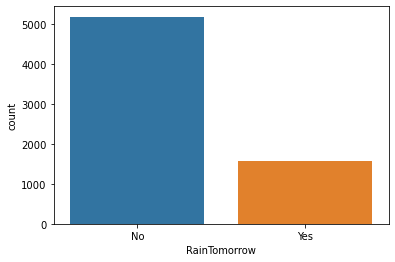

In [85]:
sns.countplot(df2['RainTomorrow'])

### COUNT OF RAIN TOMORROW FOR OPTION NO IS HIGHER THAN YES

<AxesSubplot:xlabel='RainToday', ylabel='count'>

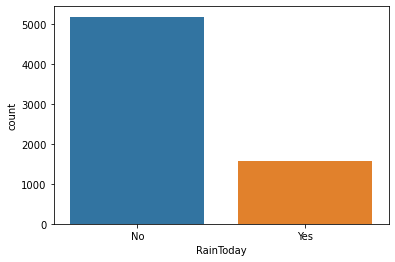

In [86]:
sns.countplot(df2['RainToday'])

### COUNT OF RAIN TODAY FOR OPTION NO IS HIGHER THAN YES

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

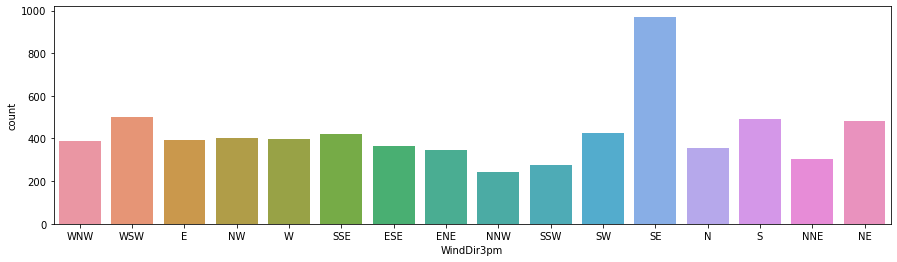

In [87]:
plt.figure(figsize=(15,4))
sns.countplot(df2['WindDir3pm'])

### WIND DIRECTION AT 3PM IN SE ZONE IS THE HIGHEST AS COMPARED TO OTHER DIRECTIONS

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

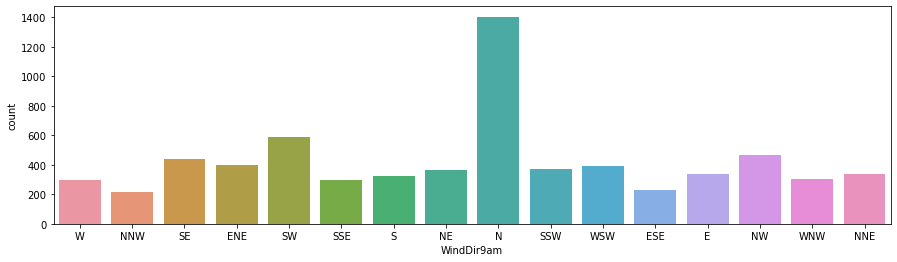

In [88]:
plt.figure(figsize=(15,4))
sns.countplot(df2['WindDir9am'])

### WIND DIRECTION AT 9AM IN NORTH IS THE HIGHEST AS COMPARED TO OTHER DIRECTIONS

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

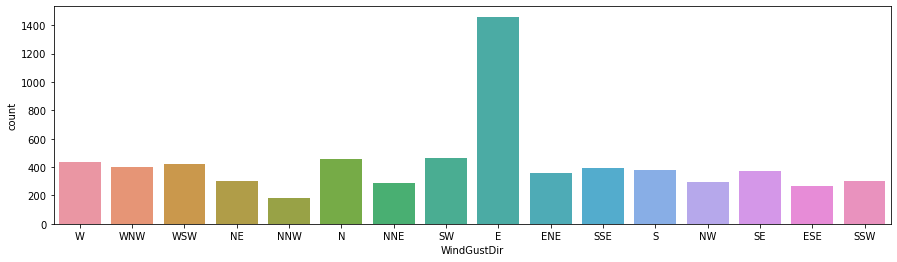

In [89]:
plt.figure(figsize=(15,4))
sns.countplot(df2['WindGustDir'])

In [90]:
### WIND GUST DIRECTION IN EAST IS THE HIGHEST AS COMPARED TO OTHER DIRECTIONS

<AxesSubplot:xlabel='Location', ylabel='count'>

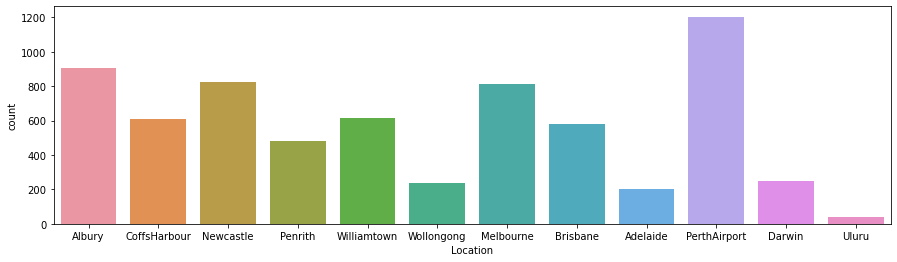

In [91]:
plt.figure(figsize=(15,4))
sns.countplot(df2['Location'])

### PERTH AIRPORT HAS THE HIGHEST COUNT IN TERMS OF LOCATION

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

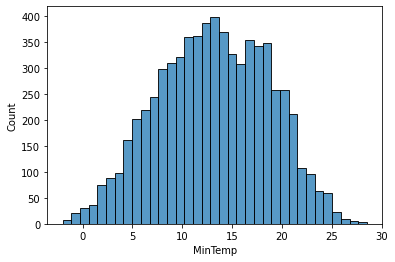

In [92]:
sns.histplot(df2['MinTemp'])

### MIN TEMP RANGES MOSTLY BETWEEN 10-15

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

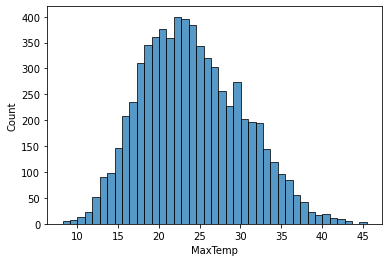

In [93]:
sns.histplot(df2['MaxTemp'])

### MAX TEMP MOST RANGES BETWEEN 20-25

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

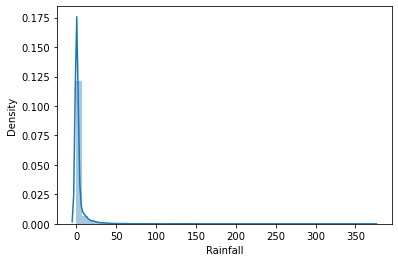

In [94]:
sns.distplot(df2['Rainfall'])

### MAX RAINFALL IS BETWEEN 0-50

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

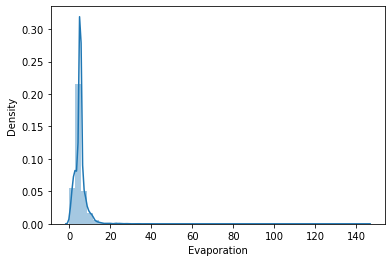

In [95]:
sns.distplot(df2['Evaporation'])

### EVAPORATION MOSTLY RANGES BETWEEN 0-20

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Count'>

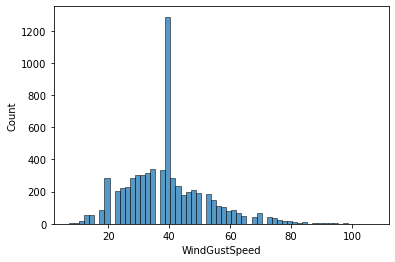

In [96]:
sns.histplot(df2['WindGustSpeed'])

### WIND GUST SPEED IS HIGHEST AT 40

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Count'>

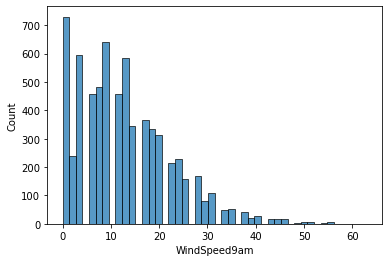

In [97]:
sns.histplot(df2['WindSpeed9am'])

### WIN SPEED AT 9AM MOSTLY RANGES BETWEEN 0-15

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Count'>

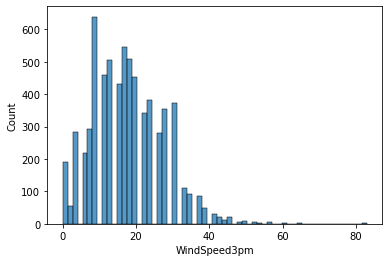

In [98]:
sns.histplot(df2['WindSpeed3pm'])

### WIN SPEED AT 3PM MOSTLY RANGES BETWEEN 0-20

<AxesSubplot:xlabel='Humidity9am', ylabel='Count'>

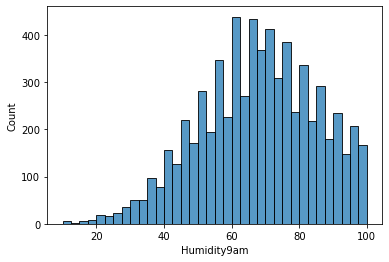

In [99]:
sns.histplot(df2['Humidity9am'])

### HUMIDITY AT 9AM MOSTLY RANGES BETWEEN 60-90

<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

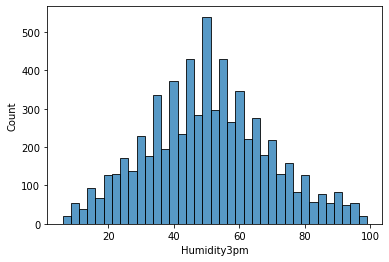

In [100]:
sns.histplot(df2['Humidity3pm'])

### HUMIDITY AT 3PM IS MAX AT 50

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

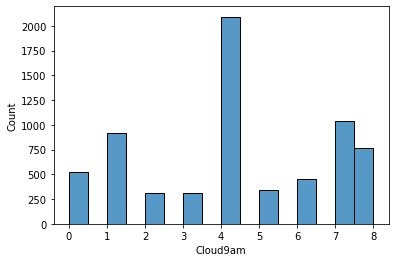

In [101]:
sns.histplot(df2['Cloud9am'])

### CLOUD AT 9AM IS HIGHEST BETWEEN 4

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

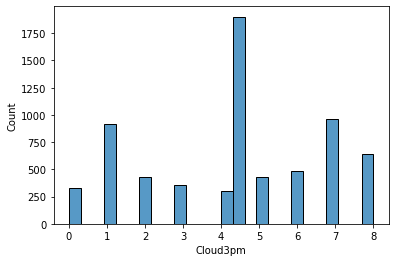

In [102]:
sns.histplot(df2['Cloud3pm'])

### CLOUD AT 3PM IS HIGHEST BETWEEN 4-5

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

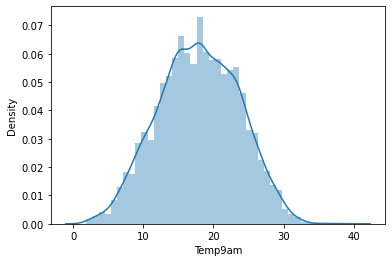

In [103]:
sns.distplot(df2['Temp9am'])

### TEMP AT 9AM RANGES MOSTLY BETWEEN 18-20

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

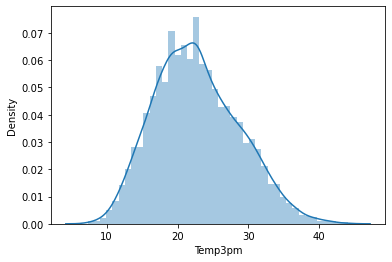

In [104]:
sns.distplot(df2['Temp3pm'])

### TEMP AT 3PM RANGES MOSTLY BETWEEN 20-30 

## GRAPHICAL BIVARIATE ANALYSIS

<AxesSubplot:xlabel='RainToday', ylabel='count'>

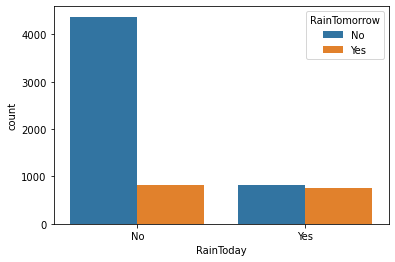

In [105]:
sns.countplot(x='RainToday',data=df2,hue='RainTomorrow')

### COUNT FOR NEGATIVE RAIN TOMORROW IS HIGHER 

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

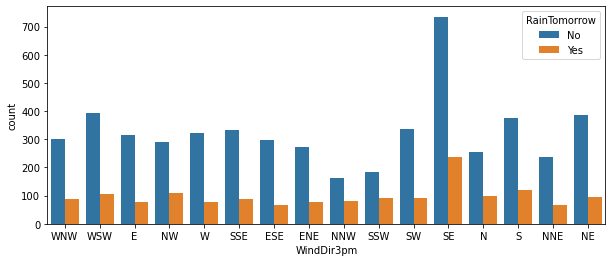

In [106]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindDir3pm',data=df2,hue='RainTomorrow')

### SE DIRECTION HAS THE HIGHEST COUNT HAND CHANCE OF NO RAIN TOMORROW IN TERMS OF WIND DIRECTION AT 3PM

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

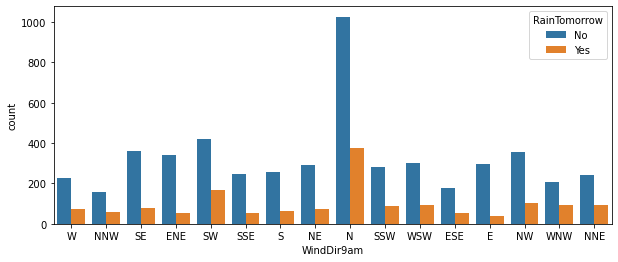

In [107]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindDir9am',data=df2,hue='RainTomorrow')

### NORTH DIRECTION HAS THE HIGHEST COUNT HAND CHANCE OF NO RAIN TOMORROW IN TERMS OF WIND DIRECTION AT 9AM

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

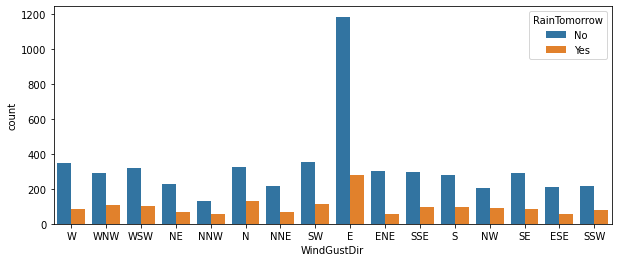

In [108]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindGustDir',data=df2,hue='RainTomorrow')

### EAST GAS THE HIGHEST COUNT AND CHANCE OF NO RAIN TOMORROW IN TERMS WIND GUST DIRECTION

<AxesSubplot:xlabel='Location', ylabel='count'>

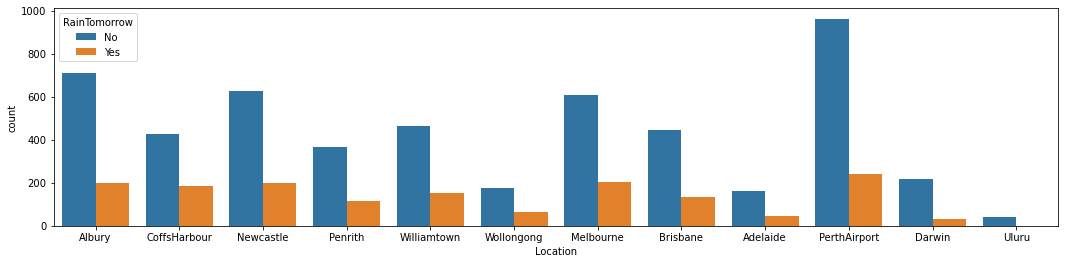

In [109]:
plt.figure(figsize=(18,4))
sns.countplot(x='Location',data=df2,hue='RainTomorrow')

### PERTH AIRPORT HAS THE HIGHEST CHANCE OF NO RAIN TOMORROW

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

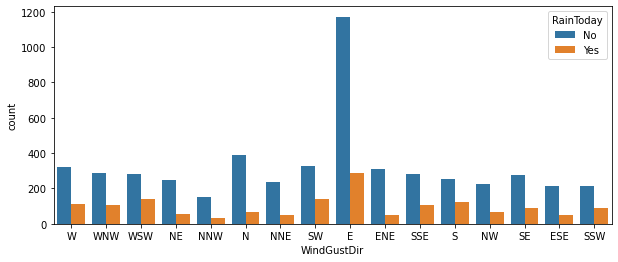

In [110]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindGustDir',data=df2,hue='RainToday')

### EAST DIRECTION HAS THE HIGHEST CHANCE OF NO RAIN IN TERMS OF WIND GUST DIRECTION

<AxesSubplot:xlabel='Location', ylabel='count'>

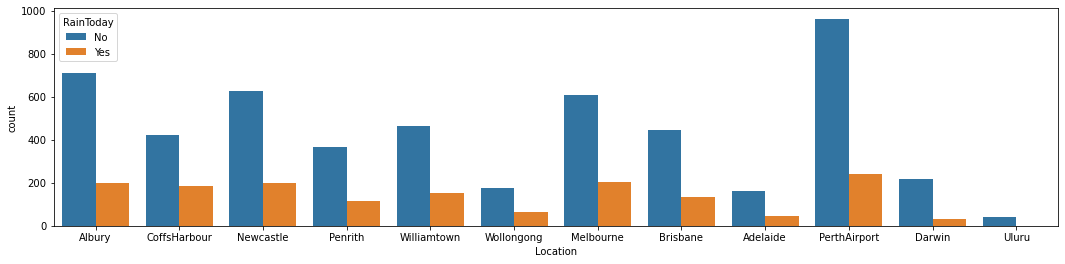

In [111]:
plt.figure(figsize=(18,4))
sns.countplot(x='Location',data=df2,hue='RainToday')

### PERTH AIRPORT HAS THE HIGHEST CHANCE OF NO RAIN TODAY

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

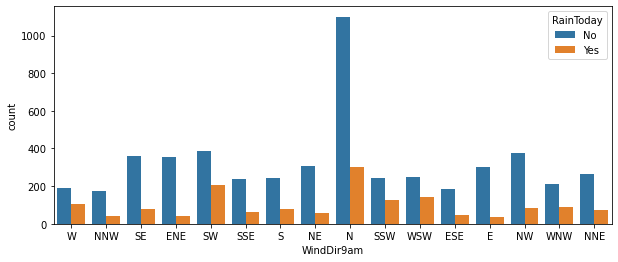

In [112]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindDir9am',data=df2,hue='RainToday')

### NORTH DIRECTION HAS THE HIGHEST COUNT AND POSSIBILITY OF NO RAIN TODAY IN TERMS OF WIND DIRECTION AT 9AM

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

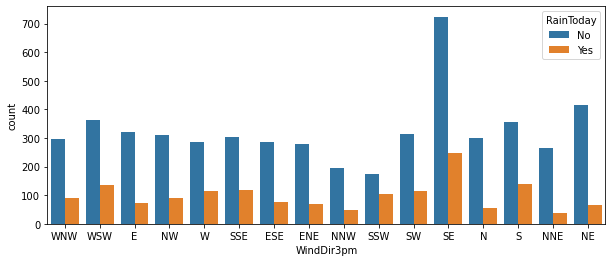

In [113]:
plt.figure(figsize=(10,4))
sns.countplot(x='WindDir3pm',data=df2,hue='RainToday')

### SOUTH EAST DIRECTION HAS THE HIGHEST COUNT AND POSSIBILITY OF NO RAIN TODAY IN TERMS OF WIND DIRECTION AT 3PM

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

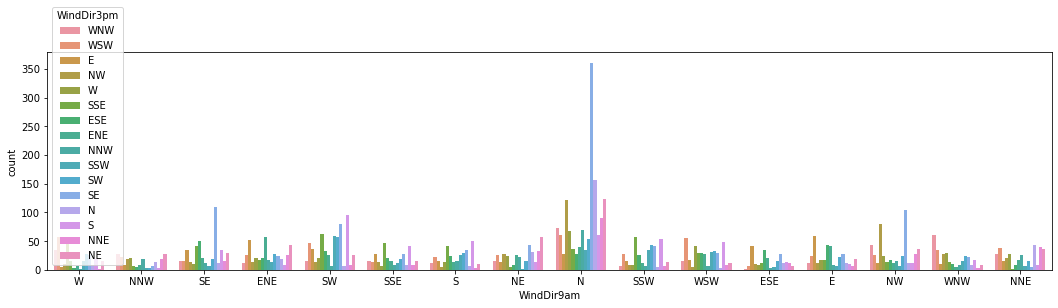

In [114]:
plt.figure(figsize=(18,4))
sns.countplot(x='WindDir9am',data=df2,hue='WindDir3pm')

### WIND DIRECTION AT 9AM IN NORTH DIRECTION IS THE MAX WHERE WIND DIRECTION AT 3PM IS THE HIGHEST 

<AxesSubplot:xlabel='Location', ylabel='count'>

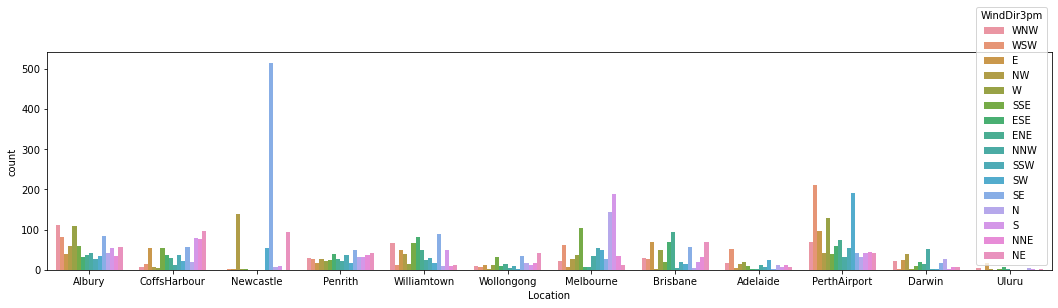

In [115]:
plt.figure(figsize=(18,4))
sns.countplot(x='Location',data=df2,hue='WindDir3pm')

### NEWCASTLE RECORDS THE HIGHEST WIND DIRECTION AT 3PM IN THE SOUTH EAST DIRECTION 

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

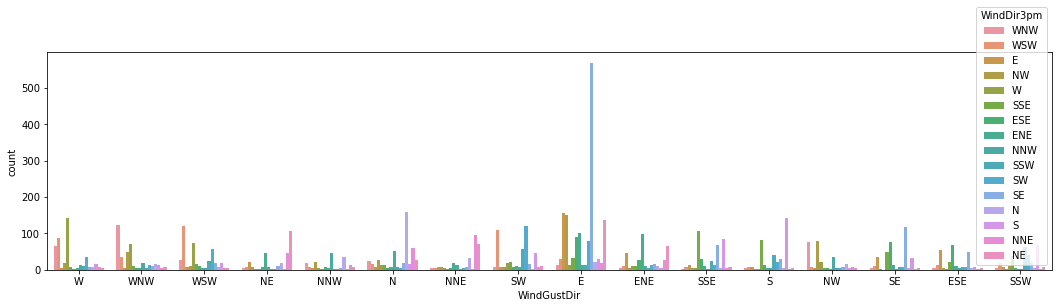

In [116]:
plt.figure(figsize=(18,4))
sns.countplot(x='WindGustDir',data=df2,hue='WindDir3pm')

### WIND GUST IN EAST DIRECTION RECORDS THE MAX COUNT FOR WIND DIRECTION AT 3 PM IN NORTH

<AxesSubplot:xlabel='Location', ylabel='count'>

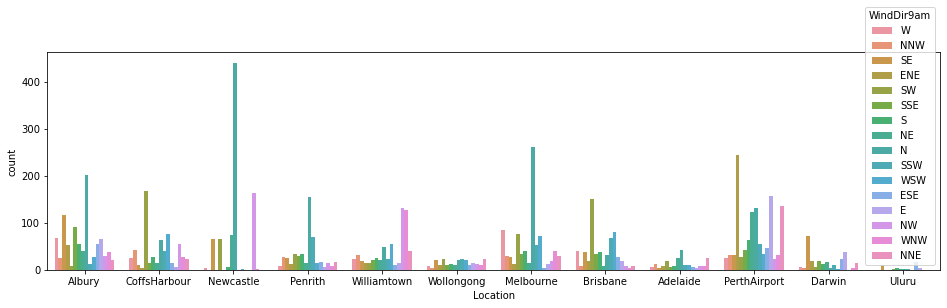

In [117]:
plt.figure(figsize=(16,4))
sns.countplot(x='Location',data=df2,hue='WindDir9am')

### NEWCASTLE RECORDS THE HIGHEST WIND DIRECTION AT 9AM IN NORTH EAST DIRECTION 

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

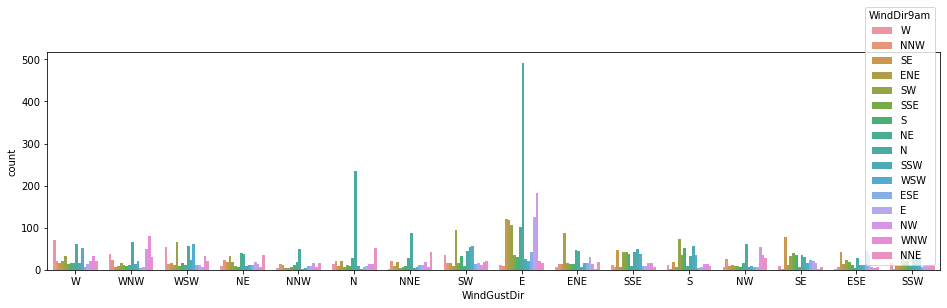

In [118]:
plt.figure(figsize=(16,4))
sns.countplot(x='WindGustDir',data=df2,hue='WindDir9am')

### WIND GUST IN EAST DIRECTION RECORDS THE HIGHEST COUNT WHEN WIND DIRECTION AT 9AM IS IN NORTH EAST DIRECTION 

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

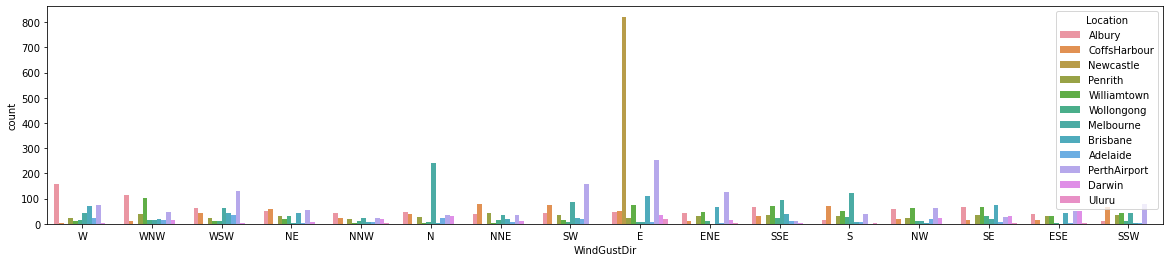

In [119]:
plt.figure(figsize=(20,4))
sns.countplot(x='WindGustDir',data=df2,hue='Location')

### WIND GUST RECORDS THE HIGHEST COUNT IN LOCATION 4 

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

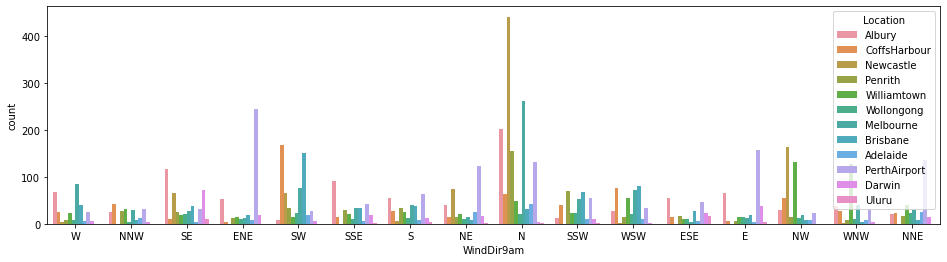

In [120]:
plt.figure(figsize=(16,4))
sns.countplot(x='WindDir9am',data=df2,hue='Location')

### WIN DIRECTION AT 9AM IN NORTH DIRECTION RECORDS THE HIGHEST IN PENRITH REGION 

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

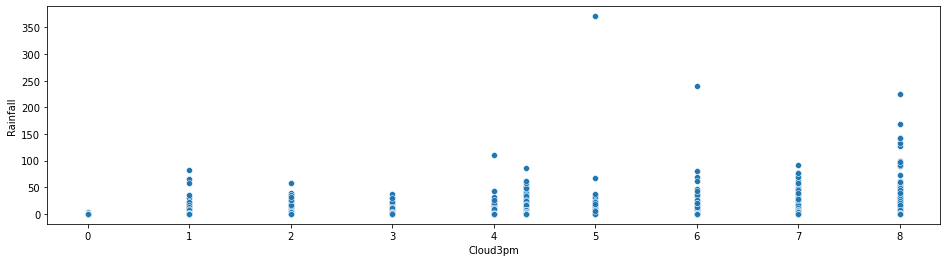

In [121]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Cloud3pm',y='Rainfall',data=df2)

### RAINFALL REMAINS LOW AT ALL STAGES EXCEPT FOR 8TH STAGE OF CLOUD AT 3PM 

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

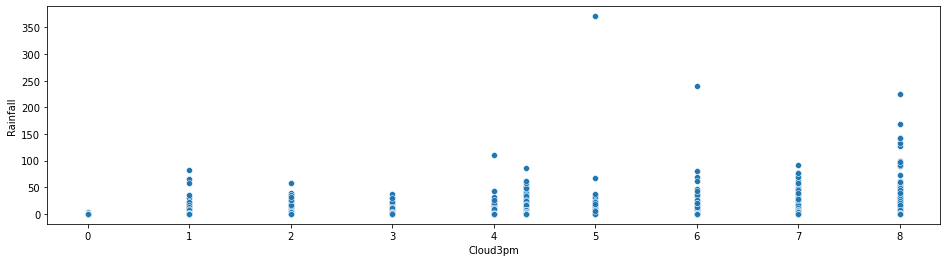

In [122]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Cloud3pm',y='Rainfall',data=df2)

### AT 8TH POINT OF CLOUD AT 3 PM REFLECTS THE HIGHEST RAINFALL

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

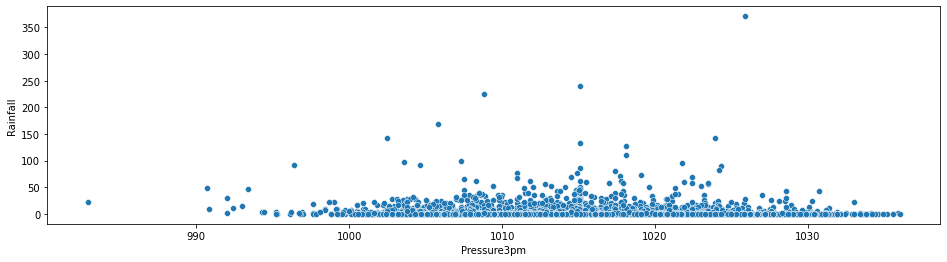

In [123]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Pressure3pm',y='Rainfall',data=df2)

### RAINFALL IS MAX WHEN PRESSURE AT 3PM INCREASES FROM 1000-1020

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

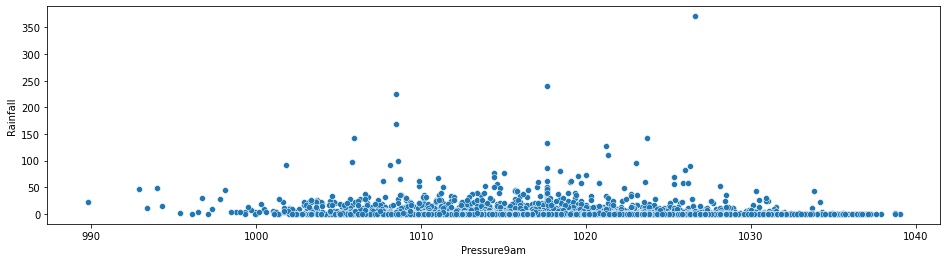

In [124]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Pressure9am',y='Rainfall',data=df2)

### RAINFALL IS MAX WHEN PRESSURE AT 9AM INCREASES FROM 1000-1020

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

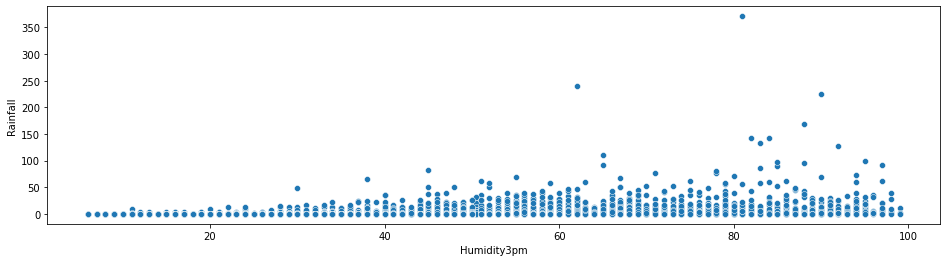

In [125]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Humidity3pm',y='Rainfall',data=df2)

### RAINFALL IS MAX WHEN HUMIDITY  AT 3PM INCREASES FROM 40-60

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

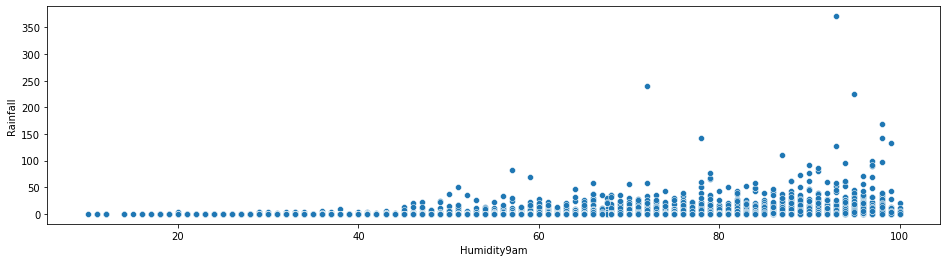

In [126]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Humidity9am',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-50 WHEN HUMIDITY AT 9AM RANNGES BETWEEN 0-70

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

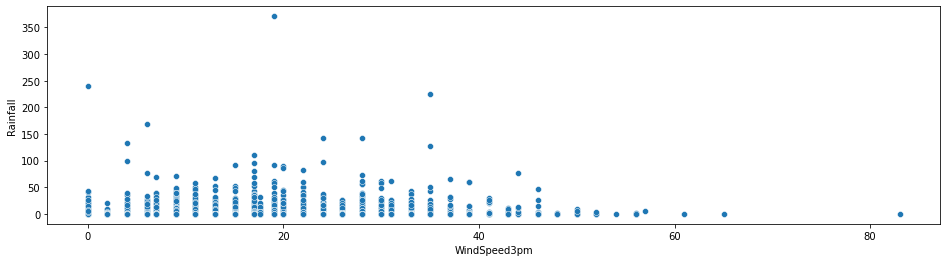

In [127]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindSpeed3pm',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-100 WHEN WIND SPEED AT 3PM RANGES BETWEEN 0-50

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

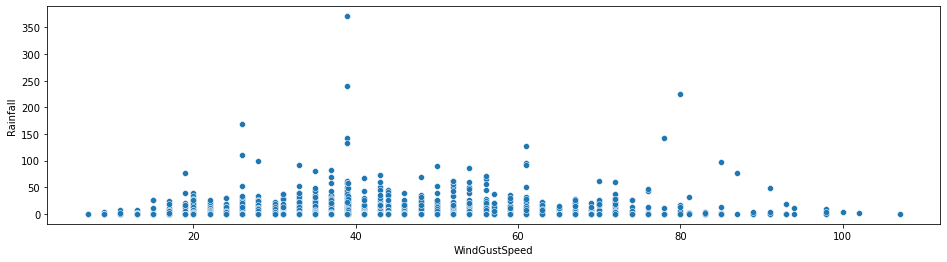

In [128]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindGustSpeed',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-100 WHEN WIND GUST SPEED RANNGES BETWEEN 5-100

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

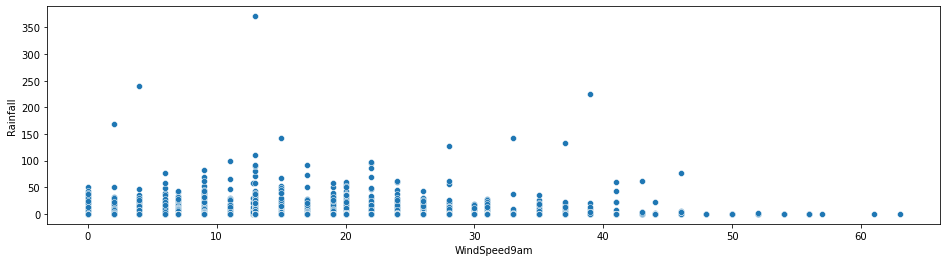

In [129]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindSpeed9am',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-100 WHEN WIND SPEED AT 9AM RANNGES BETWEEN 0-42 AND THEN SLOWS DOWN 

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

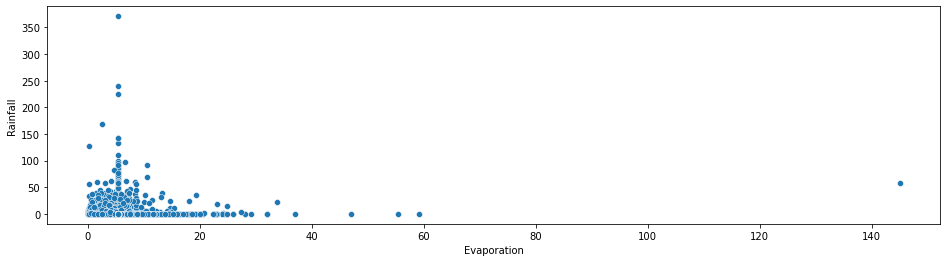

In [130]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Evaporation',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-100 WHEN EVAPORATION RANGES BETWEEN 0-25

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

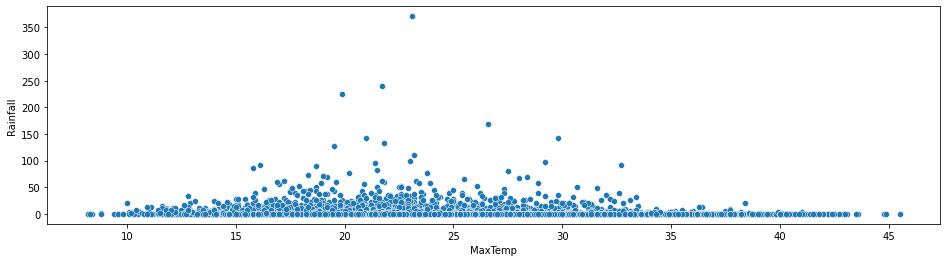

In [131]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='MaxTemp',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-50 WHEN MAX TEMP RANNGES BETWEEN 5-45

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

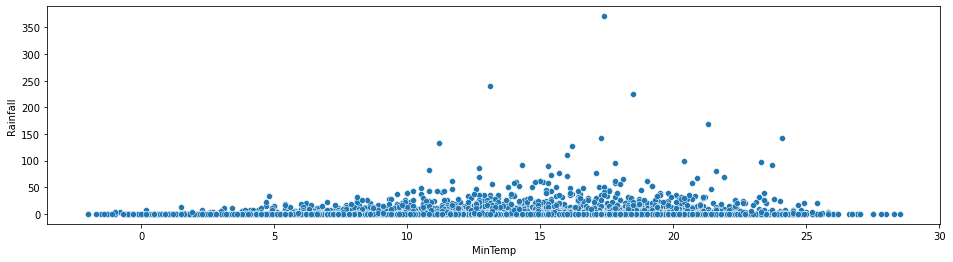

In [132]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='MinTemp',y='Rainfall',data=df2)

### RAINFALL RANGES MOSTLY BETWEEN 0-50 WHEN MIN TEMP RANGES BETWEEN 0-25

<AxesSubplot:xlabel='MinTemp', ylabel='Evaporation'>

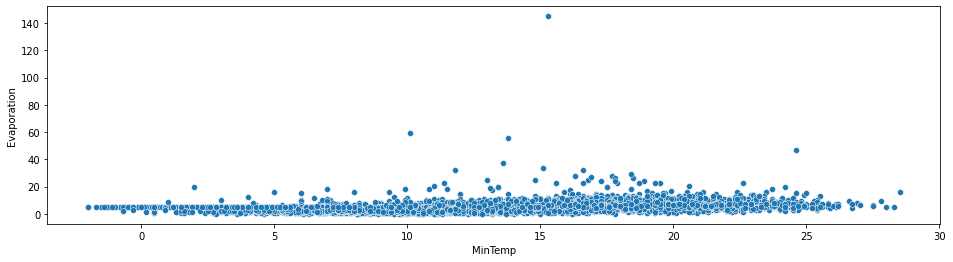

In [133]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='MinTemp',y='Evaporation',data=df2)

### EVAPORATION ROUGHLY STAYS CONSTANT BETWEEN 0-15 WHEN MIN TEMP INCREASES FROM 0-25 

<AxesSubplot:xlabel='MaxTemp', ylabel='Evaporation'>

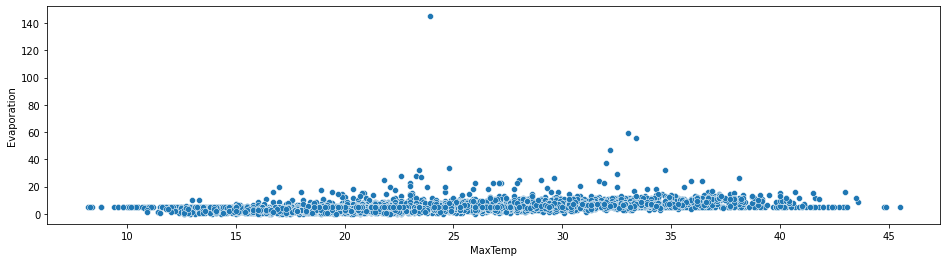

In [134]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='MaxTemp',y='Evaporation',data=df2)

### EVAPORATION LEVEL RANGES BETWEEN 0-20 MOSTLY WHEN MAX TEMP RANGES BETWEEN 10-45

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Evaporation'>

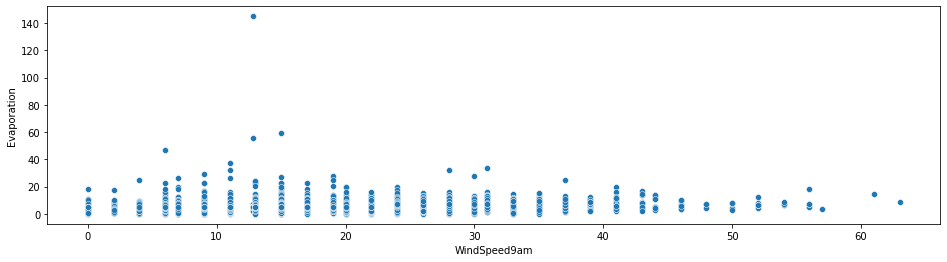

In [135]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindSpeed9am',y='Evaporation',data=df2)

### EVAPORATION RANGES BETWEEN 0-40 ROUGHLY WHEN WIN SPEED AT 9AM RANGES BETWEEN 0-55

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Evaporation'>

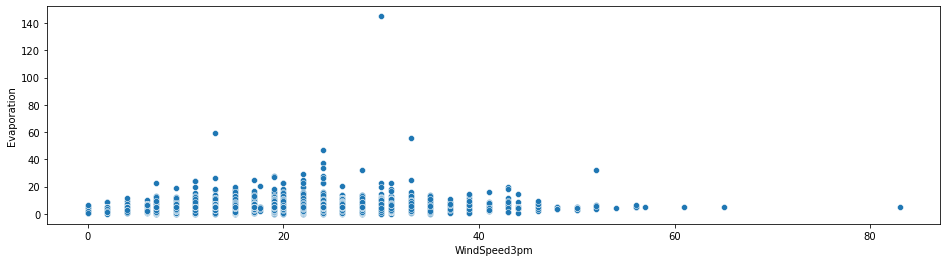

In [136]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindSpeed3pm',y='Evaporation',data=df2)

### EVAPORATION ROUGHLY RANGES BETWEEN 0-40 WHEN WIND SPEED AT 3PM RANGES BETWEEN 0-40 APPROX 

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Evaporation'>

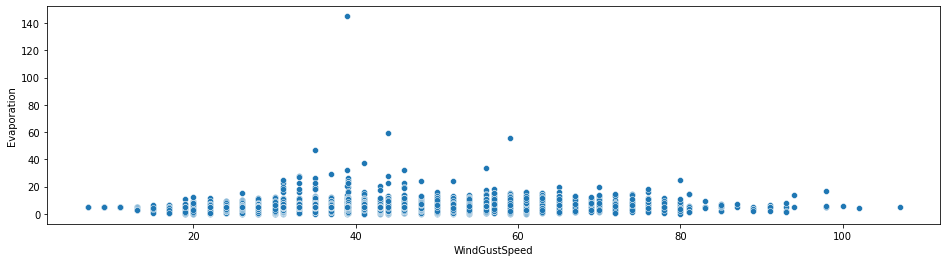

In [137]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindGustSpeed',y='Evaporation',data=df2)

### EVAPORATION MOSTLY RANGES BETWEEN 0-40 WHEN WIND GUST SPEED RANGES BETWEEN 5-100

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Evaporation'>

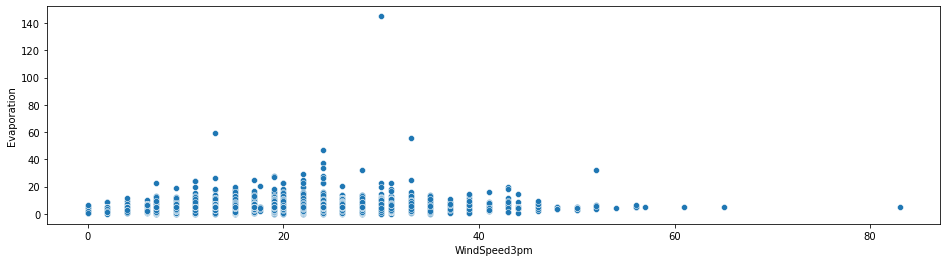

In [138]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='WindSpeed3pm',y='Evaporation',data=df2)

### EVAPORATION LEVEL RANGES BETWEEN 0-40 MOSTLY WHEN WIND SPEED AT 3PM RANGES BETWEEN 0-45

<AxesSubplot:xlabel='Humidity9am', ylabel='Evaporation'>

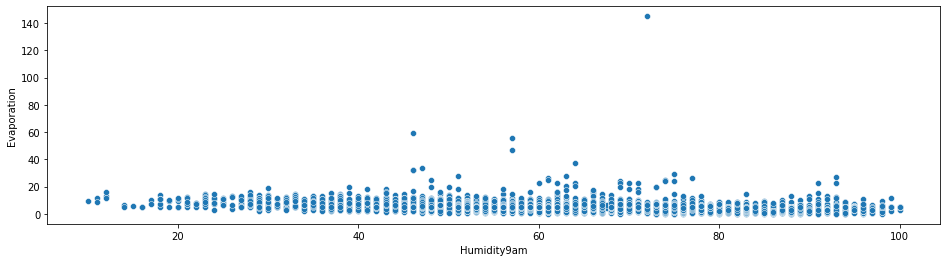

In [139]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Humidity9am',y='Evaporation',data=df2)

### EVAPORATION REMIANS CONSTANT WHEN HUMIDITY AT 9AM RANGES BETWEEN 5-100

<AxesSubplot:xlabel='Humidity3pm', ylabel='Evaporation'>

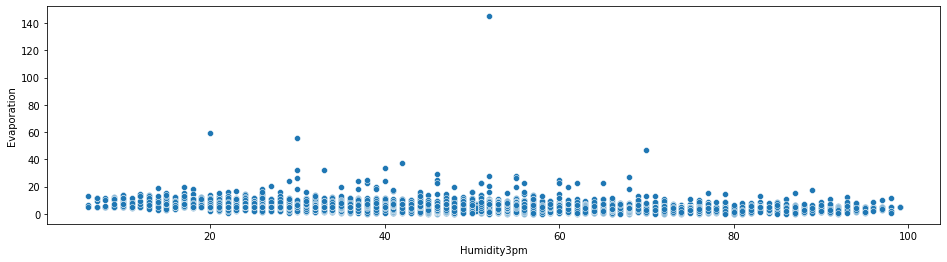

In [140]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Humidity3pm',y='Evaporation',data=df2)

### EVAPORATION REMIANS CONSTANT WHEN HUMIDITY AT 3PM RANGES BETWEEN 5-45

<AxesSubplot:xlabel='Pressure9am', ylabel='Evaporation'>

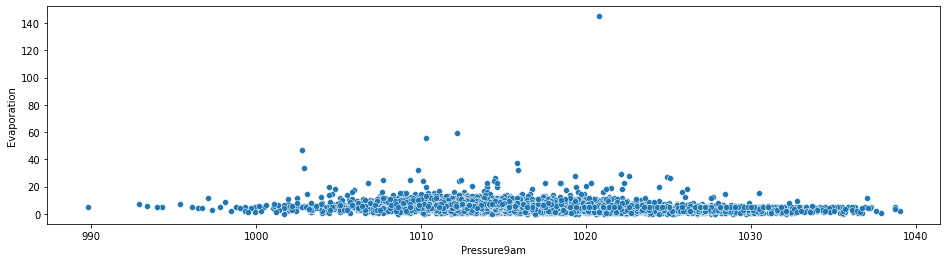

In [141]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Pressure9am',y='Evaporation',data=df2)

### EVAPORATION REMAINS CONSTANT WHEN PRESSURE AT 9AM RANGES BETWEEN 1000-1040

<AxesSubplot:xlabel='Cloud3pm', ylabel='Evaporation'>

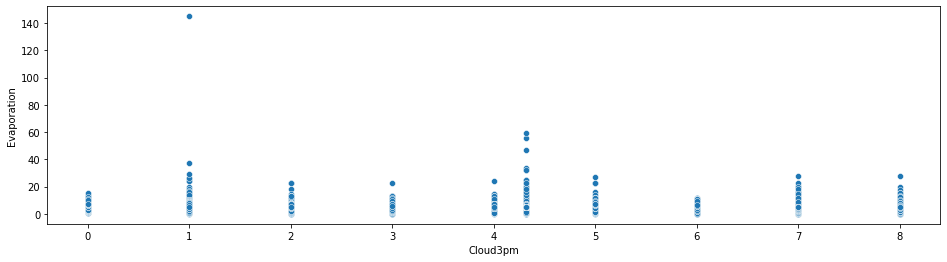

In [142]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Cloud3pm',y='Evaporation',data=df2)

### EVAPORATION LEVEL RANGES BETWEEN 0-60 MAX WHEN CLOUD AT 3PM RANGES BETWEEN 0-8 

<AxesSubplot:xlabel='Cloud9am', ylabel='Evaporation'>

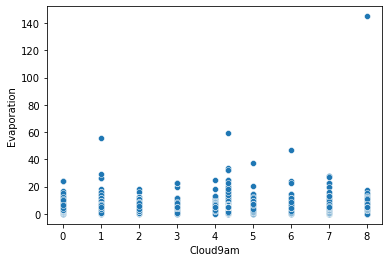

In [143]:
sns.scatterplot(x='Cloud9am',y='Evaporation',data=df2)

### EVAPORATION LEVEL RANGES BETWEEN 0-40 MOSTLY WHEN CLOUD AT 9AM RANGES BETWEEN 0-8 

<AxesSubplot:xlabel='Temp9am', ylabel='Evaporation'>

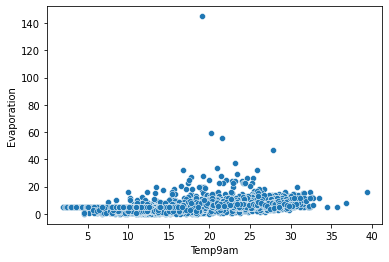

In [144]:
sns.scatterplot(x='Temp9am',y='Evaporation',data=df2)

### EVAPORATION REMIANS CONSTANT WHEN TEMP AT 9AM RANGES BETWEEN 5-45

<AxesSubplot:xlabel='Temp3pm', ylabel='Evaporation'>

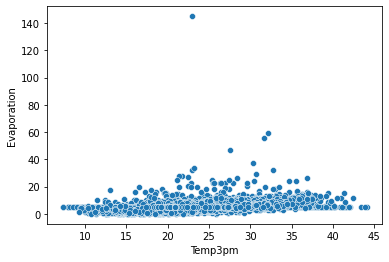

In [145]:
sns.scatterplot(x='Temp3pm',y='Evaporation',data=df2)

### EVAPORATION REMIANS CONSTANT WHEN TEMP AT 3PM RANGES BETWEEN 5-45

<AxesSubplot:xlabel='Temp3pm', ylabel='MinTemp'>

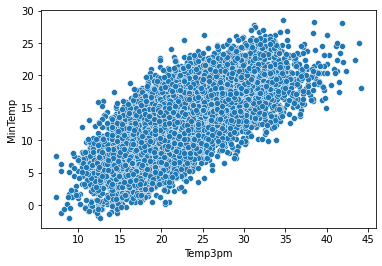

In [146]:
sns.scatterplot(x='Temp3pm',y='MinTemp',data=df2)

### MIN TEMP INCREASES WHEN TEMP AT 3PM INCREASES

<AxesSubplot:xlabel='Cloud9am', ylabel='MinTemp'>

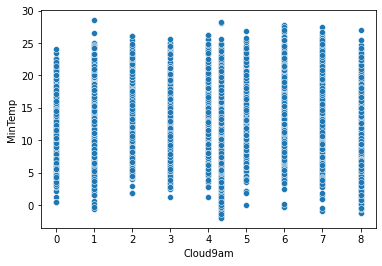

In [147]:
sns.scatterplot(x='Cloud9am',y='MinTemp',data=df2)

### MIN TEMP RANGES BETWEEN 0-30 WHEM CLOUD AT 9AM RANGES BETWEEN 0-8 

<AxesSubplot:xlabel='Cloud3pm', ylabel='MinTemp'>

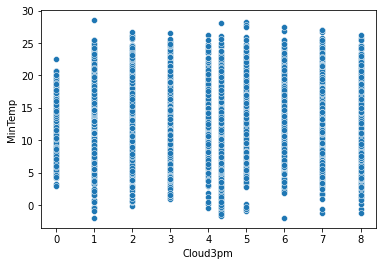

In [148]:
sns.scatterplot(x='Cloud3pm',y='MinTemp',data=df2)

### MIN TEMP RANGES BETWEEN 0-30 WHEM CLOUD AT 3PM RANGES BETWEEN 0-8 

<AxesSubplot:xlabel='Humidity3pm', ylabel='MinTemp'>

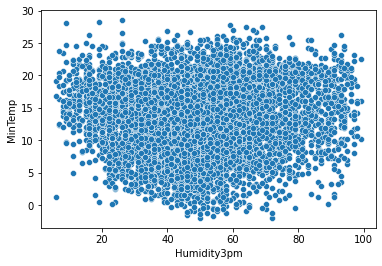

In [149]:
sns.scatterplot(x='Humidity3pm',y='MinTemp',data=df2)

### MIN TEMP ROUGHLY RANGES BETWEEN 0-25 WHEN HUMIDITY AT 3PM RANGES BETWEEN 20-100

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='MinTemp'>

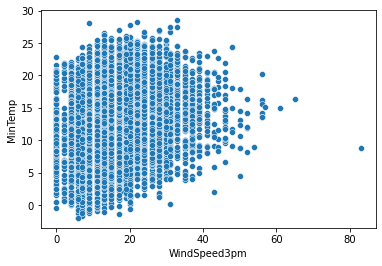

In [150]:
sns.scatterplot(x='WindSpeed3pm',y='MinTemp',data=df2)

### MIN TEMP RANGES ROUGHLY BETWEEN 0-30 WHEN WIND SPEED AT 3PM RANGES BETWEEN 0-45

<AxesSubplot:xlabel='Cloud9am', ylabel='MaxTemp'>

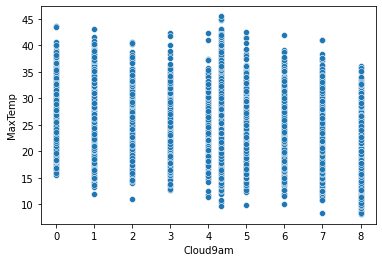

In [151]:
sns.scatterplot(x='Cloud9am',y='MaxTemp',data=df2)

### MAX TEMP ROUGHLY RANGES BETWEEN 10-45 WHEN CLOUD AT 9AM RANGES BETWEEN 0-8

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='MaxTemp'>

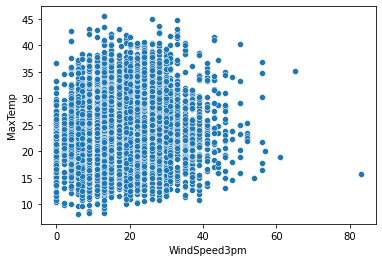

In [152]:
sns.scatterplot(x='WindSpeed3pm',y='MaxTemp',data=df2)

### MAX TEMP RANGES ROUGHLY BETWEEN 10-45 WHEN WIND SPEED AT 3PM RANGES BETWEEN 0-45

<AxesSubplot:xlabel='Pressure3pm', ylabel='MaxTemp'>

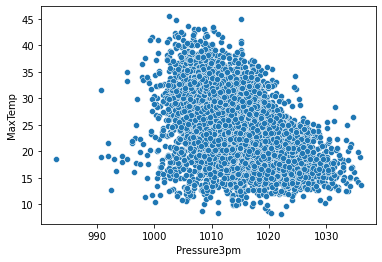

In [153]:
sns.scatterplot(x='Pressure3pm',y='MaxTemp',data=df2)

### MAX TEMP RANGES ROUGHLY BETWEEN 10-45 WHEN WIND PRESSURE AT 3PM RANGES BETWEEN 1000-1035

<AxesSubplot:xlabel='Pressure9am', ylabel='MaxTemp'>

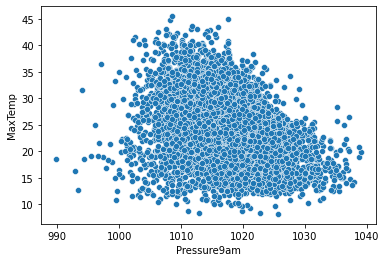

In [154]:
sns.scatterplot(x='Pressure9am',y='MaxTemp',data=df2)

### MAX TEMP RANGES ROUGHLY BETWEEN 10-45 WHEN PRESSURE AT 9AM RANGES BETWEEN 1000-1035

<AxesSubplot:xlabel='Humidity3pm', ylabel='MaxTemp'>

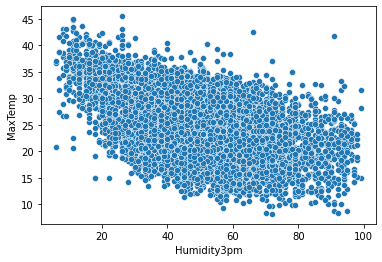

In [155]:
sns.scatterplot(x='Humidity3pm',y='MaxTemp',data=df2)

### MAX TEMP DECREASES WHEN HUMIDITY AT 3PM INCREASES

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

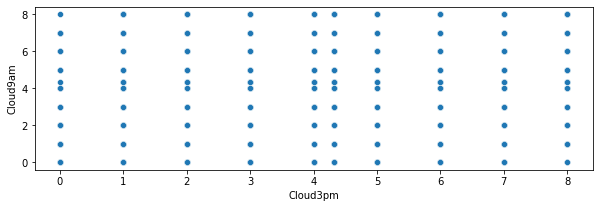

In [156]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Cloud3pm',y='Cloud9am',data=df2)

### CLOUD AT 9AM RANGES BETWEEN 0-8. WHEN CLOUD AT 3PM RANGES BETWEEN 0-8 

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Cloud9am'>

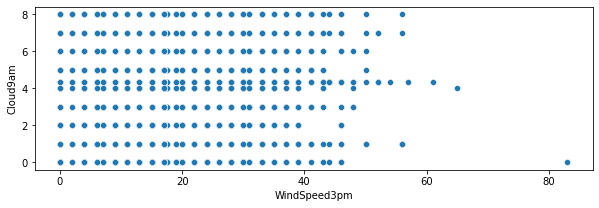

In [157]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='WindSpeed3pm',y='Cloud9am',data=df2)

### CLOUD AT 9AM RANGES BETWEEN 0-8 WHEN WIN SPEED AT 3PM RANGES BETWEEN 0-40 

<AxesSubplot:xlabel='Pressure9am', ylabel='Cloud9am'>

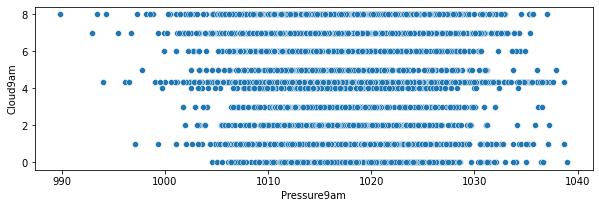

In [158]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Pressure9am',y='Cloud9am',data=df2)

### PRESSURE AT 9AM AND CLOUD AT 9AM RUN PARALLEL TO EACH OTHER

<AxesSubplot:xlabel='Temp3pm', ylabel='Cloud9am'>

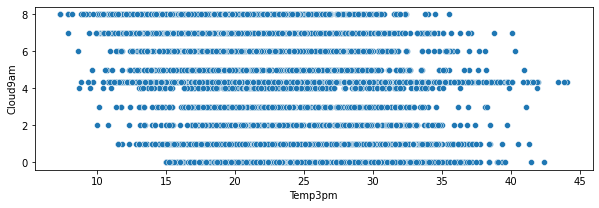

In [159]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Temp3pm',y='Cloud9am',data=df2)

### CLOUD AT 9AM RANGES BETWEEN 0-8 WHEN TEMP AT 3PM RANGES BETWEEB 10-40 

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Humidity3pm'>

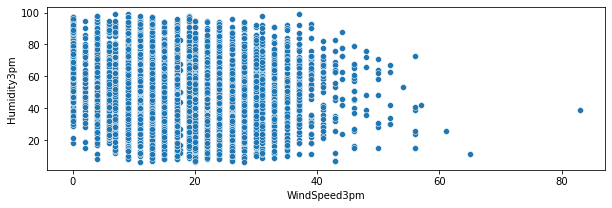

In [160]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='WindSpeed3pm',y='Humidity3pm',data=df2)

### HUMIDITY AT 3PM RANGES BETWEEN 20-100 WHEN WIND SPEED AT 30 RANGES BETWEEN 0-40 AND THEN REDUCES 

<AxesSubplot:xlabel='Pressure9am', ylabel='Humidity9am'>

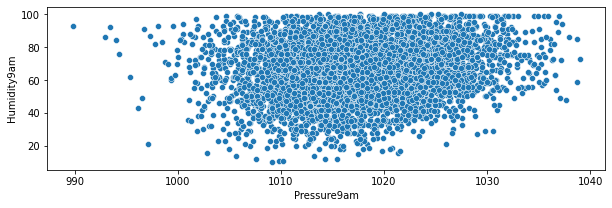

In [161]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Pressure9am',y='Humidity9am',data=df2)

### HUMIDITY AT 9PM RANGES BETWEEB 20-100 WHEN PRESSURE AT 9AM RANGES FROM 1010-1030

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Humidity3pm'>

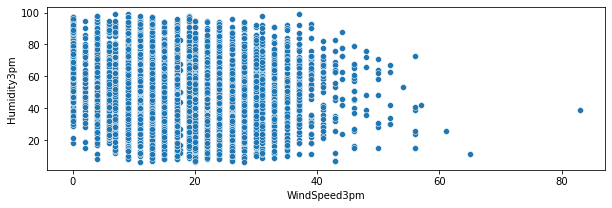

In [162]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='WindSpeed3pm',y='Humidity3pm',data=df2)

### HUMIDITY AT 3PM REMAINS CONSTANT WHEN WIND SPEED AT 3OM RANGES FROM 0-40 AND THEN DECREASES

<AxesSubplot:xlabel='Pressure3pm', ylabel='Humidity3pm'>

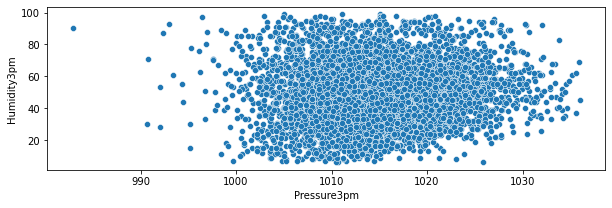

In [163]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='Pressure3pm',y='Humidity3pm',data=df2)

### HUMIDITY AT 3PM REMAINS CONSTANT WHEN PRESSURE AT 3PM RANGES FROM 1000-1020

<AxesSubplot:xlabel='MaxTemp', ylabel='Humidity3pm'>

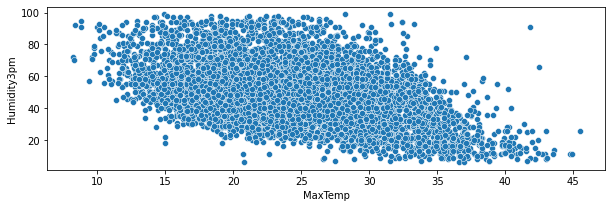

In [164]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='MaxTemp',y='Humidity3pm',data=df2)

### HUMIDITY AT 3PM FALLS WHEN MAX TEMP INCREASES

<AxesSubplot:xlabel='MinTemp', ylabel='Humidity3pm'>

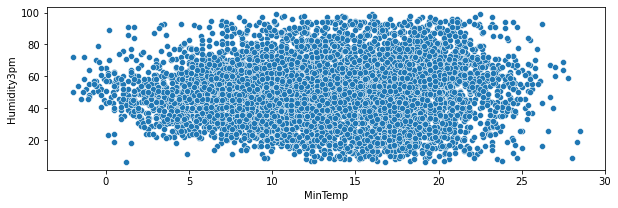

In [165]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='MinTemp',y='Humidity3pm',data=df2)

### HUMIDITY IS MAX WHEN MIN TEMP RANGES FROM 10-20

## GRAPHICAL MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='WindGustSpeed', ylabel='MinTemp'>

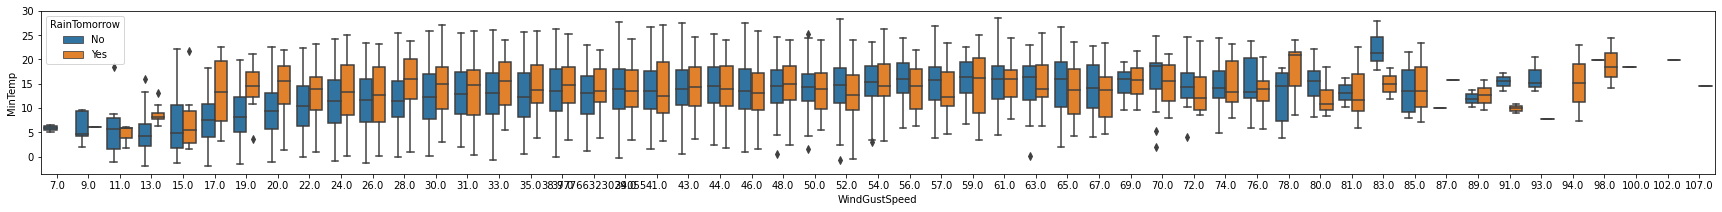

In [166]:
plt.figure(figsize=(30,3))
sns.boxplot(data=df2,x='WindGustSpeed',hue='RainTomorrow',y='MinTemp')

### PROBABILITY OF RAIN TOMORROW WRT TO MIN TEMP AND VARIOUS WIND GUST SPEED IS MOSTLY YES

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

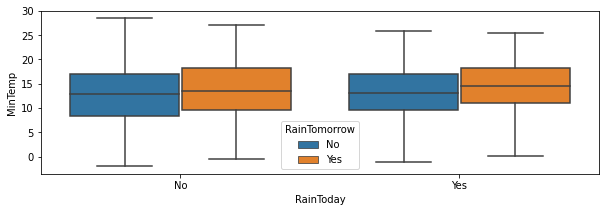

In [167]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df2,x='RainToday',hue='RainTomorrow',y='MinTemp')

### MIN TEMP RANGES BETWEEN 10-20 AND PROBABILTY OF RAIN TOMORROW WRT RAIN TODAY IS MOSTLY 50-50

<AxesSubplot:xlabel='WindDir3pm', ylabel='MinTemp'>

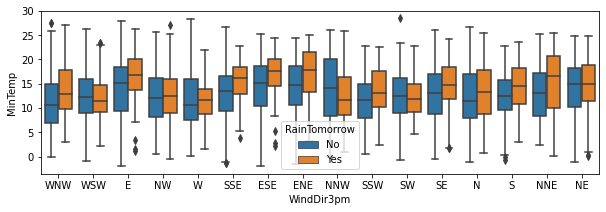

In [168]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df2,x='WindDir3pm',hue='RainTomorrow',y='MinTemp')

### MIN TEMP IS MAX AT ABOUT 30 WHEN WIN DIRECTION AT 3PM IS MOST IN WEST & EAST DIRECTION WHERE NEGATIVE CHANCE NO RAIN TOMORROW IS HIGHER 

<AxesSubplot:xlabel='WindDir9am', ylabel='MinTemp'>

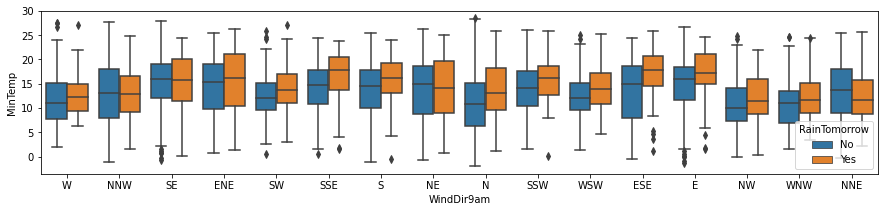

In [169]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df2,x='WindDir9am',hue='RainTomorrow',y='MinTemp')

### MIN TEMP IS MAX AT ABOUT 30 WHEN WIN DIRECTION AT 9AM IS MOST IN NORTH DIRECTION WHERE POSITIVE CHANCE OF RAIN TOMORROW IS HIGHER 

<AxesSubplot:xlabel='Location', ylabel='MinTemp'>

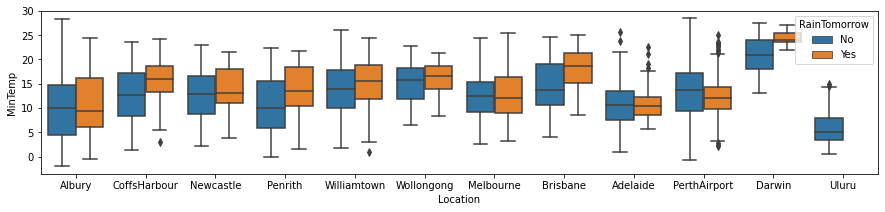

In [170]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='MinTemp')

### MIN TEMP IS MAX IN ALBURY AND PERTH AIRPORT WHERE CHANCE OF NO RAIN TOMORROW IS HIGHER IN PERTH AND POSITIVE CHANCE OF RAIN IS HIGHER IN ALBURY

<AxesSubplot:xlabel='RainTomorrow', ylabel='MinTemp'>

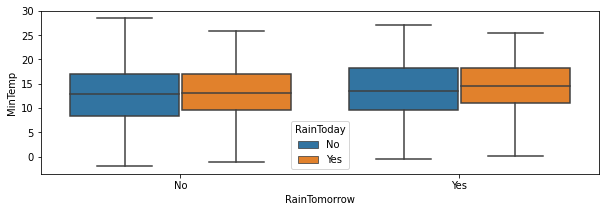

In [171]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df2,x='RainTomorrow',hue='RainToday',y='MinTemp')

### MIN TEMP IS MAX FOR NO RAIN TOMORROW WHERE CHANCES OF POSITIVE/NEGATIVE RAIN TODAY ARE MORE OR LESS EQUAL

<AxesSubplot:xlabel='WindDir9am', ylabel='MinTemp'>

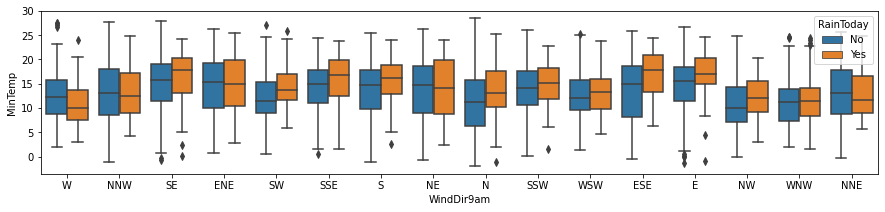

In [172]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df2,x='WindDir9am',hue='RainToday',y='MinTemp')

### MIN TEMP IS MAX AT ABOUT 30 WHEN WIN DIRECTION AT 9AM IS MOST IN NORTH DIRECTION WHERE POSITIVE CHANCE OF RAIN TODAY IS HIGHER 

<AxesSubplot:xlabel='WindDir3pm', ylabel='MinTemp'>

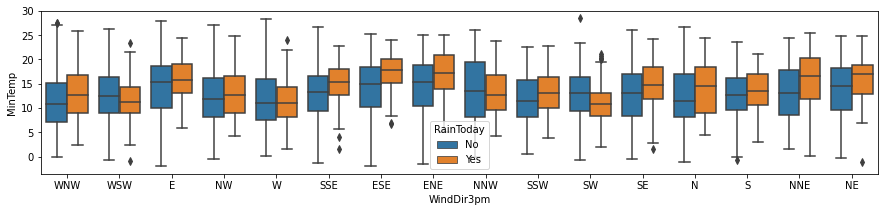

In [173]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df2,x='WindDir3pm',hue='RainToday',y='MinTemp')

### MIN TEMP IS MAX AT ABOUT 30 WHEN WIN DIRECTION AT 9AM IS MOST IN EAST & WEST DIRECTION WHERE NEGATIVE CHANCE OF RAIN TODAY IS HIGHER 

<AxesSubplot:xlabel='WindGustSpeed', ylabel='MinTemp'>

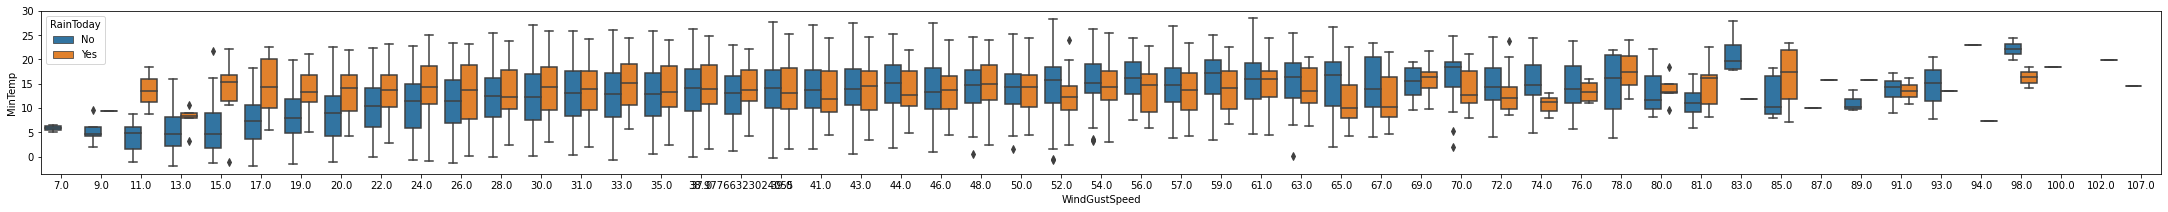

In [174]:
plt.figure(figsize=(38,3))
sns.boxplot(data=df2,x='WindGustSpeed',hue='RainToday',y='MinTemp')

### MIN TEMP RANGES BETWEEN 0-30 AND WIND GUST SPEED IS UNIFORM ACCROSS ALL POINTS WHERE WE HAVE ALMOST EQUAL CHANCES OF RAINA ND NO RAIN TODAY

<AxesSubplot:xlabel='RainToday', ylabel='Temp3pm'>

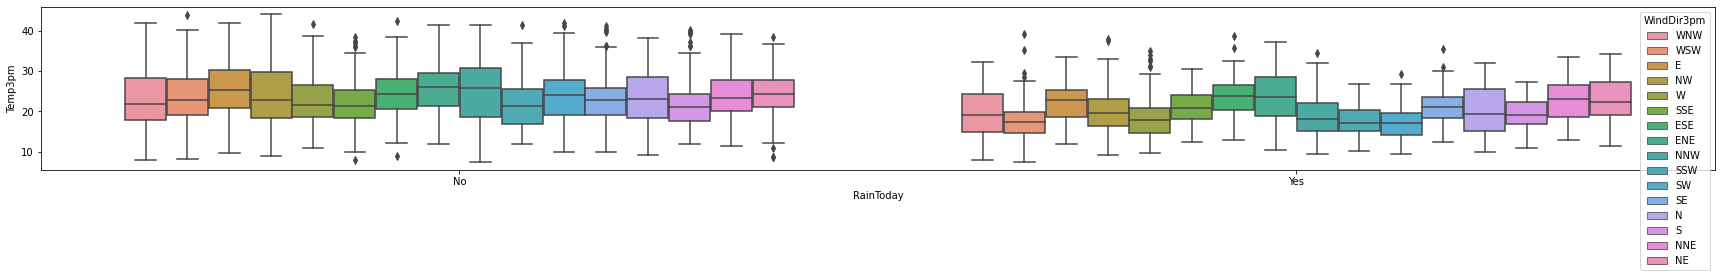

In [175]:
plt.figure(figsize=(30,3))
sns.boxplot(data=df2,x='RainToday',hue='WindDir3pm',y='Temp3pm')

### TEMP AT 3PM IS THE MAX AT 40 FOR NO RAIN TODAY ACORSS WIN DIRECTION IN NORTH WEST AT 3PM 

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

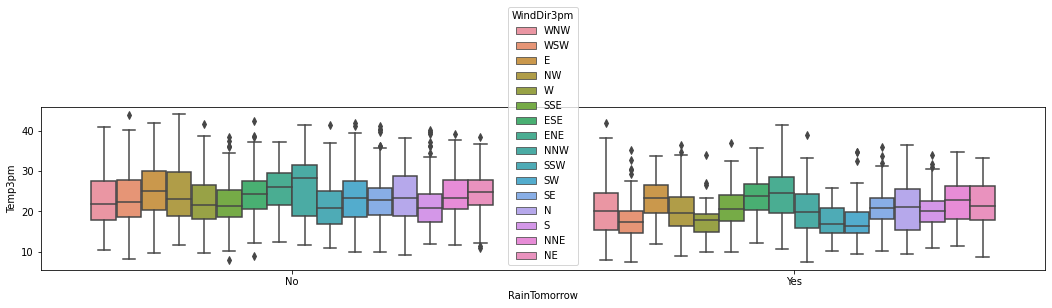

In [176]:
plt.figure(figsize=(18,3))
sns.boxplot(data=df2,x='RainTomorrow',hue='WindDir3pm',y='Temp3pm')

### TEMP AT 3PM IS THE MAX AT 40 FOR NO RAIN TOMORROW ACORSS WIN DIRECTION IN SSW AT 3PM 

<AxesSubplot:xlabel='Location', ylabel='Temp3pm'>

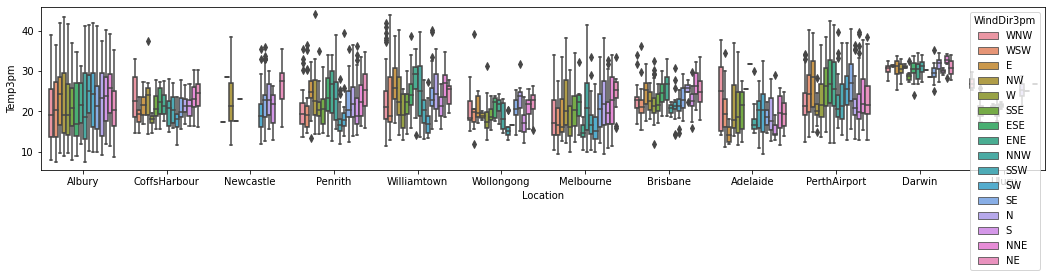

In [177]:
plt.figure(figsize=(18,3))
sns.boxplot(data=df2,x='Location',hue='WindDir3pm',y='Temp3pm')

### TEMP AT 3PM RANGES BETWEEN 10-42 MOSTLY ACCROSS ALL LOCATIONS 

<AxesSubplot:xlabel='Location', ylabel='MaxTemp'>

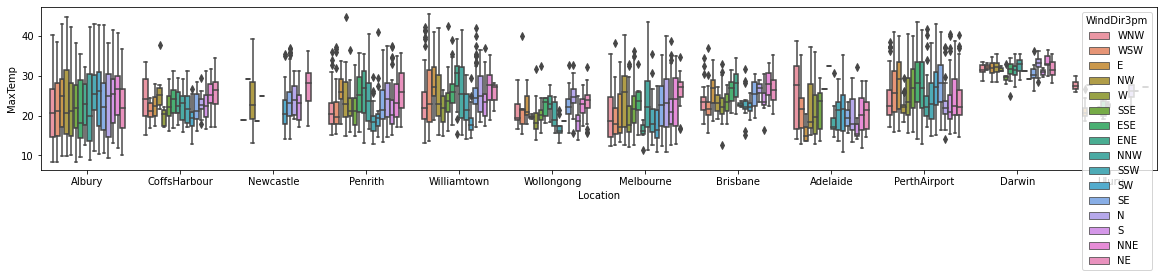

In [178]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='WindDir3pm',y='MaxTemp')

### TEMP AT 3PM RANGES BETWEEN 10-42 MOSTLY ACCROSS ALL LOCATIONS 

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

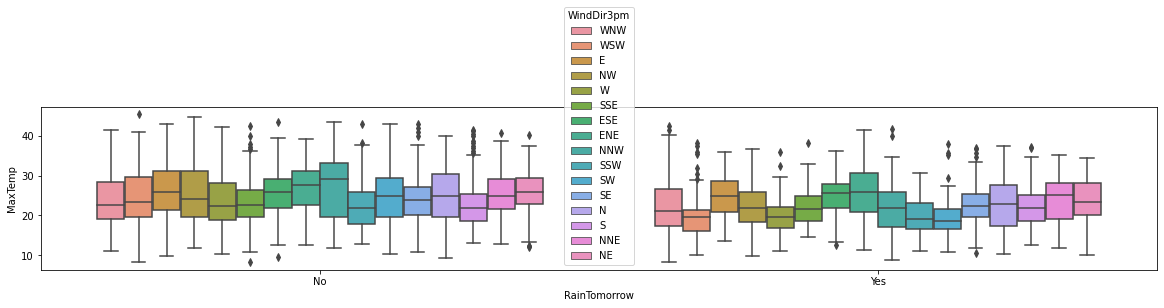

In [179]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='RainTomorrow',hue='WindDir3pm',y='MaxTemp')

### MAX TEMP IS ABOVE 40 FOR NO RAIN TOMORROW ACORSS WIND DIRECTION IN NNW AT 3PM 

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

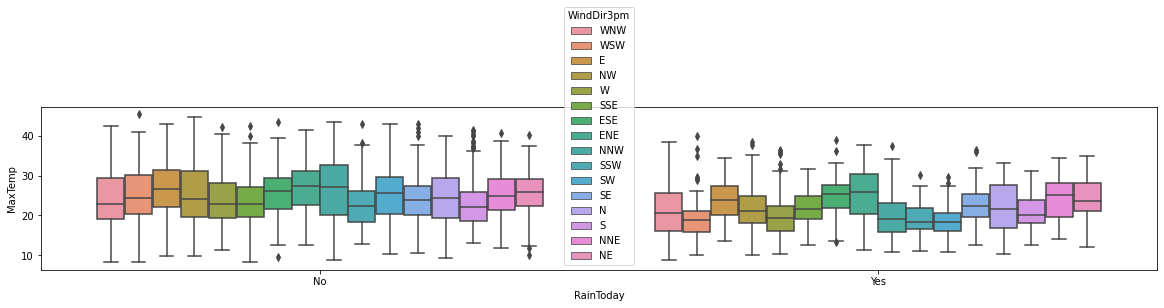

In [180]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='RainToday',hue='WindDir3pm',y='MaxTemp')

### MAX TEMP IS ABOVE 40 FOR NO RAIN TODAY ACORSS WIND DIRECTION IN NNW AT 3PM 

<AxesSubplot:xlabel='WindGustDir', ylabel='MaxTemp'>

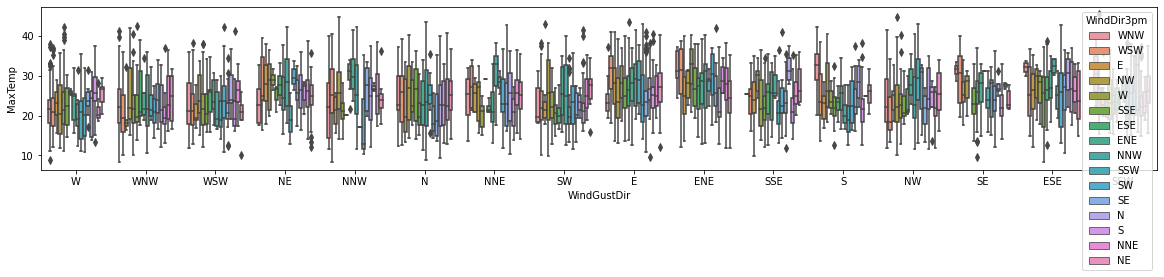

In [181]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindGustDir',hue='WindDir3pm',y='MaxTemp')

### MAX TEMP IS ABOVE 40 FOR ALL DIRECTIONS ACCROSS ALL WIND DIRECTIONS AT 3PM 

<AxesSubplot:xlabel='WindDir9am', ylabel='MaxTemp'>

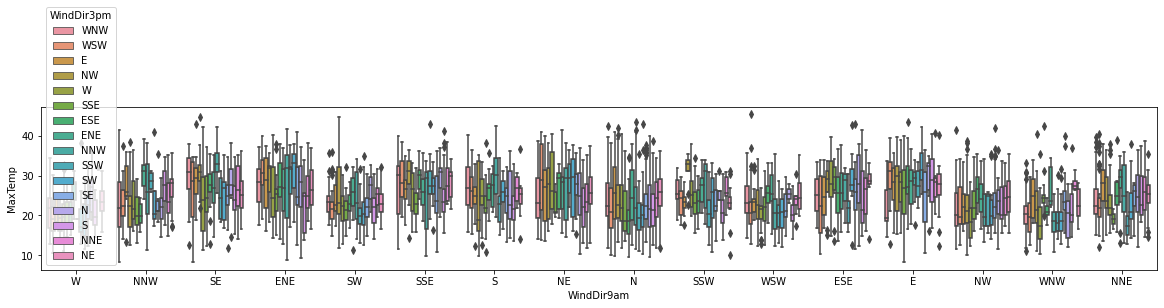

In [182]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='WindDir3pm',y='MaxTemp')

### MAX TEMP IS ABOVE 40 FOR ALL DIRECTIONS ACCROSS ALL WIND DIRECTIONS AT 9AM  

<AxesSubplot:xlabel='WindDir9am', ylabel='Cloud3pm'>

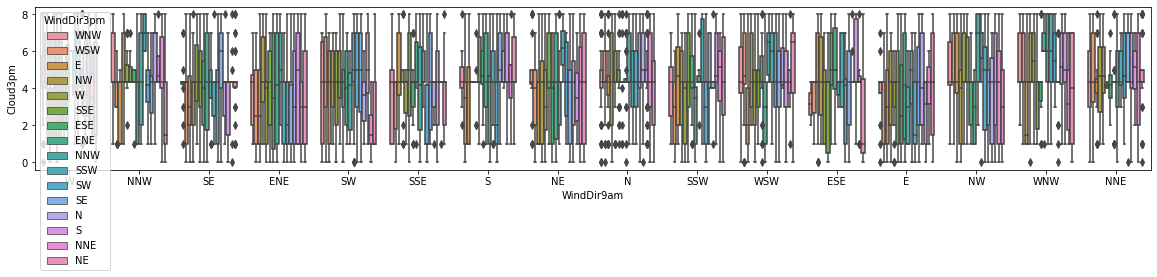

In [183]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='WindDir3pm',y='Cloud3pm')

### CLOUD AT 3PM IS HIGHEST AT 8 FOR ALL DIRECTIONS ACCROSS ALL WIND DIRECTIONS AT 3PM 

<AxesSubplot:xlabel='WindDir9am', ylabel='Cloud9am'>

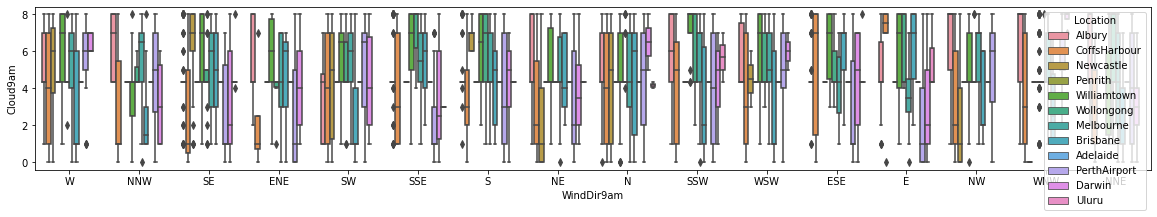

In [184]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='Cloud9am')

### CLOUD AT 3PM IS HIGHEST AT 8 FOR ALL LOCATIONS ACCROSS ALL WIND DIRECTIONS AT 9AM 

<AxesSubplot:xlabel='WindDir9am', ylabel='Pressure3pm'>

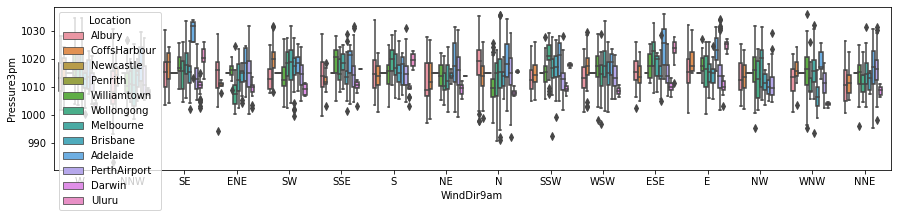

In [185]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='Pressure3pm')

### PRESSURE AT 3PM RANGES BETWEEN 1000-1030 ACROSS ALL DIRECTIONS AND MOSTLY IN THE NORTH WIND DIRECTION AT 9AM

<AxesSubplot:xlabel='WindDir9am', ylabel='Pressure9am'>

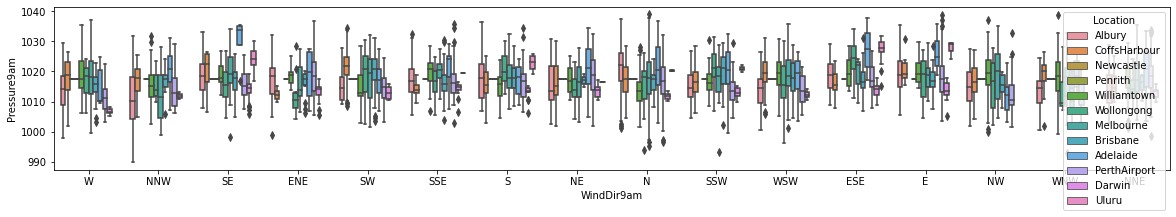

In [186]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='Pressure9am')

### PRESSURE AT 9AM RANGES BETWEEN 1000-1030 ACROSS ALL DIRECTIONS AND MOSTLY IN THE NORTH WIND DIRECTION AT 9AM

<AxesSubplot:xlabel='WindDir9am', ylabel='Humidity3pm'>

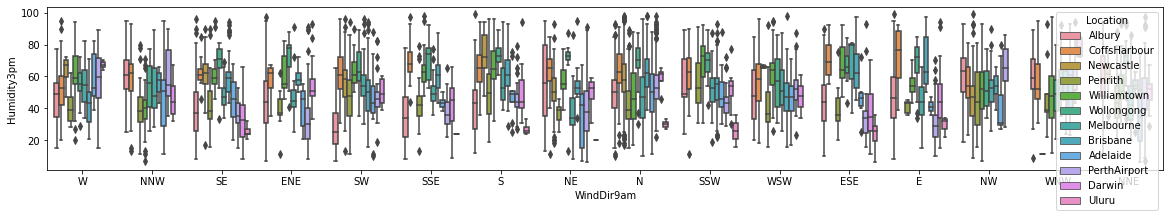

In [187]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='Humidity3pm')

### HUMIDITY AT 3PM IS HIGHEST AT 100 ACROSS ALL DIRECTIONS AND MOSTLY FOR NORTH WIND DIRECTION AT 3PM 

<AxesSubplot:xlabel='WindDir9am', ylabel='Humidity9am'>

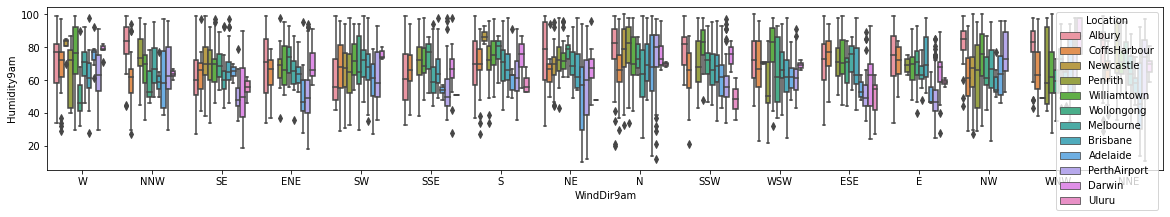

In [188]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='Humidity9am')

### HUMIDITY AT 9 AM IS HIGHEST AT 100 ACROSS ALL DIRECTIONS AND MOSTLY FOR NORTH AND NORTH EAST WIND DIRECTION AT 3PM 

<AxesSubplot:xlabel='WindDir9am', ylabel='WindSpeed3pm'>

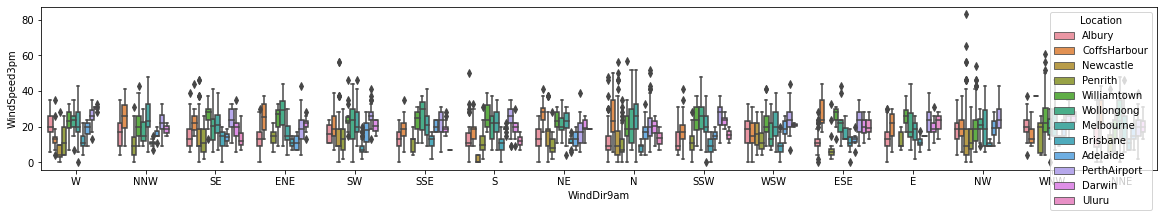

In [189]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='WindSpeed3pm')

### WIND SPEED AT 3PM RANGES BETWEEN 0-40 MOSTLY ACCROSS ALL LOCATIONS 

<AxesSubplot:xlabel='WindDir9am', ylabel='WindGustSpeed'>

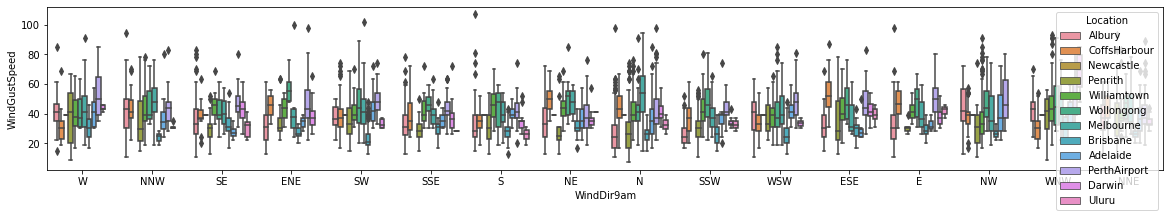

In [190]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='WindGustSpeed')

### WIND GUST SPEED RANGES BETWEEN 0-80 MOSTLY ACCROSS ALL LOCATIONS 

<AxesSubplot:xlabel='WindDir9am', ylabel='MaxTemp'>

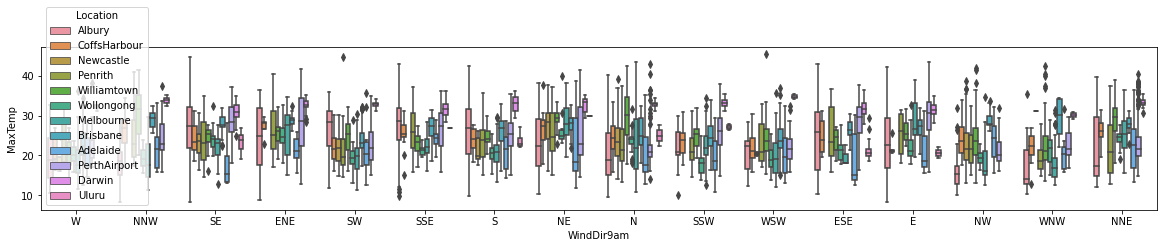

In [191]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='WindDir9am',hue='Location',y='MaxTemp')

### MAX TEMP IS RECORDED IN THE SSE AND ESE WIND DIRECTION AT 9AM IN ALBURY REGION 

<AxesSubplot:xlabel='Location', ylabel='MaxTemp'>

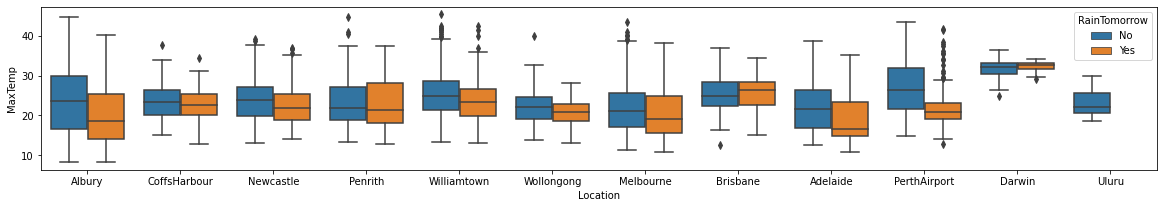

In [192]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='MaxTemp')

### MAX TEMP IS RECORDED IN ALBURY WHERE CHANCES OF NO RAIN TOMORROW IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Temp3pm'>

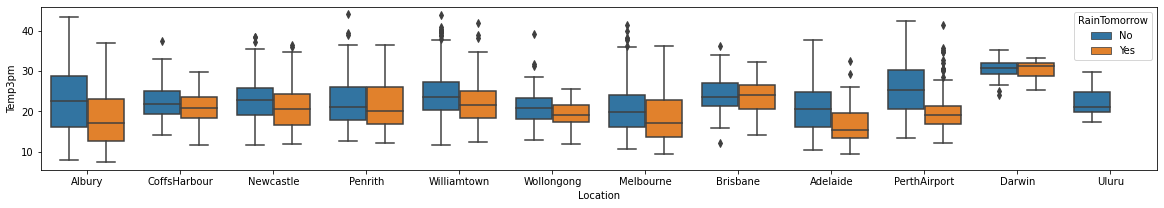

In [193]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Temp3pm')

### TEMP AT 3PM IS HIGHEST ABOVE 40 IS RECORDED IN ALBURY WHERE CHANCES OF NO RAIN TOMORROW IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Temp9am'>

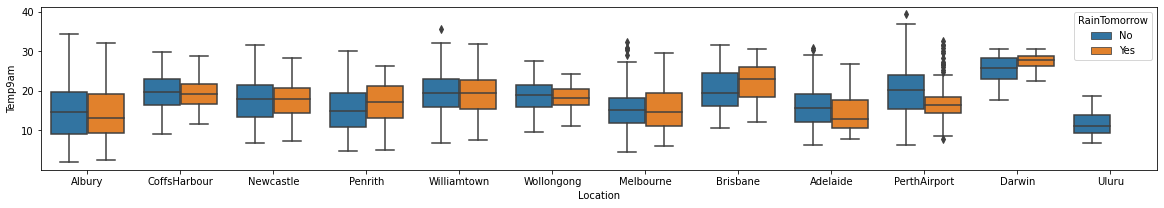

In [194]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Temp9am')

### TEMP AT 9 AM IS HIGHEST ABOVE 40 IS RECORDED IN PERTH AIRPORT WHERE CHANCES OF NO RAIN TOMORROW IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Cloud3pm'>

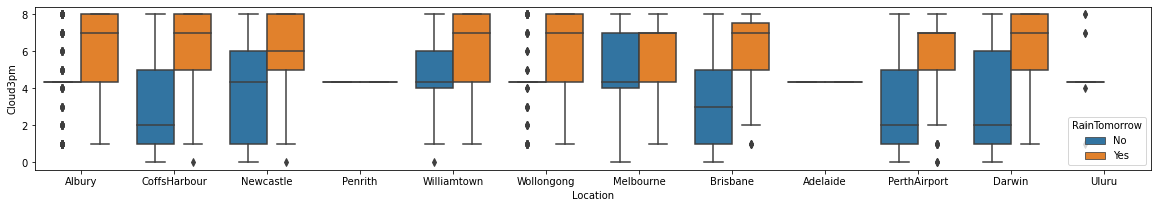

In [195]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Cloud3pm')

### CLOUD AT 3 PM MAX IS RECORDED AT 8 ACCROSS ALL LOCATIONS WHERE CHANCES OF NO RAIN TOMORROW IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Cloud9am'>

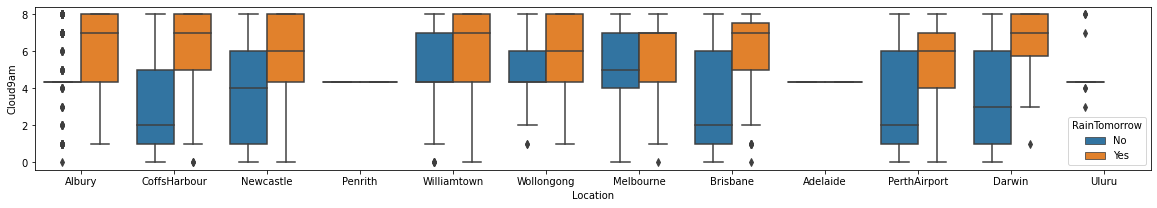

In [196]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Cloud9am')

### CLOUD AT 9 AM  MAX IS RECORDED AT 8 ACCROSS ALL LOCATIONS WHERE CHANCES OF NO RAIN TOMORROW IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Pressure3pm'>

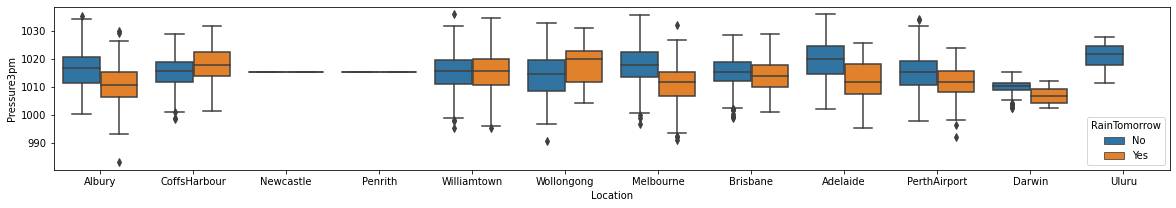

In [197]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Pressure3pm')

### PRESSURE AT 3PM IS MAX RECORDED ABOVE 1030 IN MELBOURNE WHERE CHANCES OF RAIN AND NO RAIN TOMORRROW ARE ROUGHLY EQUAL 

<AxesSubplot:xlabel='Location', ylabel='Pressure9am'>

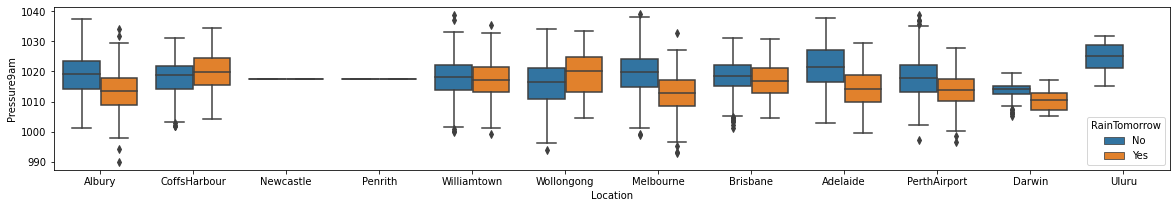

In [198]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Pressure9am')

### PRESSURE AT 9 AM IS MAX RECORDED ABOVE 1030 IN MELBOURNE WHERE CHANCES OF RAIN AND NO RAIN TOMORRROW ARE ROUGHLY EQUAL 

<AxesSubplot:xlabel='Location', ylabel='Humidity3pm'>

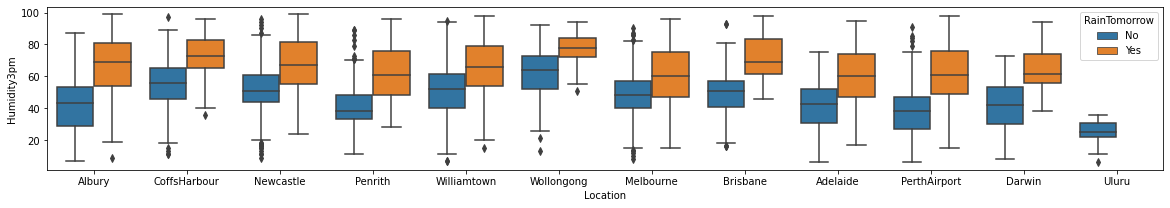

In [199]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Humidity3pm')

### HUMIDITY AT 3PM IS MAX AT 100 FOR ALL LOCATIONS WHERE THERE ARE HIGHER CHANCES OF RAIN TOMORROW 

<AxesSubplot:xlabel='Location', ylabel='WindSpeed3pm'>

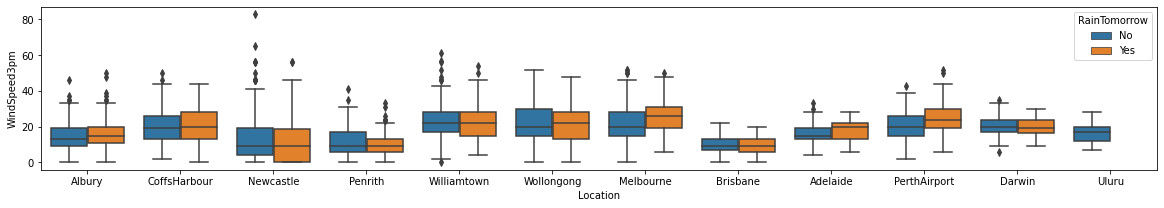

In [200]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='WindSpeed3pm')

### WIND SPEED AT 3PM IS MAX FOR WOLLONGONG LOCATION WHERE THERE ARE ROUGHLY EQUAL CHANCES OF RAIN AND NO RAIN TOMORROW 

<AxesSubplot:xlabel='Location', ylabel='Evaporation'>

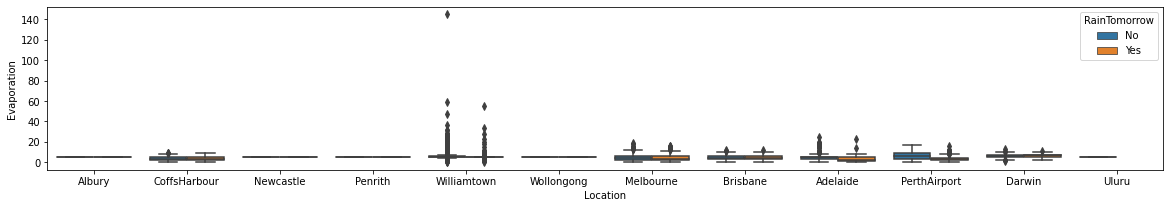

In [201]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Evaporation')

### EVAPORATION IS VERY LOW ACROSS ALL LOCATIONS WHERE ARE NIL CHANCES OF RAIN TOMORROW 

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

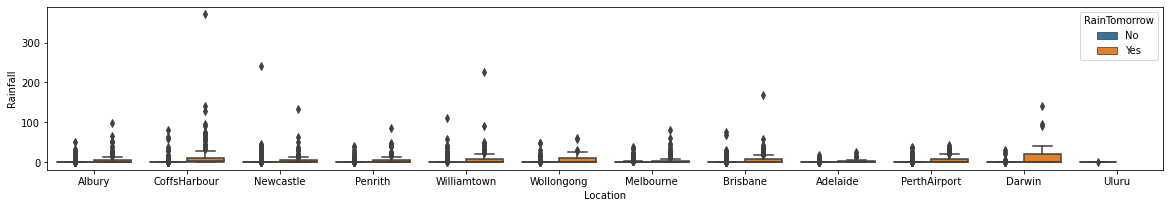

In [202]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainTomorrow',y='Rainfall')

### RAINFALL IS MODERATELY LOW ACROSS ALL LOCATIONS WHERE ARE MINIMAL CHANCES OF RAIN AND NO RAIN TOMORROW 

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

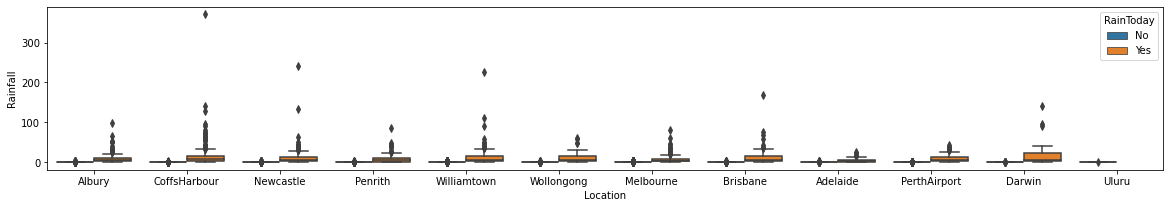

In [203]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Rainfall')

### RAINFALL IS MODERATELY LOW ACROSS ALL LOCATIONS WHERE ARE MINIMAL CHANCES OF RAIN AND NO RAIN TODAY 

<AxesSubplot:xlabel='Location', ylabel='Evaporation'>

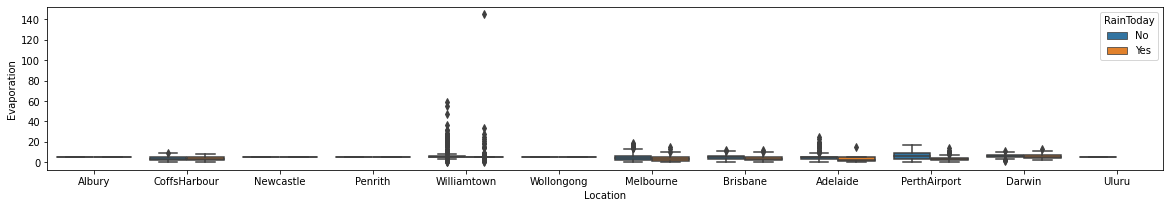

In [204]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Evaporation')

### FOR ALL LOCATIONS EVAPORATION RANGES BETWEEN 0-60 AND VERY MINIMAL CHANCES OF POSITIVE RAIN TODAY ACROSS ALL LOCATIONS TODAY

<AxesSubplot:xlabel='Location', ylabel='Cloud9am'>

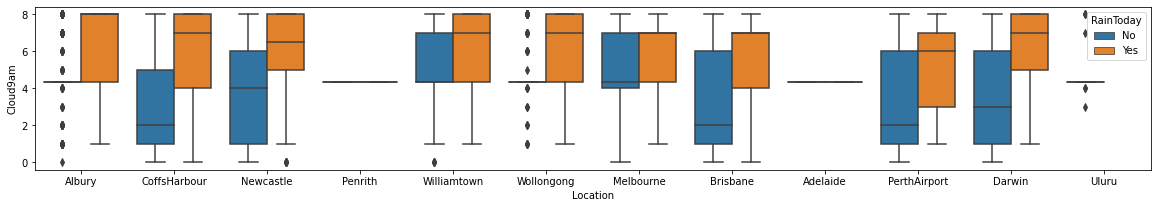

In [205]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Cloud9am')

### FOR ALL LOCATIONS CLOUS AT 9AM IS MAX AT 8 AND IN ALBURY & MELBOURNE WE HAVE ONLY POSITIE CHANCE FOR RAIN TODAY

<AxesSubplot:xlabel='Location', ylabel='Cloud3pm'>

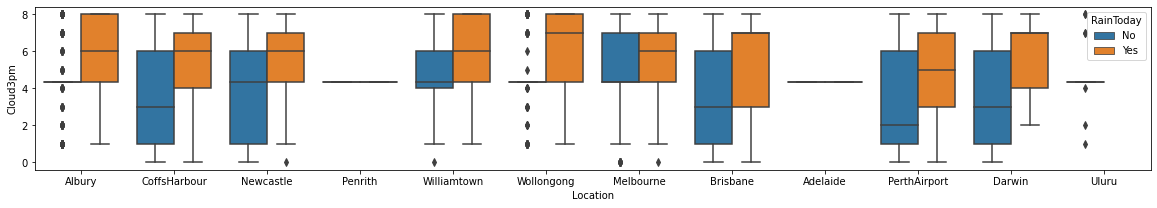

In [206]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Cloud3pm')

### FOR ALL LOCATIONS CLOUS AT 3 PM IS MAX AT 8 AND IN ALBURY & MELBOURNE WE HAVE ONLY POSITIE CHANCE FOR RAIN TODAY

<AxesSubplot:xlabel='Location', ylabel='Pressure3pm'>

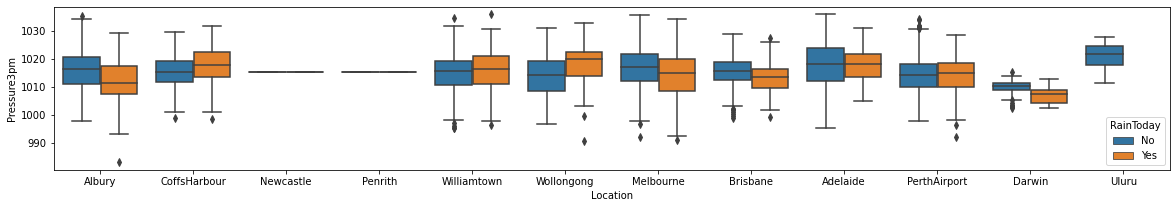

In [207]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Pressure3pm')

### MELBORNE , ALBURY & ADELAIDE RECORDS THE HIGHEST PRESSURE AT 3 PM WHERE CHANCE OF NO RAIN TODAY IS HIGHER

<AxesSubplot:xlabel='Location', ylabel='Pressure9am'>

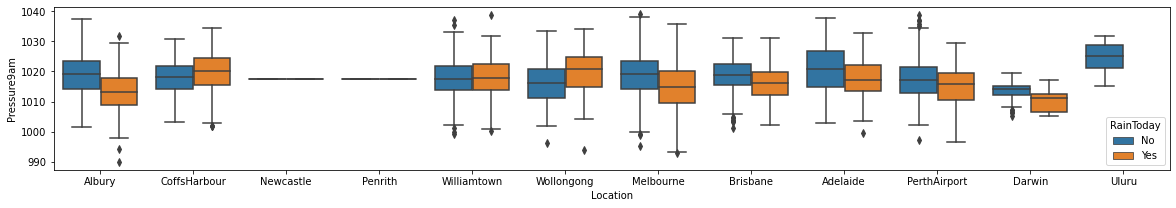

In [208]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2,x='Location',hue='RainToday',y='Pressure9am')

### MELBORNE RECORDS THE HIGHEST PRESSURE AT 9 AM WHERE CHANCE OF NO RAIN TODAY IS HIGHER

## ENCODING THE DATA SET 

In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
le=LabelEncoder()

In [211]:
df2['RainTomorrow']=le.fit_transform(df2['RainTomorrow'])

In [212]:
df2['RainToday']=le.fit_transform(df2['RainToday'])

In [213]:
df2['WindDir3pm']=le.fit_transform(df2['WindDir3pm'])

In [214]:
df2['WindDir9am']=le.fit_transform(df2['WindDir9am'])

In [215]:
df2['Location']=le.fit_transform(df2['Location'])

In [216]:
df2['WindGustDir']=le.fit_transform(df2['WindGustDir'])

## DELETING DATE COLUMN FROM THE DATA SET 

In [217]:
df3=df2.drop(['Date'],axis=1)

## CORRELATION 

In [218]:
df3.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Location       1.000000  0.090425  0.070878 -0.003504     0.137894   
MinTemp        0.090425  1.000000  0.728065  0.092371     0.269812   
MaxTemp        0.070878  0.728065  1.000000 -0.087657     0.347231   
Rainfall      -0.003504  0.092371 -0.087657  1.000000    -0.000755   
Evaporation    0.137894  0.269812  0.347231 -0.000755     1.000000   
WindGustDir   -0.086385 -0.136250 -0.195924  0.027810    -0.091889   
WindGustSpeed  0.260031  0.242738  0.165528  0.089987     0.163857   
WindDir9am    -0.088884 -0.020766 -0.192684  0.091662    -0.082329   
WindDir3pm    -0.001275 -0.139552 -0.160967  0.032052    -0.036871   
WindSpeed9am   0.240594  0.169397  0.056377  0.051829     0.132703   
WindSpeed3pm   0.229770  0.188276  0.115623  0.022696     0.113176   
Humidity9am   -0.033657 -0.154248 -0.424951  0.228654    -0.245437   
Humidity3pm   -0.001483  0.067683 -0.430526  0.243394    -0.190148   
Pressure9am   -0.037657 -0.441253 -0.337845 -0.073004    -0.201959   
Pressure3pm   -0.024508 -0.440363 -0.413150 -0.034081    -0.216711   
Cloud9am      -0.008566  0.095403 -0.245116  0.196189    -0.074490   
Cloud3pm      -0.010776  0.047495 -0.241542  0.162653    -0.121875   
Temp9am        0.098533  0.891425  0.866584 -0.004172     0.317396   
Temp3pm        0.066331  0.696419  0.974695 -0.091987     0.340045   
RainToday     -0.004280  0.075933 -0.225749  0.459163    -0.112552   
RainTomorrow  -0.004506  0.097146 -0.160318  0.224213    -0.076733   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.086385       0.260031   -0.088884   -0.001275   
MinTemp          -0.136250       0.242738   -0.020766   -0.139552   
MaxTemp          -0.195924       0.165528   -0.192684   -0.160967   
Rainfall          0.027810       0.089987    0.091662    0.032052   
Evaporation      -0.091889       0.163857   -0.082329   -0.036871   
WindGustDir       1.000000       0.010034    0.378772    0.455305   
WindGustSpeed     0.010034       1.000000   -0.071934    0.078165   
WindDir9am        0.378772      -0.071934    1.000000    0.216648   
WindDir3pm        0.455305       0.078165    0.216648    1.000000   
WindSpeed9am      0.062552       0.591784    0.057311    0.010744   
WindSpeed3pm      0.131120       0.620606    0.045487    0.084885   
Humidity9am       0.015327      -0.268973    0.015585   -0.005578   
Humidity3pm       0.025385      -0.095502    0.126725   -0.009618   
Pressure9am      -0.101039      -0.394164   -0.027555   -0.139023   
Pressure3pm      -0.024369      -0.363104    0.051694   -0.049330   
Cloud9am          0.115171       0.013532    0.079312    0.070565   
Cloud3pm          0.078248       0.058182    0.058119    0.050584   
Temp9am          -0.153232       0.221725   -0.071087   -0.146456   
Temp3pm          -0.209048       0.129756   -0.201267   -0.174885   
RainToday         0.112410       0.085806    0.157884    0.094507   
RainTomorrow      0.045179       0.184435    0.040399    0.004301   

               WindSpeed9am  ...  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.240594  ...    -0.033657    -0.001483    -0.037657   
MinTemp            0.169397  ...    -0.154248     0.067683    -0.441253   
MaxTemp            0.056377  ...    -0.424951    -0.430526    -0.337845   
Rainfall           0.051829  ...     0.228654     0.243394    -0.073004   
Evaporation        0.132703  ...    -0.245437    -0.190148    -0.201959   
WindGustDir        0.062552  ...     0.015327     0.025385    -0.101039   
WindGustSpeed      0.591784  ...    -0.268973    -0.095502    -0.394164   
WindDir9am         0.057311  ...     0.015585     0.126725    -0.027555   
WindDir3pm         0.010744  ...    -0.005578    -0.009618    -0.139023   
WindSpeed9am       1.000000  ...    -0.373061    -0.121519    -0.177664   
WindSpeed3pm       0.551348  ...    -0.259812    -0.100704    -0.248316   
Humidity9am       -0.373061  ...     1.000000     0.639

<AxesSubplot:>

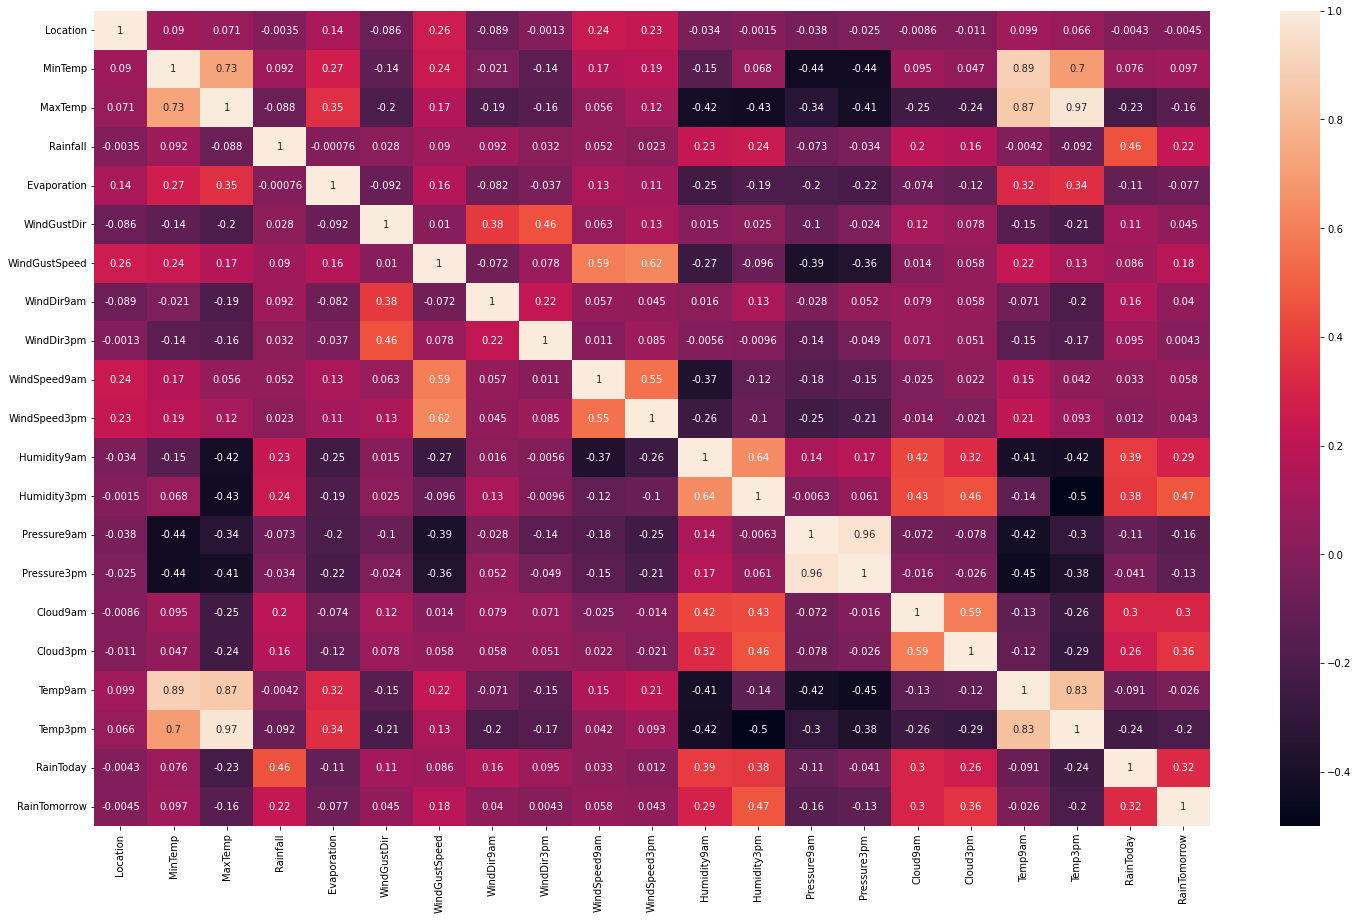

In [219]:
plt.figure(figsize=(25,15))
sns.heatmap(df3.corr(),annot=True)

### SOME COLUMNS HAVE HIGH CORRELATION WITH EACH OTHER AND OTHERS HAVE LOW/MODERATE CORRELATION WITH EACH OTHER

## CORRELATION WRT TARGET 

In [220]:
df3.corr()['RainTomorrow'].sort_values()

Temp3pm         -0.202987
MaxTemp         -0.160318
Pressure9am     -0.159103
Pressure3pm     -0.131759
Evaporation     -0.076733
Temp9am         -0.025788
Location        -0.004506
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043409
WindGustDir      0.045179
WindSpeed9am     0.057939
MinTemp          0.097146
WindGustSpeed    0.184435
Rainfall         0.224213
Humidity9am      0.287774
Cloud9am         0.297967
RainToday        0.323691
Cloud3pm         0.360511
Humidity3pm      0.466835
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

### GOOD- LOW POSITIVE & NEGATIVE CORRELATTION OF FEATURES WRT TARGET 

## OUTLIERS CHECK - VISUAL 

<AxesSubplot:xlabel='RainTomorrow'>

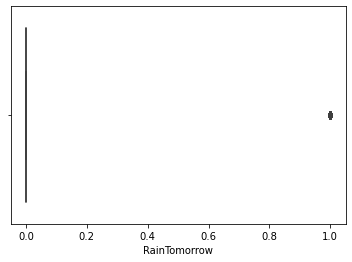

In [221]:
sns.boxplot(df3['RainTomorrow'])

<AxesSubplot:xlabel='Humidity3pm'>

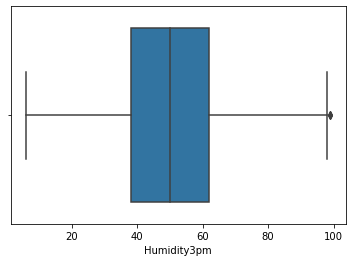

In [222]:
sns.boxplot(df3['Humidity3pm'])

<AxesSubplot:xlabel='Cloud3pm'>

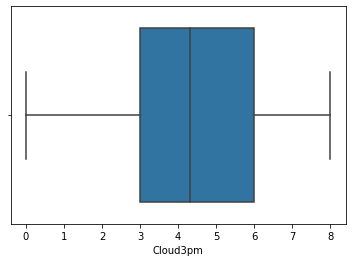

In [223]:
sns.boxplot(df3['Cloud3pm'])

<AxesSubplot:xlabel='RainToday'>

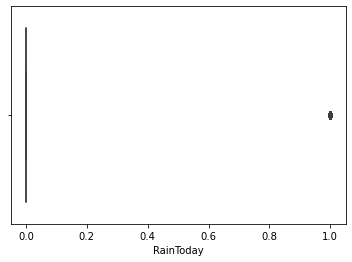

In [224]:
sns.boxplot(df3['RainToday'])

<AxesSubplot:xlabel='Cloud9am'>

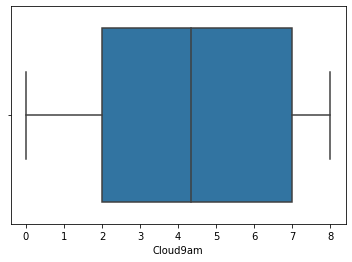

In [225]:
sns.boxplot(df3['Cloud9am'])

<AxesSubplot:xlabel='Humidity9am'>

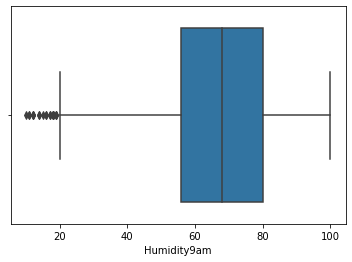

In [226]:
sns.boxplot(df3['Humidity9am'])

<AxesSubplot:xlabel='Rainfall'>

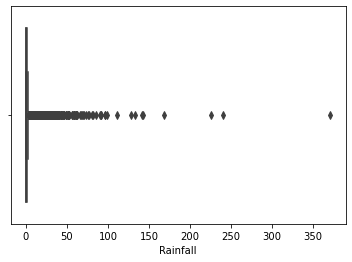

In [227]:
sns.boxplot(df3['Rainfall'])

<AxesSubplot:xlabel='WindGustSpeed'>

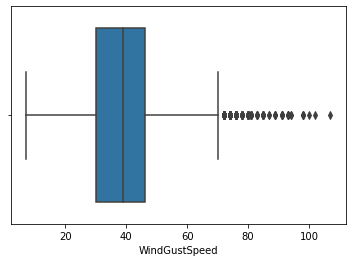

In [228]:
sns.boxplot(df3['WindGustSpeed'])

<AxesSubplot:xlabel='MinTemp'>

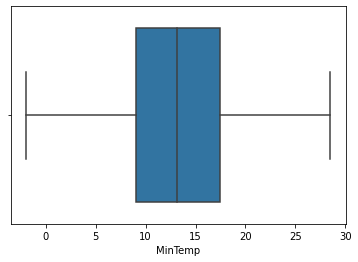

In [229]:
sns.boxplot(df3['MinTemp'])

<AxesSubplot:xlabel='WindSpeed9am'>

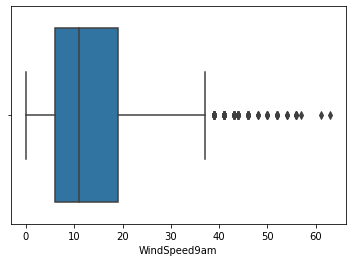

In [230]:
sns.boxplot(df3['WindSpeed9am'])

<AxesSubplot:xlabel='WindGustDir'>

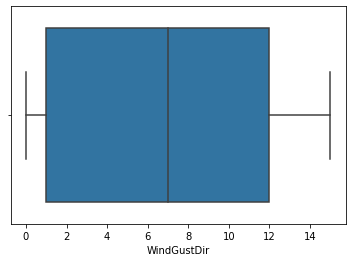

In [231]:
sns.boxplot(df3['WindGustDir'])

<AxesSubplot:xlabel='WindSpeed3pm'>

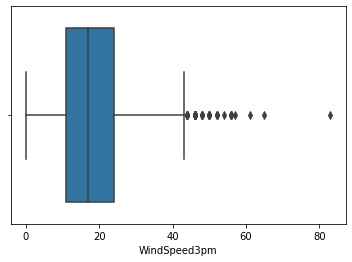

In [232]:
sns.boxplot(df3['WindSpeed3pm'])

<AxesSubplot:xlabel='WindDir9am'>

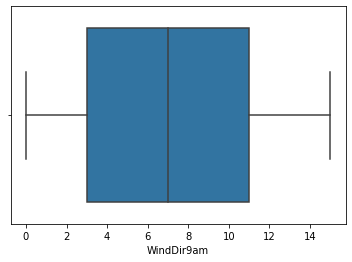

In [233]:
sns.boxplot(df3['WindDir9am'])

<AxesSubplot:xlabel='WindDir3pm'>

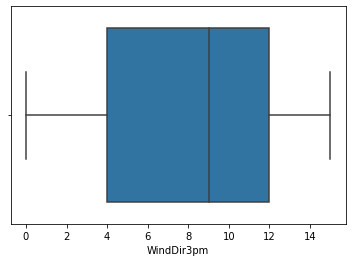

In [234]:
sns.boxplot(df3['WindDir3pm'])

<AxesSubplot:xlabel='Location'>

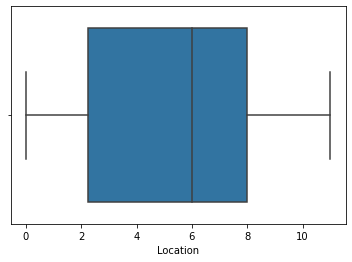

In [235]:
sns.boxplot(df3['Location'])

<AxesSubplot:xlabel='Temp9am'>

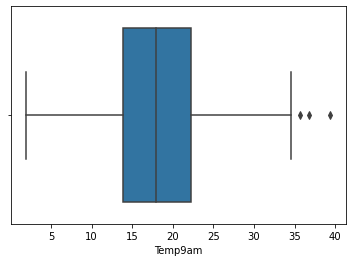

In [236]:
sns.boxplot(df3['Temp9am'])

<AxesSubplot:xlabel='Evaporation'>

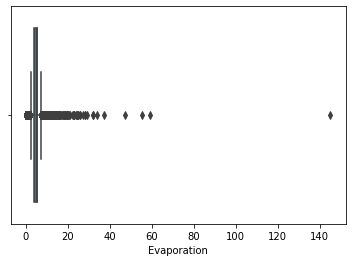

In [237]:
sns.boxplot(df3['Evaporation'])

<AxesSubplot:xlabel='Pressure3pm'>

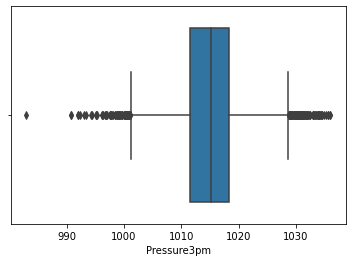

In [238]:
sns.boxplot(df3['Pressure3pm'])

<AxesSubplot:xlabel='Pressure9am'>

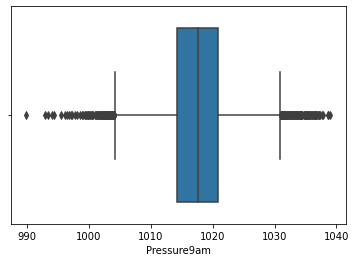

In [239]:
sns.boxplot(df3['Pressure9am'])

<AxesSubplot:xlabel='MaxTemp'>

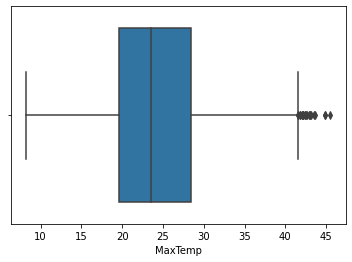

In [240]:
sns.boxplot(df3['MaxTemp'])

<AxesSubplot:xlabel='Temp3pm'>

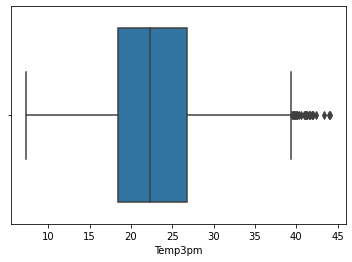

In [241]:
sns.boxplot(df3['Temp3pm'])

### OUTLIERS ARE PRESENT IN THE FOLLOWING COLUMNS :
### TEMP3PM
### MAX TEMP
### PRESSURE 9 AM
### PRESSURE 3 PM
### EVAPORATION
### TEMP 9 AM
### WIND SPEED 3PM
### WIND SPEED 9AM
### RAINFALL
### WINDGUSTSPEED
### HUMIDITY 9AM


## OUTLIERS REMOVAL

In [242]:
from scipy.stats import zscore

In [243]:
z=np.abs(zscore(df3))

In [244]:
z

Location   MinTemp       MaxTemp  Rainfall   Evaporation  WindGustDir  \
0     1.395097  0.052498  1.954990e-01  0.207990  2.656460e-16     1.220923   
1     1.395097  1.030484  1.634110e-01  0.265231  2.656460e-16     1.412005   
2     1.395097  0.037750  2.612956e-01  0.265231  2.656460e-16     1.603087   
3     1.395097  0.705589  6.365197e-01  0.265231  2.656460e-16     0.498814   
4     1.395097  0.792536  1.338026e+00  0.169829  2.656460e-16     1.220923   
...        ...       ...           ...       ...           ...          ...   
8420  1.186193  1.860770  1.139286e-01  0.265231  2.656460e-16     1.263141   
8421  1.186193  1.716373  1.960392e-01  0.265231  2.656460e-16     0.116650   
8422  1.186193  1.391478  4.570647e-01  0.265231  2.656460e-16     0.689895   
8423  1.186193  0.958285  4.733788e-01  0.265231  2.656460e-16     0.456596   
8424  1.186193  0.323244  5.795930e-16  0.265231  2.656460e-16     1.263141   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0      3.754887e-01    1.315650    1.372365      0.737499  ...     0.203327   
1      3.754887e-01    0.222688    1.595253      0.897347  ...     1.368138   
2      5.250161e-01    1.315650    1.595253      0.635321  ...     1.717352   
3      1.119786e+00    0.436600    1.748064      0.182102  ...     1.309935   
4      1.511975e-01    1.321500    0.187849      0.590814  ...     0.843553   
...             ...         ...         ...           ...  ...          ...   
8420   5.964399e-01    0.436600    1.525176      0.022254  ...     0.960721   
8421   1.269314e+00    0.436600    1.079401      0.022254  ...     0.669709   
8422   1.478575e-01    0.436600    1.372365      0.386458  ...     0.844316   
8423   8.207311e-01    0.656363    1.079401      0.022254  ...     0.960721   
8424   5.312283e-16    1.101738    1.302289      0.430965  ...     0.320495   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0        1.539016     1.646846     1.344002  1.480398  0.000000  0.173897   
1        1.376828     1.165715     1.226694  0.000000  0.000000  0.121468   
2        1.106513     1.663437     1.075869  0.000000  0.999089  0.542637   
3        1.863394     0.004365     0.388779  0.000000  0.000000  0.035820   
4        0.944325     1.132534     1.528343  1.076270  1.583662  0.016609   
...           ...          ...          ...       ...       ...       ...   
8420     1.430891     1.156985     0.868092  0.000000  0.000000  1.362295   
8421     1.593079     0.974487     0.666993  0.000000  0.000000  1.222484   
8422     1.430891     0.559719     0.281552  0.000000  0.000000  0.942861   
8423     1.430891     0.294268     0.231277  0.540240  0.999089  0.488473   
8424     0.782136     0.426993     0.465893  1.480398  1.583662  0.505950   

       Temp3pm  RainToday  RainTomorrow  
0     0.152152   0.550355      0.550355  
1     0.266510   0.550355      0.550355  
2     0.082299   0.550355      0.550355  
3     0.634933   0.550355      0.550355  
4     1.170820   0.550355      0.550355  
...        ...        ...           ...  
8420  0.051673   0.550355      0.550355  
8421  0.300003   0.550355      0.550355  
8422  0.567947   0.550355      0.550355  
8423  0.551200   0.550355      0.550355  
8424  0.302870   0.550355      0.550355  

[6762 rows x 21 columns]

In [245]:
print(np.where(z>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
        980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
       1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
       2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
       2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
       2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901,
       2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
       2975, 2989, 3003, 3027, 3045, 3051, 3051, 3

In [246]:
newdf1=df3[(z<3).all(axis=1)]

In [247]:
newdf1

Location  MinTemp    MaxTemp  Rainfall  Evaporation  WindGustDir  \
0            1     13.4  22.900000       0.6     5.302395           13   
1            1      7.4  25.100000       0.0     5.302395           14   
2            1     12.9  25.700000       0.0     5.302395           15   
3            1      9.2  28.000000       0.0     5.302395            4   
4            1     17.5  32.300000       1.0     5.302395           13   
...        ...      ...        ...       ...          ...          ...   
8420         9      2.8  23.400000       0.0     5.302395            0   
8421         9      3.6  25.300000       0.0     5.302395            6   
8422         9      5.4  26.900000       0.0     5.302395            3   
8423         9      7.8  27.000000       0.0     5.302395            9   
8424         9     14.9  24.098345       0.0     5.302395            0   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0         44.000000          13          14          20.0  ...         71.0   
1         44.000000           6          15           4.0  ...         44.0   
2         46.000000          13          15          19.0  ...         38.0   
3         24.000000           9           0          11.0  ...         45.0   
4         41.000000           1           7           7.0  ...         82.0   
...             ...         ...         ...           ...  ...          ...   
8420      31.000000           9           1          13.0  ...         51.0   
8421      22.000000           9           3          13.0  ...         56.0   
8422      37.000000           9          14           9.0  ...         53.0   
8423      28.000000          10           3          13.0  ...         51.0   
8424      38.977663           2           2          17.0  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.320988     16.9   
1            25.0       1010.6       1007.8  4.336806  4.320988     17.2   
2            30.0       1007.6       1008.7  4.336806  2.000000     21.0   
3            16.0       1017.6       1012.8  4.336806  4.320988     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.336806  4.320988     10.1   
8421         21.0       1023.5       1019.1  4.336806  4.320988     10.9   
8422         24.0       1021.0       1016.8  4.336806  4.320988     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[6409 rows x 21 columns]

## DATA LOSS

In [248]:
df3.shape

(6762, 21)

In [249]:
newdf1.shape

(6409, 21)

In [250]:
(6762-6409)/6762

0.05220349009168885

## THIS FALLS WITHIN OUR DESIRED RANGE OF 10%, HENCE WE WILL PROCEED WITH THE NEW DATA SET 

## SKEWNESS CHECK 

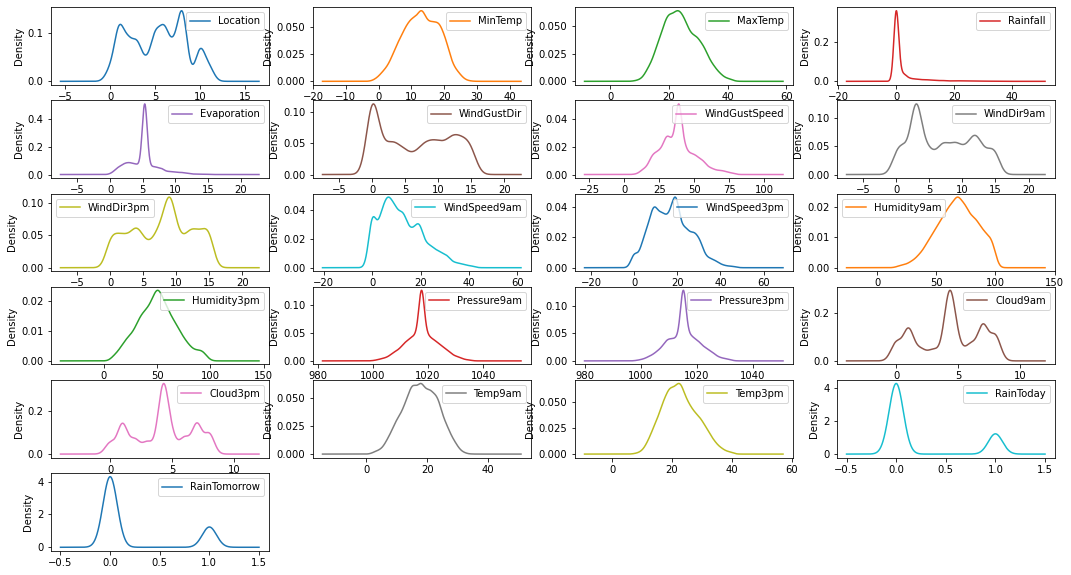

In [251]:
newdf1.plot(kind='density',subplots=True,figsize=(18,10),sharex=False,layout=(6,4))
plt.show()

### SKEWNESS IS PRESENT IN MAYNY COLUMNS WHICH WE WILL TREAT 

In [252]:
newdf1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

In [265]:
newdf1['Rainfall']=np.sqrt(newdf1['Rainfall'])

In [254]:
newdf1['WindSpeed9am']=np.sqrt(newdf1['WindSpeed9am'])

In [255]:
newdf1['Evaporation']=np.sqrt(newdf1['Evaporation'])

In [266]:
newdf1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         0.623424
Evaporation     -0.446483
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.483719
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

### CATAGORICAL DATA LIKE RAIN TODAY AND RAIN TOMORROW HAVE SKEWNESS BEYOND THE DESIRED RANGE OF +- 0.50, WHICH WE WILL NOT TREAT WHERE OTHER INT/FLOAT COLUMNS LIKE EVAPORATION, RAINFALL AND WINDSPEED AT 9AM HAVE BEEN TREATED

## SEPARATING X & Y

In [257]:
x=newdf1.iloc[:,0:20]

In [267]:
y=newdf1.iloc[:,-1]

In [268]:
x

Location  MinTemp    MaxTemp  Rainfall  Evaporation  WindGustDir  \
0            1     13.4  22.900000  0.774597     2.302693           13   
1            1      7.4  25.100000  0.000000     2.302693           14   
2            1     12.9  25.700000  0.000000     2.302693           15   
3            1      9.2  28.000000  0.000000     2.302693            4   
4            1     17.5  32.300000  1.000000     2.302693           13   
...        ...      ...        ...       ...          ...          ...   
8420         9      2.8  23.400000  0.000000     2.302693            0   
8421         9      3.6  25.300000  0.000000     2.302693            6   
8422         9      5.4  26.900000  0.000000     2.302693            3   
8423         9      7.8  27.000000  0.000000     2.302693            9   
8424         9     14.9  24.098345  0.000000     2.302693            0   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000000          13          14      4.472136          24.0   
1         44.000000           6          15      2.000000          22.0   
2         46.000000          13          15      4.358899          26.0   
3         24.000000           9           0      3.316625           9.0   
4         41.000000           1           7      2.645751          20.0   
...             ...         ...         ...           ...           ...   
8420      31.000000           9           1      3.605551          11.0   
8421      22.000000           9           3      3.605551           9.0   
8422      37.000000           9          14      3.000000           9.0   
8423      28.000000          10           3      3.605551           7.0   
8424      38.977663           2           2      4.123106          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1  8.000000  4.320988   
1            44.0         25.0       1010.6       1007.8  4.336806  4.320988   
2            38.0         30.0       1007.6       1008.7  4.336806  2.000000   
3            45.0         16.0       1017.6       1012.8  4.336806  4.320988   
4            82.0         33.0       1010.8       1006.0  7.000000  8.000000   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3  4.336806  4.320988   
8421         56.0         21.0       1023.5       1019.1  4.336806  4.320988   
8422         53.0         24.0       1021.0       1016.8  4.336806  4.320988   
8423         51.0         24.0       1019.4       1016.5  3.000000  2.000000   
8424         62.0         36.0       1020.2       1017.9  8.000000  8.000000   

      Temp9am  Temp3pm  RainToday  
0        16.9     21.8          0  
1        17.2     24.3          0  
2        21.0     23.2          0  
3        18.1     26.5          0  
4        17.8     29.7          0  
...       ...      ...        ...  
8420     10.1     22.4          0  
8421     10.9     24.5          0  
8422     12.5     26.1          0  
8423     15.1     26.0          0  
8424     15.0     20.9          0  

[6409 rows x 20 columns]

In [269]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 6409, dtype: int64

## MULTICOLIEARITY CHECK

In [270]:
from scipy import stats

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [272]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [273]:
cal_vif(x)

Variables     VIF_FACTOR
0        Location       4.533688
1         MinTemp      56.841038
2         MaxTemp     442.516921
3        Rainfall       5.104537
4     Evaporation      26.574507
5     WindGustDir       3.980477
6   WindGustSpeed      21.460732
7      WindDir9am       4.563234
8      WindDir3pm       5.680174
9    WindSpeed9am       9.822477
10   WindSpeed3pm       8.873792
11    Humidity9am      69.189830
12    Humidity3pm      46.316796
13    Pressure9am  615185.080029
14    Pressure3pm  614827.413055
15       Cloud9am       7.548014
16       Cloud3pm       7.634576
17        Temp9am     186.110457
18        Temp3pm     511.535486
19      RainToday       4.825125

### Pressure9am HAS VIF SCORE WAY BEYOND 10, HENCE WE WILL DELETE THIS COLUMN

In [274]:
x1=x.drop(['Pressure9am'],axis=1)

In [275]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    return(vif)

In [276]:
cal_vif(x1)

Variables  VIF_FACTOR
0        Location    4.522574
1         MinTemp   55.857927
2         MaxTemp  442.435295
3        Rainfall    5.087630
4     Evaporation   26.470643
5     WindGustDir    3.958016
6   WindGustSpeed   21.433869
7      WindDir9am    4.489099
8      WindDir3pm    5.445038
9    WindSpeed9am    9.794802
10   WindSpeed3pm    8.825765
11    Humidity9am   69.040916
12    Humidity3pm   45.849874
13    Pressure3pm  169.639506
14       Cloud9am    7.547441
15       Cloud3pm    7.625144
16        Temp9am  185.204462
17        Temp3pm  501.177404
18      RainToday    4.824971

### Temp3pm HAS VIF SCORE WAY BEYOND 10, HENCE WE WILL DELETE THIS COLUMN

In [277]:
x2=x1.drop(['Temp3pm'],axis=1)

In [278]:
def cal_vif(x2):
    vif=pd.DataFrame()
    vif['Variables']=x2.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x2.values,i)for i in range(x2.shape[1])]
    return(vif)

In [279]:
cal_vif(x2)

Variables  VIF_FACTOR
0        Location    4.521357
1         MinTemp   55.550317
2         MaxTemp  154.536969
3        Rainfall    5.087506
4     Evaporation   26.465665
5     WindGustDir    3.940755
6   WindGustSpeed   21.297593
7      WindDir9am    4.476856
8      WindDir3pm    5.430351
9    WindSpeed9am    9.791714
10   WindSpeed3pm    8.793998
11    Humidity9am   61.745846
12    Humidity3pm   31.828504
13    Pressure3pm  159.149649
14       Cloud9am    7.543331
15       Cloud3pm    7.566642
16        Temp9am  173.870101
17      RainToday    4.821537

### Temp9am HAS VIF SCORE WAY BEYOND 10, HENCE WE WILL DELETE THIS COLUMN

In [280]:
x3=x2.drop(['Temp9am'],axis=1)

In [281]:
def cal_vif(x3):
    vif=pd.DataFrame()
    vif['Variables']=x3.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x3.values,i)for i in range(x3.shape[1])]
    return(vif)

In [282]:
cal_vif(x3)

Variables  VIF_FACTOR
0        Location    4.495580
1         MinTemp   29.829010
2         MaxTemp   89.080594
3        Rainfall    5.086760
4     Evaporation   26.397731
5     WindGustDir    3.938256
6   WindGustSpeed   20.932107
7      WindDir9am    4.470965
8      WindDir3pm    5.430326
9    WindSpeed9am    9.684104
10   WindSpeed3pm    8.574707
11    Humidity9am   43.034194
12    Humidity3pm   25.073395
13    Pressure3pm  152.055299
14       Cloud9am    7.441579
15       Cloud3pm    7.535205
16      RainToday    4.818419

### Pressure3pm HAS VIF SCORE WAY BEYOND 10, HENCE WE WILL DELETE THIS COLUMN

In [283]:
x4=x3.drop(['Pressure3pm'],axis=1)

In [284]:
def cal_vif(x4):
    vif=pd.DataFrame()
    vif['Variables']=x4.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x4.values,i)for i in range(x4.shape[1])]
    return(vif)

In [285]:
cal_vif(x4)

Variables  VIF_FACTOR
0        Location    4.494689
1         MinTemp   21.828165
2         MaxTemp   50.431238
3        Rainfall    5.051518
4     Evaporation   23.813754
5     WindGustDir    3.929996
6   WindGustSpeed   20.190581
7      WindDir9am    4.219682
8      WindDir3pm    5.352498
9    WindSpeed9am    8.677562
10   WindSpeed3pm    8.570726
11    Humidity9am   32.417177
12    Humidity3pm   22.273546
13       Cloud9am    7.427478
14       Cloud3pm    7.515823
15      RainToday    4.816928

### MaxTemp HAS VIF SCORE GREATER THAN 10, HENCE WE WILL DELETE IT 

In [286]:
x5=x4.drop(['MaxTemp'],axis=1)

In [287]:
def cal_vif(x5):
    vif=pd.DataFrame()
    vif['Variables']=x5.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x5.values,i)for i in range(x5.shape[1])]
    return(vif)

In [288]:
cal_vif(x5)

Variables  VIF_FACTOR
0        Location    4.491516
1         MinTemp    8.786226
2        Rainfall    4.996333
3     Evaporation   18.015659
4     WindGustDir    3.921075
5   WindGustSpeed   19.833552
6      WindDir9am    4.219667
7      WindDir3pm    5.337749
8    WindSpeed9am    8.656191
9    WindSpeed3pm    8.567562
10    Humidity9am   24.067171
11    Humidity3pm   17.989064
12       Cloud9am    6.986191
13       Cloud3pm    7.472220
14      RainToday    4.792418

### Humidity9am HAS VIF SCORE GREATER THAN 10, HENCE WE WILL DELETE IT 

In [289]:
x6=x5.drop(['Humidity9am'],axis=1)

In [290]:
def cal_vif(x6):
    vif=pd.DataFrame()
    vif['Variables']=x6.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x6.values,i)for i in range(x6.shape[1])]
    return(vif)

In [291]:
cal_vif(x6)

Variables  VIF_FACTOR
0        Location    4.412844
1         MinTemp    8.633736
2        Rainfall    4.989894
3     Evaporation   15.458947
4     WindGustDir    3.892285
5   WindGustSpeed   19.635742
6      WindDir9am    4.209974
7      WindDir3pm    5.319462
8    WindSpeed9am    8.322802
9    WindSpeed3pm    8.556633
10    Humidity3pm   10.503630
11       Cloud9am    6.726823
12       Cloud3pm    7.471677
13      RainToday    4.783536

### WindGustSpeed HAS VIF GREATER THAN 10, HENCE WE WILL DELETE IT 

In [292]:
x7=x6.drop(['WindGustSpeed'],axis=1)

In [293]:
def cal_vif(x7):
    vif=pd.DataFrame()
    vif['Variables']=x7.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x7.values,i)for i in range(x7.shape[1])]
    return(vif)

In [294]:
cal_vif(x7)

Variables  VIF_FACTOR
0       Location    4.326707
1        MinTemp    8.587347
2       Rainfall    4.979646
3    Evaporation   13.574891
4    WindGustDir    3.862160
5     WindDir9am    4.165010
6     WindDir3pm    5.175711
7   WindSpeed9am    7.638542
8   WindSpeed3pm    6.697422
9    Humidity3pm   10.485750
10      Cloud9am    6.724168
11      Cloud3pm    7.372493
12     RainToday    4.780947

### Evaporation HAS VIF GREATER THAN 10, HENCE WE WILL DELETE IT 

In [295]:
x8=x7.drop(['Evaporation'],axis=1)

In [296]:
def cal_vif(x8):
    vif=pd.DataFrame()
    vif['Variables']=x8.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x8.values,i)for i in range(x8.shape[1])]
    return(vif)

In [297]:
cal_vif(x8)

Variables  VIF_FACTOR
0       Location    4.119699
1        MinTemp    6.304210
2       Rainfall    4.931595
3    WindGustDir    3.860371
4     WindDir9am    4.149072
5     WindDir3pm    4.775774
6   WindSpeed9am    7.544307
7   WindSpeed3pm    6.656032
8    Humidity3pm   10.051838
9       Cloud9am    6.712381
10      Cloud3pm    7.370402
11     RainToday    4.767543

## ALL VIF SCORES ARE LESS THAN 10, HENCE WE WILL PROCEED WITH THE DATA SET 

## BALANCING THE DATA SET 

In [298]:
y.value_counts()

0    4979
1    1430
Name: RainTomorrow, dtype: int64

## THE DATA SET IS CLEARLY INBALANCED, HENCE WE WILL USE SMOTE TO BALANCE THE SAME 

In [299]:
from imblearn.over_sampling import SMOTE

In [300]:
smt=SMOTE()

In [301]:
X1,Y1=smt.fit_resample(x8,y)

In [302]:
X1.shape

(9958, 12)

In [303]:
Y1.shape

(9958,)

## PRINICPAL COMPONENT ANALYSIS

In [304]:
from sklearn.decomposition import PCA

In [305]:
pca=PCA(0.95)

In [306]:
pca.fit(X1)

PCA(n_components=0.95)

In [307]:
xpca=pca.transform(X1)

In [308]:
xpca

array([[ 33.9670416 ,   6.25239404,  -8.58284074,   5.75846096,
          0.40567381,  -1.12774115],
       [ 31.39948573,   3.18759285, -10.11046866,  -1.62090223,
         -4.27534391,   1.46212685],
       [ 26.57366867,   8.8975339 , -10.21541189,   5.09423654,
         -0.04521723,  -0.62634372],
       ...,
       [-42.31178401, -15.48546559,   3.49721273,  -1.17955113,
         -4.21272601,  -3.37334221],
       [-33.8647534 ,   6.0435308 ,  -9.18682233,  -2.23272622,
          0.12363466,  -1.86481664],
       [-29.65578495,  11.62407055,  -3.54405517,   2.5498761 ,
          1.95010268,  -0.92131911]])

In [309]:
xpca.shape

(9958, 6)

## TO MAINTAIN 95% OF ORIGINAL FEATURES, THE NUMBER OF COLUMNS HAVE BEEN REDUCED TO 6 

## SCALING THE DATA SET  -STANDARD SCALER 

In [314]:
from sklearn.preprocessing import StandardScaler

In [315]:
scale=StandardScaler()

In [316]:
X2=scale.fit_transform(xpca)

## MODEL TESTING & TRAINING 

## DATASET X2 & Y1 

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## LOGISTIC REGRESSION 

In [318]:
lr=LogisticRegression()

In [319]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predr))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,pred))
    print('\n')

At random_state {0} the training accuracy test is 0.7344966105950289
At random_state {0} the testing accuracy test is 0.7369477911646586


At random_state {1} the training accuracy test is 0.7363796133567663
At random_state {1} the testing accuracy test is 0.7193775100401606


At random_state {2} the training accuracy test is 0.7351242781822747
At random_state {2} the testing accuracy test is 0.7284136546184738


At random_state {3} the training accuracy test is 0.7339944765252322
At random_state {3} the testing accuracy test is 0.7409638554216867


At random_state {4} the training accuracy test is 0.7308561385890032
At random_state {4} the testing accuracy test is 0.7389558232931727


At random_state {5} the training accuracy test is 0.7326136078332914
At random_state {5} the testing accuracy test is 0.7404618473895582


At random_state {6} the training accuracy test is 0.737760482048707
At random_state {6} the testing accuracy test is 0.7284136546184738


At random_state {7} the trai

### AT RANDOM STATE 91, WE HAVE THE HIGHEST ACCURACY OF 75.55%

In [320]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=91)

In [321]:
lr.fit(x_train,y_train)

LogisticRegression()

In [322]:
PRELR=lr.predict(x_test)

In [323]:
print(accuracy_score(y_test,PRELR))

0.7555220883534136


In [324]:
print(confusion_matrix(y_test,PRELR))

[[791 238]
 [249 714]]


In [325]:
print(classification_report(y_test,PRELR))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1029
           1       0.75      0.74      0.75       963

    accuracy                           0.76      1992
   macro avg       0.76      0.76      0.76      1992
weighted avg       0.76      0.76      0.76      1992



## AUC ROC CURVE

In [327]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [328]:
y_pred_prob1=lr.predict_proba(x_test)[:,1]

In [329]:
y_pred_prob1

array([0.44012977, 0.77845658, 0.44784518, ..., 0.76080634, 0.10281681,
       0.62477649])

In [330]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob1)

In [331]:
tpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.71817298e-04,
       9.71817298e-04, 1.94363460e-03, 1.94363460e-03, 2.91545190e-03,
       2.91545190e-03, 3.88726919e-03, 3.88726919e-03, 4.85908649e-03,
       4.85908649e-03, 5.83090379e-03, 5.83090379e-03, 6.80272109e-03,
       6.80272109e-03, 7.77453839e-03, 7.77453839e-03, 8.74635569e-03,
       8.74635569e-03, 9.71817298e-03, 9.71817298e-03, 1.06899903e-02,
       1.06899903e-02, 1.16618076e-02, 1.16618076e-02, 1.26336249e-02,
       1.26336249e-02, 1.36054422e-02, 1.36054422e-02, 1.45772595e-02,
       1.45772595e-02, 1.55490768e-02, 1.55490768e-02, 1.65208941e-02,
       1.65208941e-02, 1.84645287e-02, 1.84645287e-02, 1.94363460e-02,
       1.94363460e-02, 2.04081633e-02, 2.04081633e-02, 2.13799806e-02,
       2.13799806e-02, 2.23517979e-02, 2.23517979e-02, 2.33236152e-02,
       2.33236152e-02, 2.42954325e-02, 2.42954325e-02, 2.52672498e-02,
       2.52672498e-02, 2.62390671e-02, 2.62390671e-02, 2.72108844e-02,
      

In [332]:
fpr

array([0.        , 0.00103842, 0.04984424, 0.04984424, 0.05815161,
       0.05815161, 0.07372793, 0.07372793, 0.08203531, 0.08203531,
       0.12668744, 0.12668744, 0.14018692, 0.14018692, 0.14953271,
       0.14953271, 0.1682243 , 0.1682243 , 0.1827622 , 0.1827622 ,
       0.18899273, 0.18899273, 0.192108  , 0.192108  , 0.19418484,
       0.19418484, 0.19626168, 0.19626168, 0.20353063, 0.20353063,
       0.20560748, 0.20560748, 0.21183801, 0.21183801, 0.21287643,
       0.21287643, 0.22533749, 0.22533749, 0.22637591, 0.22637591,
       0.2305296 , 0.2305296 , 0.23260644, 0.23260644, 0.23468328,
       0.23468328, 0.23779855, 0.23779855, 0.24299065, 0.24299065,
       0.24610592, 0.24610592, 0.25025961, 0.25025961, 0.25441329,
       0.25441329, 0.27102804, 0.27102804, 0.2834891 , 0.2834891 ,
       0.2886812 , 0.2886812 , 0.30633437, 0.30633437, 0.30841121,
       0.30841121, 0.31671859, 0.31671859, 0.3271028 , 0.3271028 ,
       0.32814123, 0.32814123, 0.33125649, 0.33125649, 0.33437

In [333]:
thresholds

array([1.97114646, 0.97114646, 0.93659582, 0.93599997, 0.93385071,
       0.93356492, 0.9221079 , 0.92198273, 0.91851046, 0.91822757,
       0.90460273, 0.90460105, 0.90060928, 0.90056552, 0.8962152 ,
       0.89605206, 0.88913972, 0.88877186, 0.88389113, 0.88330053,
       0.8798068 , 0.87962684, 0.87892324, 0.87859506, 0.87821576,
       0.87788425, 0.8777998 , 0.8777904 , 0.87168101, 0.87154355,
       0.87075246, 0.87055136, 0.86902588, 0.86864297, 0.86773108,
       0.86761752, 0.85915498, 0.85761309, 0.85723673, 0.85673633,
       0.85492197, 0.85420782, 0.85329136, 0.85307339, 0.85187262,
       0.85108338, 0.85039796, 0.84911943, 0.84804705, 0.84749386,
       0.84576441, 0.84556857, 0.84336314, 0.84332785, 0.8399852 ,
       0.83980615, 0.8302955 , 0.82959576, 0.82144836, 0.8213642 ,
       0.8192038 , 0.81781556, 0.81141906, 0.81125425, 0.81097361,
       0.81095966, 0.80625021, 0.80307144, 0.80008635, 0.79984586,
       0.79952307, 0.79849039, 0.79793608, 0.79755577, 0.79443

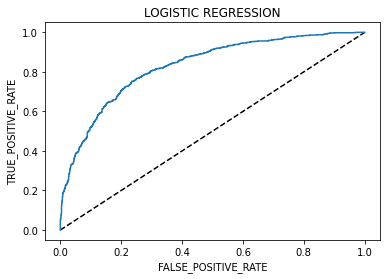

In [334]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='LR')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [335]:
auc_score=roc_auc_score(y_test,(lr.predict(x_test)))
auc_score

0.7550702524000253

## SVC

In [336]:
svc=SVC()

In [337]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_train)
    predsvc1=svc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predsvc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predsvc1))
    print('\n')

At random_state {0} the training accuracy test is 0.7800652774290736
At random_state {0} the testing accuracy test is 0.7816265060240963


At random_state {1} the training accuracy test is 0.7838312829525483
At random_state {1} the testing accuracy test is 0.7439759036144579


At random_state {2} the training accuracy test is 0.7829525483304042
At random_state {2} the testing accuracy test is 0.7680722891566265


At random_state {3} the training accuracy test is 0.7774290735626412
At random_state {3} the testing accuracy test is 0.7670682730923695


At random_state {4} the training accuracy test is 0.7737886015566157
At random_state {4} the testing accuracy test is 0.7796184738955824


At random_state {5} the training accuracy test is 0.7765503389404971
At random_state {5} the testing accuracy test is 0.7655622489959839


At random_state {6} the training accuracy test is 0.7823248807431584
At random_state {6} the testing accuracy test is 0.75


At random_state {7} the training accuracy

### AT RANDOM STATE 91 WE HAVE THE HIGHEST ACCURACY OF 78.81%

In [338]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=91)

In [339]:
svc=SVC(probability=True)

In [340]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [341]:
PRESVC=svc.predict(x_test)

In [342]:
print(accuracy_score(y_test,PRESVC))

0.7881526104417671


In [343]:
print(confusion_matrix(y_test,PRESVC))

[[793 236]
 [186 777]]


In [344]:
print(classification_report(y_test,PRESVC))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1029
           1       0.77      0.81      0.79       963

    accuracy                           0.79      1992
   macro avg       0.79      0.79      0.79      1992
weighted avg       0.79      0.79      0.79      1992



## AUC ROC CURVE 

In [345]:
y_pred_prob2=svc.predict_proba(x_test)[:,1]

In [346]:
y_pred_prob2

array([0.48376832, 0.7304245 , 0.18257436, ..., 0.62964081, 0.09398479,
       0.6764244 ])

In [347]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob2)

In [348]:
tpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.71817298e-04,
       9.71817298e-04, 1.94363460e-03, 1.94363460e-03, 2.91545190e-03,
       2.91545190e-03, 3.88726919e-03, 3.88726919e-03, 4.85908649e-03,
       4.85908649e-03, 5.83090379e-03, 5.83090379e-03, 6.80272109e-03,
       6.80272109e-03, 7.77453839e-03, 7.77453839e-03, 8.74635569e-03,
       8.74635569e-03, 9.71817298e-03, 9.71817298e-03, 1.06899903e-02,
       1.06899903e-02, 1.26336249e-02, 1.26336249e-02, 1.36054422e-02,
       1.36054422e-02, 1.55490768e-02, 1.55490768e-02, 1.65208941e-02,
       1.65208941e-02, 1.74927114e-02, 1.74927114e-02, 1.84645287e-02,
       1.84645287e-02, 1.94363460e-02, 1.94363460e-02, 2.04081633e-02,
       2.04081633e-02, 2.23517979e-02, 2.23517979e-02, 2.33236152e-02,
       2.33236152e-02, 2.42954325e-02, 2.42954325e-02, 2.52672498e-02,
       2.52672498e-02, 2.72108844e-02, 2.72108844e-02, 2.81827017e-02,
       2.81827017e-02, 2.91545190e-02, 2.91545190e-02, 3.01263362e-02,
      

In [349]:
fpr

array([0.        , 0.00103842, 0.00519211, 0.00519211, 0.09345794,
       0.09345794, 0.10384216, 0.10384216, 0.10903427, 0.10903427,
       0.11422638, 0.11422638, 0.13395639, 0.13395639, 0.13811007,
       0.13811007, 0.1536864 , 0.1536864 , 0.15576324, 0.15576324,
       0.19522326, 0.19522326, 0.19937695, 0.19937695, 0.2066459 ,
       0.2066459 , 0.22014538, 0.22014538, 0.25649013, 0.25649013,
       0.25856698, 0.25856698, 0.2596054 , 0.2596054 , 0.26687435,
       0.26687435, 0.26895119, 0.26895119, 0.27102804, 0.27102804,
       0.27518172, 0.27518172, 0.2834891 , 0.2834891 , 0.28452752,
       0.28452752, 0.29595016, 0.29595016, 0.29906542, 0.29906542,
       0.30218069, 0.30218069, 0.30529595, 0.30529595, 0.31152648,
       0.31152648, 0.3125649 , 0.3125649 , 0.31568017, 0.31568017,
       0.3219107 , 0.3219107 , 0.32398754, 0.32398754, 0.33125649,
       0.33125649, 0.33229491, 0.33229491, 0.3364486 , 0.3364486 ,
       0.33852544, 0.33852544, 0.34579439, 0.34579439, 0.36863

In [350]:
thresholds

array([1.96831939, 0.96831939, 0.95303291, 0.95286371, 0.89478133,
       0.89467139, 0.89112069, 0.89106367, 0.89014554, 0.88938514,
       0.88821608, 0.8874401 , 0.88428345, 0.88410292, 0.88290769,
       0.88279591, 0.88050169, 0.880288  , 0.87991471, 0.87939101,
       0.86964497, 0.86925514, 0.86809901, 0.8677527 , 0.86593199,
       0.86579106, 0.86220404, 0.86197475, 0.85533575, 0.85473116,
       0.85390767, 0.8538512 , 0.85369251, 0.85368927, 0.85231093,
       0.85186312, 0.85169509, 0.85143988, 0.85057723, 0.85037415,
       0.84891906, 0.84829446, 0.8465763 , 0.84644008, 0.84606757,
       0.84443201, 0.84098692, 0.84090307, 0.84010189, 0.83977968,
       0.83891428, 0.83886096, 0.83781203, 0.83759165, 0.83537641,
       0.83518746, 0.83510523, 0.83498813, 0.83419957, 0.83402837,
       0.83209606, 0.8313849 , 0.83135119, 0.83117802, 0.82905776,
       0.82903319, 0.82892217, 0.82835928, 0.82712093, 0.82701196,
       0.82682952, 0.82636789, 0.82542021, 0.82538685, 0.81921

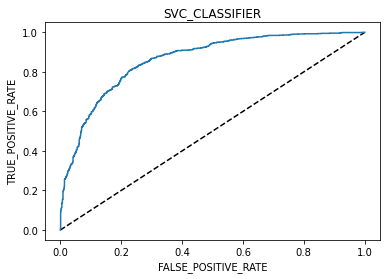

In [351]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('SVC_CLASSIFIER')
plt.show()

## KNN CLASSIFIER 

In [352]:
knn=KNeighborsClassifier()

In [353]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_train)
    predknn1=knn.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predknn))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predknn1))
    print('\n')

At random_state {0} the training accuracy test is 0.8852623650514687
At random_state {0} the testing accuracy test is 0.8237951807228916


At random_state {1} the training accuracy test is 0.8818729600803414
At random_state {1} the testing accuracy test is 0.8142570281124498


At random_state {2} the training accuracy test is 0.884634697464223
At random_state {2} the testing accuracy test is 0.8258032128514057


At random_state {3} the training accuracy test is 0.8819984935977906
At random_state {3} the testing accuracy test is 0.8167670682730924


At random_state {4} the training accuracy test is 0.8843836304293247
At random_state {4} the testing accuracy test is 0.8162650602409639


At random_state {5} the training accuracy test is 0.8821240271152397
At random_state {5} the testing accuracy test is 0.8132530120481928


At random_state {6} the training accuracy test is 0.8863921667085112
At random_state {6} the testing accuracy test is 0.8057228915662651


At random_state {7} the trai

### AT RANDOM STATE AT 75, WE HAVE THE HIGHEST ACCURACY OF 84.33%

In [354]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=75)

In [355]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [356]:
PREKNN=knn.predict(x_test)

In [357]:
print(accuracy_score(y_test,PREKNN))

0.8433734939759037


In [358]:
print(confusion_matrix(y_test,PREKNN))

[[769 214]
 [ 98 911]]


In [359]:
print(classification_report(y_test,PREKNN))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       983
           1       0.81      0.90      0.85      1009

    accuracy                           0.84      1992
   macro avg       0.85      0.84      0.84      1992
weighted avg       0.85      0.84      0.84      1992



## AUC ROC CURVE 

In [360]:
y_pred_prob3=knn.predict_proba(x_test)[:,1]

In [361]:
y_pred_prob3

array([0. , 0. , 0. , ..., 0.6, 0.6, 0.4])

In [362]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob3)

In [363]:
tpr

array([0.        , 0.03051882, 0.10681587, 0.21770092, 0.37131231,
       0.55645982, 1.        ])

In [364]:
fpr

array([0.        , 0.5024777 , 0.74430129, 0.90287413, 0.96828543,
       0.99306244, 1.        ])

In [365]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

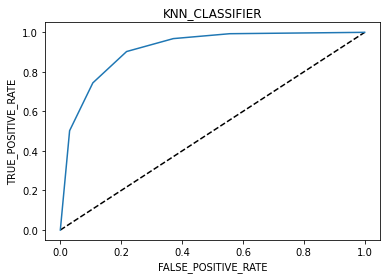

In [366]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='KNN')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('KNN_CLASSIFIER')
plt.show()

In [367]:
auc_score=roc_auc_score(y_test,(knn.predict(x_test)))
auc_score

0.8425866086200795

## DECISION TREE CLASSIFIER

In [369]:
dtc=DecisionTreeClassifier()

In [370]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_train)
    preddtc1=dtc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,preddtc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,preddtc1))
    print('\n')

At random_state {0} the training accuracy test is 0.9986191313080592
At random_state {0} the testing accuracy test is 0.7771084337349398


At random_state {1} the training accuracy test is 0.9986191313080592
At random_state {1} the testing accuracy test is 0.7756024096385542


At random_state {2} the training accuracy test is 0.9984935977906101
At random_state {2} the testing accuracy test is 0.7710843373493976


At random_state {3} the training accuracy test is 0.9983680642731609
At random_state {3} the testing accuracy test is 0.7640562248995983


At random_state {4} the training accuracy test is 0.9983680642731609
At random_state {4} the testing accuracy test is 0.7725903614457831


At random_state {5} the training accuracy test is 0.9988701983429575
At random_state {5} the testing accuracy test is 0.7826305220883534


At random_state {6} the training accuracy test is 0.9986191313080592
At random_state {6} the testing accuracy test is 0.7630522088353414


At random_state {7} the tra

### AT RANDOM STATE 81, WE HAVE THE HIGHEST ACCURACY OF 80.12%

In [376]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=81)

In [377]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [378]:
PREDTC=dtc.predict(x_test)

In [379]:
print(accuracy_score(y_test,PREDTC))

0.7916666666666666


In [380]:
print(confusion_matrix(y_test,PREDTC))

[[777 214]
 [201 800]]


In [381]:
print(classification_report(y_test,PREDTC))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       991
           1       0.79      0.80      0.79      1001

    accuracy                           0.79      1992
   macro avg       0.79      0.79      0.79      1992
weighted avg       0.79      0.79      0.79      1992



### AUC ROC CURVE

In [382]:
y_pred_prob4=dtc.predict_proba(x_test)[:,1]

In [383]:
y_pred_prob4

array([1., 1., 0., ..., 0., 0., 1.])

In [384]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob4)

In [385]:
tpr

array([0.        , 0.21190716, 0.21392533, 0.21594349, 1.        ])

In [386]:
fpr

array([0.       , 0.7982018, 0.7982018, 0.7992008, 1.       ])

In [387]:
thresholds

array([2.        , 1.        , 0.54545455, 0.53333333, 0.        ])

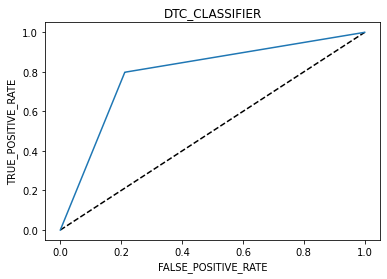

In [388]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='DTC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('DTC_CLASSIFIER')
plt.show()

In [389]:
auc_score=roc_auc_score(y_test,(dtc.predict(x_test)))
auc_score

0.7916286538889971

## RANDOM FOREST CLASSIFIER

In [390]:
rm=RandomForestClassifier()

In [391]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    rm.fit(x_train,y_train)
    predrm=rm.predict(x_train)
    predrm1=rm.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predrm))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predrm1))
    print('\n')

At random_state {0} the training accuracy test is 0.9986191313080592
At random_state {0} the testing accuracy test is 0.8468875502008032


At random_state {1} the training accuracy test is 0.9986191313080592
At random_state {1} the testing accuracy test is 0.8363453815261044


At random_state {2} the training accuracy test is 0.9984935977906101
At random_state {2} the testing accuracy test is 0.8363453815261044


At random_state {3} the training accuracy test is 0.9983680642731609
At random_state {3} the testing accuracy test is 0.8458835341365462


At random_state {4} the training accuracy test is 0.9983680642731609
At random_state {4} the testing accuracy test is 0.856425702811245


At random_state {5} the training accuracy test is 0.9988701983429575
At random_state {5} the testing accuracy test is 0.8418674698795181


At random_state {6} the training accuracy test is 0.9986191313080592
At random_state {6} the testing accuracy test is 0.8328313253012049


At random_state {7} the trai

### AT RANDOM STATE 44, WE HAVE THE HIGHEST ACCURACY OF 86.44% 

In [392]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=44)

In [393]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [394]:
PRERM=rm.predict(x_test)

In [395]:
print(accuracy_score(y_test,PRERM))

0.8604417670682731


In [396]:
print(confusion_matrix(y_test,PRERM))

[[844 150]
 [128 870]]


In [397]:
print(classification_report(y_test,PRERM))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       994
           1       0.85      0.87      0.86       998

    accuracy                           0.86      1992
   macro avg       0.86      0.86      0.86      1992
weighted avg       0.86      0.86      0.86      1992



## AUC ROC CURVE

In [398]:
y_pred_prob5=rm.predict_proba(x_test)[:,1]

In [399]:
y_pred_prob5

array([0.69, 0.71, 0.77, ..., 0.19, 0.75, 0.37])

In [400]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob5)

In [401]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00100604, 0.00100604, 0.00100604,
       0.00301811, 0.00402414, 0.00402414, 0.00402414, 0.00402414,
       0.00402414, 0.00603622, 0.00804829, 0.00905433, 0.01207243,
       0.01207243, 0.01207243, 0.01408451, 0.01609658, 0.01911469,
       0.0221328 , 0.02414487, 0.02816901, 0.02917505, 0.03219316,
       0.03722334, 0.04225352, 0.04426559, 0.04527163, 0.05231388,
       0.05734406, 0.05935614, 0.06438632, 0.06740443, 0.07243461,
       0.07746479, 0.08148893, 0.08551308, 0.09054326, 0.09356137,
       0.09356137, 0.09657948, 0.09758551, 0.10764588, 0.11066398,
       0.11569416, 0.12575453, 0.12877264, 0.13480885, 0.13480885,
       0.138833  , 0.14386318, 0.15090543, 0.15995976, 0.17404427,
       0.17806841, 0.18410463, 0.19818913, 0.20321932, 0.21126761,
       0.21227364, 0.22434608, 0.23038229, 0.24346076, 0.25251509,
       0.2665996 , 0.27464789, 0.28470825, 0.28571429, 0.29577

In [402]:
fpr

array([0.        , 0.03006012, 0.06613226, 0.1002004 , 0.1503006 ,
       0.17735471, 0.20741483, 0.22645291, 0.25651303, 0.28356713,
       0.30861723, 0.33366733, 0.3496994 , 0.3507014 , 0.37074148,
       0.39278557, 0.40781563, 0.4258517 , 0.44388778, 0.46192385,
       0.46392786, 0.4739479 , 0.49498998, 0.51002004, 0.52204409,
       0.54509018, 0.56813627, 0.58617234, 0.59819639, 0.61823647,
       0.63326653, 0.6503006 , 0.66232465, 0.6753507 , 0.68737475,
       0.69639279, 0.70941884, 0.72144289, 0.72945892, 0.75150301,
       0.76452906, 0.77354709, 0.78056112, 0.78857715, 0.78857715,
       0.78957916, 0.79458918, 0.79458918, 0.80260521, 0.80360721,
       0.81663327, 0.82965932, 0.83767535, 0.84569138, 0.84669339,
       0.85871743, 0.86372745, 0.87174349, 0.88076152, 0.88376754,
       0.89078156, 0.89679359, 0.9008016 , 0.91082164, 0.91783567,
       0.91783567, 0.92084168, 0.9238477 , 0.92885772, 0.93486974,
       0.93687375, 0.94088176, 0.9488978 , 0.9488978 , 0.95090

In [403]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.94      , 0.93      , 0.92      ,
       0.91      , 0.9       , 0.89      , 0.88444444, 0.88      ,
       0.87      , 0.86      , 0.85      , 0.84      , 0.83      ,
       0.821     , 0.82      , 0.81      , 0.8       , 0.79      ,
       0.78      , 0.77      , 0.76      , 0.75      , 0.74      ,
       0.73      , 0.72      , 0.71      , 0.7       , 0.69      ,
       0.68      , 0.67      , 0.66      , 0.65      , 0.64      ,
       0.63      , 0.62      , 0.61      , 0.6       , 0.59253561,
       0.59222038, 0.59      , 0.58554545, 0.58      , 0.57411144,
       0.57      , 0.56      , 0.55      , 0.54      , 0.53273132,
       0.53      , 0.52      , 0.51      , 0.5       , 0.49      ,
       0.48      , 0.47      , 0.46      , 0.45      , 0.44      ,
       0.43314286, 0.43      , 0.42      , 0.41      , 0.4       ,
       0.39      , 0.38      , 0.37      , 0.36588235, 0.36   

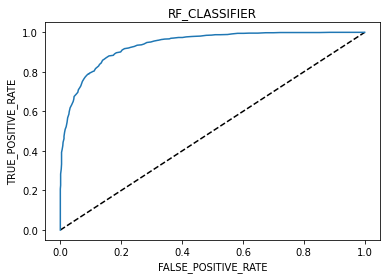

In [404]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='RFC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RF_CLASSIFIER')
plt.show()

In [405]:
auc_score=roc_auc_score(y_test,(rm.predict(x_test)))
auc_score

0.8604190271891872

## GRADIENT BOOSTING CLASSIFIER

In [406]:
xgb=GradientBoostingClassifier()

In [407]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=i)
    xgb.fit(x_train,y_train)
    predxgb=xgb.predict(x_train)
    predxgb1=xgb.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predxgb))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predxgb1))
    print('\n')

At random_state {0} the training accuracy test is 0.7736630680391665
At random_state {0} the testing accuracy test is 0.7580321285140562


At random_state {1} the training accuracy test is 0.7853376851619382
At random_state {1} the testing accuracy test is 0.7339357429718876


At random_state {2} the training accuracy test is 0.7845844840572432
At random_state {2} the testing accuracy test is 0.75


At random_state {3} the training accuracy test is 0.7776801405975395
At random_state {3} the testing accuracy test is 0.7620481927710844


At random_state {4} the training accuracy test is 0.7735375345217173
At random_state {4} the testing accuracy test is 0.7630522088353414


At random_state {5} the training accuracy test is 0.7774290735626412
At random_state {5} the testing accuracy test is 0.7540160642570282


At random_state {6} the training accuracy test is 0.781948280190811
At random_state {6} the testing accuracy test is 0.7439759036144579


At random_state {7} the training accuracy 

### AT RANDOM STATE 56, WE HAVE THE HIGHEST ACCURACY OF 77.91%

In [408]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y1,test_size=0.20,random_state=56)

In [409]:
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [410]:
PREXGB=xgb.predict(x_test)

In [411]:
print(accuracy_score(y_test,PREXGB))

0.7796184738955824


In [412]:
print(confusion_matrix(y_test,PREXGB))

[[785 201]
 [238 768]]


In [413]:
print(classification_report(y_test,PREXGB))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       986
           1       0.79      0.76      0.78      1006

    accuracy                           0.78      1992
   macro avg       0.78      0.78      0.78      1992
weighted avg       0.78      0.78      0.78      1992



## AUC ROC CURVE

In [414]:
y_pred_prob6=xgb.predict_proba(x_test)[:,1]

In [415]:
y_pred_prob6

array([0.47420975, 0.95035491, 0.42321142, ..., 0.56613546, 0.31279758,
       0.24292295])

In [416]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob6)

In [417]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0010142 , 0.0010142 , 0.0010142 , 0.0010142 ,
       0.0010142 , 0.0010142 , 0.0010142 , 0.0010142 , 0.0010142 ,
       0.0010142 , 0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 ,
       0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 ,
       0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 ,
       0.0020284 , 0.0020284 , 0.0030426 , 0.0030426 , 0.0040568 ,
       0.0040568 , 0.0040568 , 0.0040568 , 0.0040568 , 0.0040568 ,
       0.00507099, 0.00507099, 0.00507099, 0.00608519, 0.00608519,
       0.00608519, 0.00608519, 0.00608519, 0.00709939, 0.00709939,
       0.00912779, 0.00912779, 0.00912779, 0.00912779, 0.00912779,
       0.01014199, 0.01014199, 0.01115619, 0.01115619, 0.01115619,
       0.01115619, 0.01115619, 0.01115619, 0.01115619, 0.01115

In [418]:
fpr

array([0.        , 0.00198807, 0.00397614, 0.00695825, 0.01590457,
       0.01789264, 0.027833  , 0.02982107, 0.03280318, 0.03479125,
       0.03777336, 0.03976143, 0.04274354, 0.04473161, 0.04671968,
       0.04771372, 0.04771372, 0.04970179, 0.05168986, 0.05765408,
       0.05964215, 0.06163022, 0.06361829, 0.06560636, 0.06759443,
       0.0695825 , 0.07057654, 0.07455268, 0.07753479, 0.0805169 ,
       0.08250497, 0.1222664 , 0.12425447, 0.13220676, 0.13419483,
       0.13817097, 0.14015905, 0.1471173 , 0.15109344, 0.15506958,
       0.15705765, 0.16202783, 0.16202783, 0.1640159 , 0.1640159 ,
       0.16500994, 0.16699801, 0.16898608, 0.17196819, 0.17892644,
       0.17892644, 0.18091451, 0.18687873, 0.18687873, 0.18986083,
       0.19184891, 0.20079523, 0.2027833 , 0.2027833 , 0.20874751,
       0.20874751, 0.21073559, 0.21172962, 0.21371769, 0.21769384,
       0.21769384, 0.22564612, 0.22763419, 0.23161034, 0.23359841,
       0.23757455, 0.24055666, 0.24552684, 0.24751491, 0.25546

In [419]:
thresholds

array([1.97666776, 0.97666776, 0.97326584, 0.97250203, 0.96850932,
       0.96822845, 0.96494461, 0.96493536, 0.96384497, 0.96359307,
       0.96303711, 0.96286944, 0.9628595 , 0.96279467, 0.96204858,
       0.961999  , 0.96198225, 0.96181994, 0.96173378, 0.96095019,
       0.96090755, 0.96072031, 0.9606492 , 0.96038393, 0.96026005,
       0.95993058, 0.9598067 , 0.95956628, 0.95933591, 0.95914223,
       0.95893265, 0.95129481, 0.95127422, 0.95026355, 0.94937428,
       0.94871601, 0.94871597, 0.94698521, 0.94681969, 0.94619567,
       0.94614206, 0.94546924, 0.94536349, 0.94503582, 0.94467862,
       0.94445508, 0.94443953, 0.94402577, 0.94373339, 0.94003174,
       0.93990298, 0.93913506, 0.93615236, 0.93530938, 0.9343332 ,
       0.93406201, 0.92868732, 0.92730042, 0.92457273, 0.91584817,
       0.91541897, 0.91158064, 0.9108682 , 0.90999107, 0.90338751,
       0.90264892, 0.8983215 , 0.89825097, 0.89675668, 0.89625123,
       0.89119254, 0.89059402, 0.88624649, 0.88622018, 0.88245

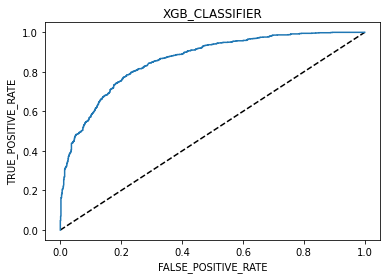

In [420]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='XGB')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('XGB_CLASSIFIER')
plt.show()

In [421]:
auc_score=roc_auc_score(y_test,(xgb.predict(x_test)))
auc_score

0.779782763863069

## CROSS VAL SCORE

### CV=10

In [422]:
for m in [lr,svc,knn,dtc,rm,xgb]:
    cv=cross_val_score(m,X2,Y1,cv=10)
    print('CV','is',(cv.mean()))

CV is 0.7186291901273435
CV is 0.7251594316966358
CV is 0.7735597667050109
CV is 0.763310326734072
CV is 0.8177459587092087
CV is 0.7315842263526469


### CV=8

In [423]:
for m in [lr,svc,knn,dtc,rm,xgb]:
    cv=cross_val_score(m,X2,Y1,cv=8)
    print('CV','is',(cv.mean()))

CV is 0.7144145714691563
CV is 0.7183341081367269
CV is 0.7591045855447514
CV is 0.7478530682214388
CV is 0.8034912963752114
CV is 0.7195382010356539


### CV=12

In [424]:
for m in [lr,svc,knn,dtc,rm,xgb]:
    cv=cross_val_score(m,X2,Y1,cv=12)
    print('CV','is',(cv.mean()))

CV is 0.7189283067129798
CV is 0.7283683588394593
CV is 0.7748615693170753
CV is 0.7539718584833909
CV is 0.8190507506503698
CV is 0.7261608557268883


## WE WILL GO AHEAD WITH CV=12

### THERE IS SLIGHT OVERFITTING IN THE DATA SET

## MODEL ACCURACY

### LR-75.55%
### SVC-78.81%
### KNN-84.33%
### DTC-79.16%
### RM-86.04%
### XGB-77.96%

## DIFFERENCE BETWEEN CV MEAN SCORE & MODEL ACCURACY

In [425]:
(75.55-71.89)

3.6599999999999966

In [426]:
(78.81-72.83)

5.980000000000004

In [427]:
(84.33-77.48)

6.849999999999994

In [428]:
(79.16-75.39)

3.769999999999996

In [429]:
(86.04-81.90)

4.140000000000001

In [430]:
(77.96-72.61)

5.349999999999994

## WE WILL HYPER TUNE BOTH DECISION TREE CLASSIFIER & RANDOM FOREST CLASSIFIER 

## HYPER TUNE- RANDOM FOREST CLASSIFIER

In [431]:
RM2=RandomForestClassifier()

In [432]:
DD={'n_estimators':[50,100,150],'random_state':list(range(11)),'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,3,4,],'min_samples_leaf':[1,2,3]}

In [433]:
gd=GridSearchCV(RM2,DD,cv=5,scoring='accuracy')

In [435]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [437]:
gd.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 4}

In [438]:
RM3=RandomForestClassifier(n_estimators=150,random_state=4,criterion='gini',min_samples_split=2,min_samples_leaf=1)

In [439]:
RM3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=4)

In [440]:
PRERM3=RM3.predict(x_test)

In [441]:
print(accuracy_score(y_test,PRERM3))

0.8483935742971888


In [442]:
print(confusion_matrix(y_test,PRERM3))

[[832 154]
 [148 858]]


In [ ]:
print(classification_report(y_test,PRERM3))

## AUC ROC CURVE

In [443]:
y_pred_prob7=RM3.predict_proba(x_test)[:,1]

In [444]:
y_pred_prob7

array([0.71333333, 0.95333333, 0.78941176, ..., 0.53333333, 0.24      ,
       0.52666667])

In [445]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob7)

In [446]:
tpr

array([0.        , 0.0010142 , 0.0010142 , 0.0010142 , 0.0010142 ,
       0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 , 0.0020284 ,
       0.0030426 , 0.0030426 , 0.0030426 , 0.0030426 , 0.0040568 ,
       0.0040568 , 0.0040568 , 0.0040568 , 0.00507099, 0.00507099,
       0.00608519, 0.00811359, 0.00912779, 0.00912779, 0.01014199,
       0.01014199, 0.01115619, 0.01115619, 0.01115619, 0.01115619,
       0.01217039, 0.01318458, 0.01521298, 0.01521298, 0.01521298,
       0.01724138, 0.01724138, 0.01825558, 0.01926978, 0.02028398,
       0.02028398, 0.02028398, 0.02129817, 0.02434077, 0.02535497,
       0.02738337, 0.02839757, 0.03144016, 0.03245436, 0.03651116,
       0.03955375, 0.04158215, 0.04563895, 0.04868154, 0.05172414,
       0.05882353, 0.06085193, 0.06186613, 0.06389452, 0.06896552,
       0.06997972, 0.07302231, 0.07606491, 0.0801217 , 0.0862069 ,
       0.08823529, 0.08823529, 0.09127789, 0.09736308, 0.09939148,
       0.09939148, 0.10040568, 0.10547667, 0.10851927, 0.10953

In [447]:
fpr

array([0.        , 0.02982107, 0.06063618, 0.10039761, 0.12624254,
       0.1500994 , 0.17196819, 0.19880716, 0.21172962, 0.22664016,
       0.24652087, 0.26143141, 0.26242545, 0.27137177, 0.28926441,
       0.29920477, 0.31411531, 0.32803181, 0.34194831, 0.35685885,
       0.37276342, 0.38469185, 0.40357853, 0.41650099, 0.42445328,
       0.43737575, 0.45029821, 0.46421471, 0.46520875, 0.48210736,
       0.49602386, 0.50695825, 0.51590457, 0.51689861, 0.527833  ,
       0.53976143, 0.54075547, 0.55467197, 0.56361829, 0.56361829,
       0.56461233, 0.57256461, 0.58349901, 0.5944334 , 0.60139165,
       0.61033797, 0.61729622, 0.62624254, 0.63021869, 0.63518887,
       0.64413519, 0.65407555, 0.66003976, 0.67395626, 0.68389662,
       0.6888668 , 0.69582505, 0.69582505, 0.69880716, 0.70576541,
       0.71073559, 0.71868787, 0.7306163 , 0.7415507 , 0.74751491,
       0.75347913, 0.7584493 , 0.76441352, 0.77037773, 0.77137177,
       0.77236581, 0.78429423, 0.78827038, 0.79423459, 0.80318

In [448]:
thresholds

array([2.        , 1.        , 0.99333333, 0.98666667, 0.98      ,
       0.97333333, 0.96666667, 0.96      , 0.95333333, 0.94666667,
       0.94      , 0.93333333, 0.92888889, 0.92666667, 0.92      ,
       0.91333333, 0.90666667, 0.9       , 0.89333333, 0.88666667,
       0.88      , 0.87333333, 0.86666667, 0.86      , 0.85333333,
       0.84666667, 0.84      , 0.83333333, 0.82888889, 0.82666667,
       0.82      , 0.81333333, 0.80666667, 0.8035    , 0.8       ,
       0.79333333, 0.78941176, 0.78666667, 0.78      , 0.77368687,
       0.77343346, 0.77333333, 0.76666667, 0.76      , 0.75333333,
       0.74666667, 0.74      , 0.73333333, 0.72666667, 0.72      ,
       0.71333333, 0.70666667, 0.7       , 0.69333333, 0.68666667,
       0.68      , 0.67333333, 0.67216783, 0.66666667, 0.66      ,
       0.65333333, 0.64666667, 0.64      , 0.63333333, 0.62666667,
       0.62      , 0.61333333, 0.60666667, 0.6       , 0.59333333,
       0.59144015, 0.58666667, 0.58      , 0.57333333, 0.56666

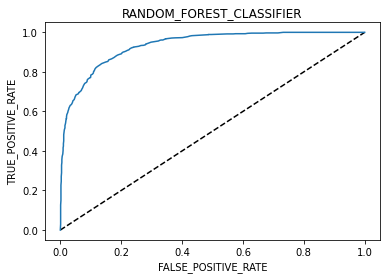

In [449]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RANDOM_FOREST_CLASSIFIER')
plt.show()

In [450]:
auc_score=roc_auc_score(y_test,(RM3.predict(x_test)))
auc_score

0.8483480456006356

## HYPER TUNING - DECISION TREE CLASSIFIER

In [451]:
DTC=DecisionTreeClassifier()

In [452]:
DD1={'splitter':['best','random'],'random_state':list(range(11)),'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,3,4,],'min_samples_leaf':[1,2,3]}

In [454]:
gr=GridSearchCV(DTC,DD1,cv=5,scoring='accuracy')

In [455]:
gr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [456]:
gr.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 5,
 'splitter': 'best'}

In [457]:
DTC2=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=5,min_samples_split=2,min_samples_leaf=1)

In [458]:
DTC2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [459]:
PREDTC2=DTC2.predict(x_test)

In [460]:
print(accuracy_score(y_test,PREDTC2))

0.7806224899598394


In [461]:
print(confusion_matrix(y_test,PREDTC2))

[[764 222]
 [215 791]]


In [462]:
print(classification_report(y_test,PREDTC2))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       986
           1       0.78      0.79      0.78      1006

    accuracy                           0.78      1992
   macro avg       0.78      0.78      0.78      1992
weighted avg       0.78      0.78      0.78      1992



## AUC ROC CURVE

In [463]:
y_pred_prob8=DTC2.predict_proba(x_test)[:,1]

In [464]:
y_pred_prob8

array([0., 1., 0., ..., 0., 0., 0.])

In [465]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob8)

In [466]:
tpr

array([0.        , 0.22515213, 0.22718053, 0.22920892, 1.        ])

In [467]:
fpr

array([0.        , 0.78628231, 0.78827038, 0.79224652, 1.        ])

In [468]:
thresholds

array([2.        , 1.        , 0.44444444, 0.41666667, 0.        ])

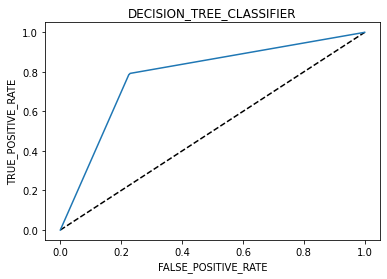

In [469]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('DECISION_TREE_CLASSIFIER')
plt.show()

In [470]:
auc_score=roc_auc_score(y_test,(RM3.predict(x_test)))
auc_score

0.8483480456006356

## RANDOM FOREST CLASSIFIER HAS A HIGHER ACCURACY, HENCE WE WILL SELECT AND SAVE THAT MODEL 

## SAVING THE BEST MODEL 

In [436]:
import pickle

In [472]:
filename='EV8A.pkl'
pickle.dump(RM3,open(filename,'wb'))

In [473]:
loaded_model8A=pickle.load(open('EV8A.pkl','rb'))

In [475]:
conclusion8A=pd.DataFrame([loaded_model8A.predict(x_test)[:],y_test[:]],index=['PREDICTED','ORIGINAL'])

In [476]:
conclusion8A

0     1     2     3     4     5     6     7     8     9     ...  \
PREDICTED     1     1     1     1     1     1     1     1     1     0  ...   
ORIGINAL      1     1     1     1     1     1     1     1     1     0  ...   

           1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  
PREDICTED     1     1     0     0     1     0     1     1     0     1  
ORIGINAL      1     1     0     0     0     0     1     1     0     1  

[2 rows x 1992 columns]